In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
df=pd.read_csv('Housingtrain.csv')

# EDA

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df.shape

(1168, 81)

In [5]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     77     1168        1168      1168  ...  1168.000000      7    237   
unique     2        4           4         1  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      41      740        1046      1168  ...          NaN      3    129   
mean     NaN      NaN         NaN       NaN  ...     3.448630    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    44.896939    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           44   1168.000000  1168.000000  1168.000000      1168   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            40           NaN          NaN          NaN       999   
mean           NaN     47.315068     6.344178  2007.804795       NaN   
std            NaN    543.264432     2.686352     1.329738       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1168    1168.000000  
unique              6            NaN  
top            Normal            NaN  
freq              945            NaN  
mean              NaN  181477.005993  
std               NaN   79105.586863  
min               NaN   34900.000000  
25%               NaN  130375.000000  
50%               NaN  163995.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
pd.set_option('display.max_rows', 500)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df.drop(['MiscFeature','PoolQC','Fence','FireplaceQu','Alley','Id'],inplace=True,axis=1)

In [9]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0].strip(),inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0].strip(),inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0].strip(),inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0].strip(),inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0].strip(),inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0].strip(),inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0].strip(),inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0].strip(),inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0].strip(),inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [10]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

0


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 75 columns]

In [11]:
categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',  'Heating','HeatingQC', 'CentralAir', 'Electrical',  'KitchenQual',
        'Functional',  'GarageType','GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',  'SaleType',
       'SaleCondition']

In [12]:
l = list(df.columns)
continuous_columns=[]
for i in l:
    if(i not in categorical_columns):
        continuous_columns.append(i)

In [13]:
print(continuous_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


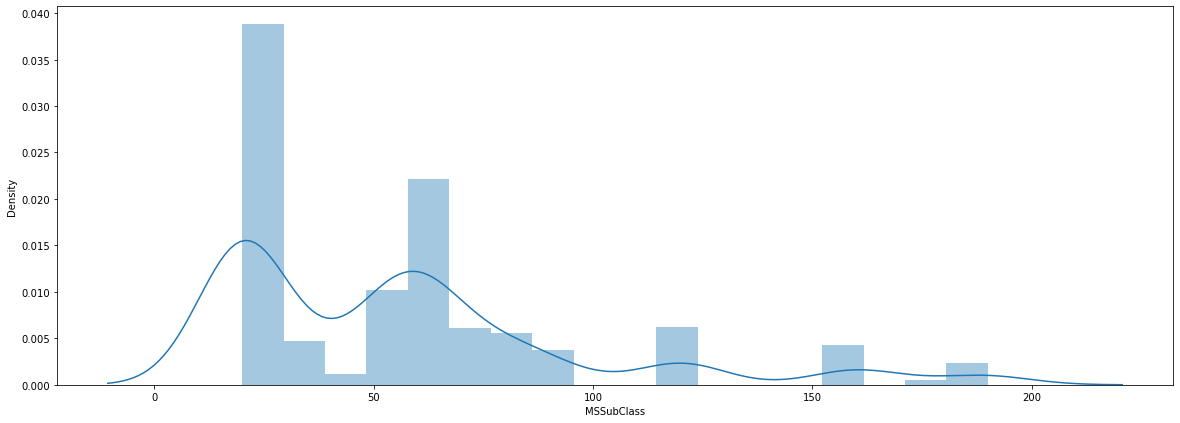

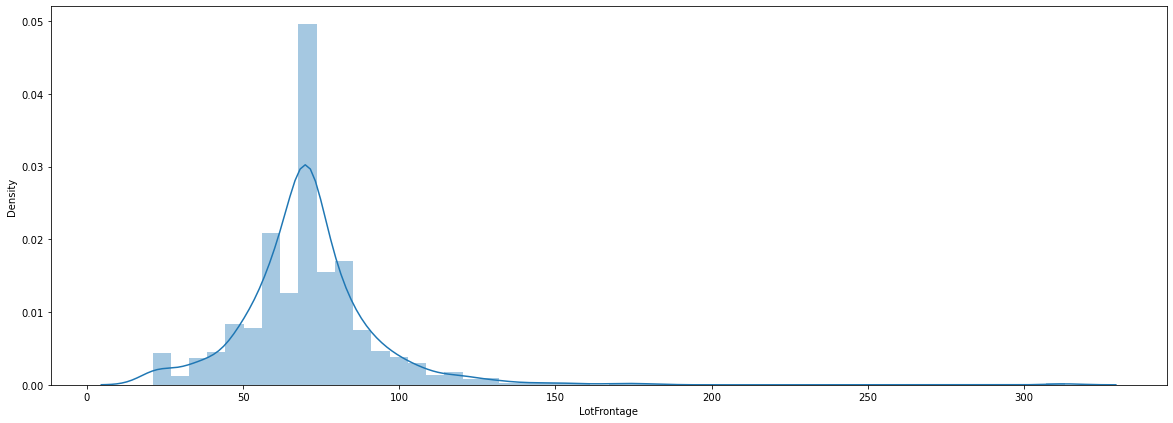

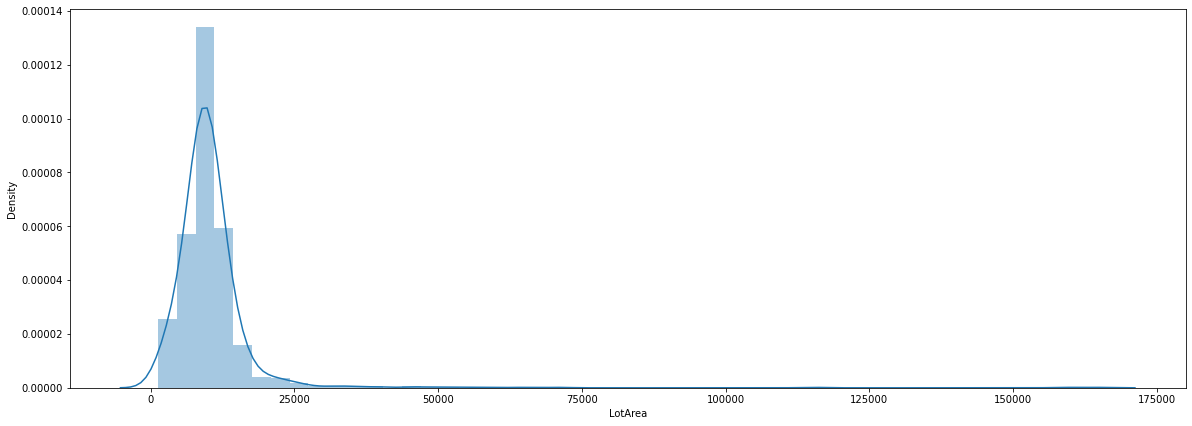

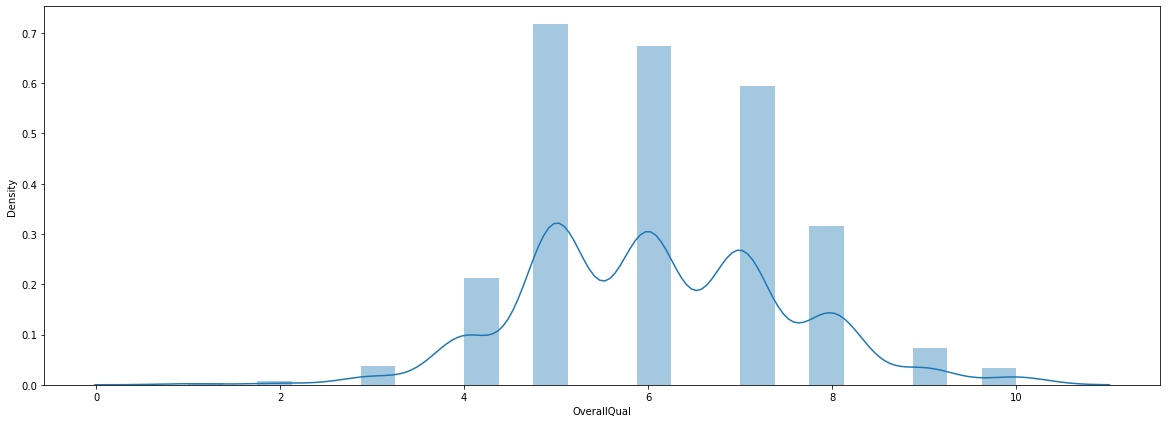

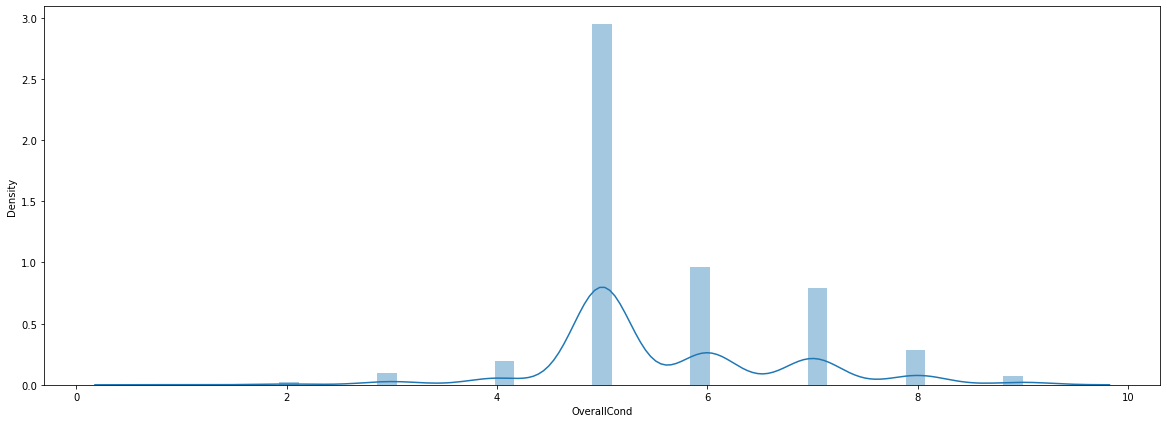

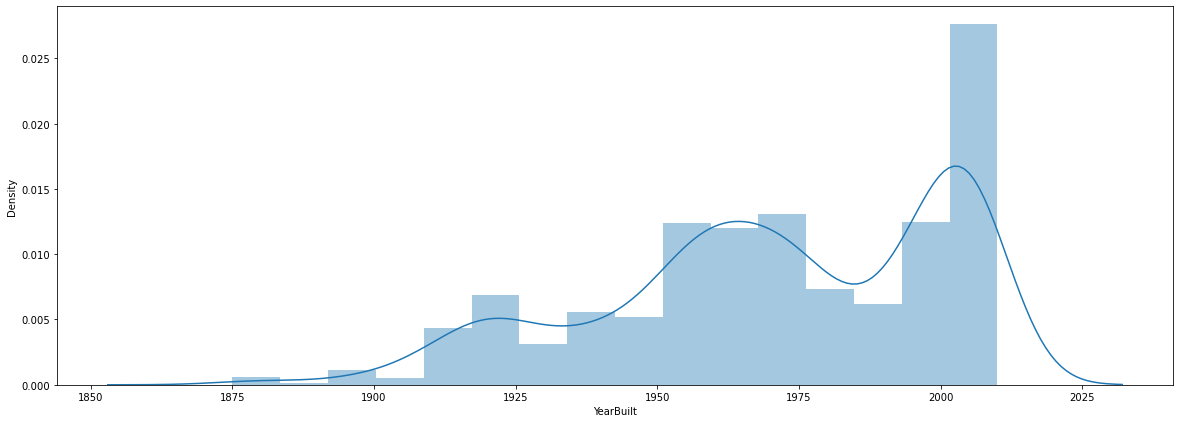

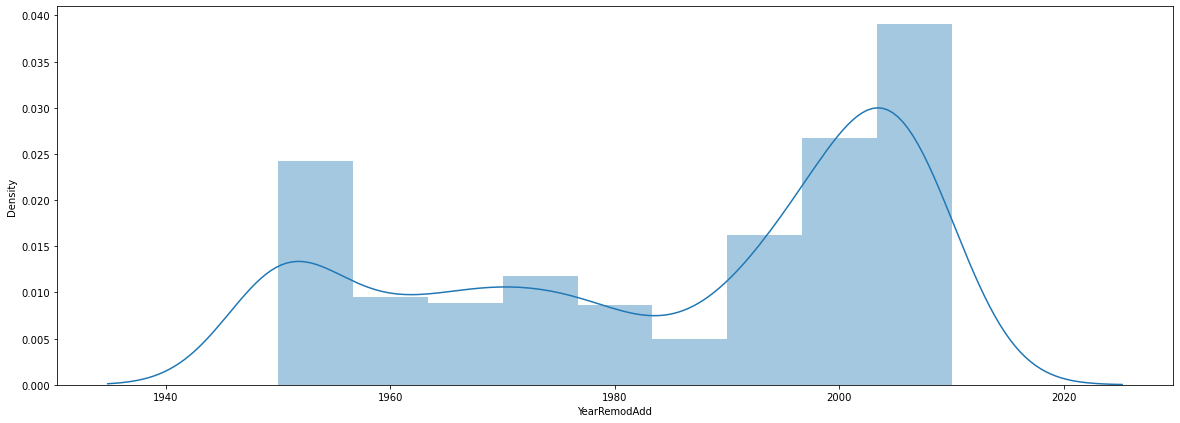

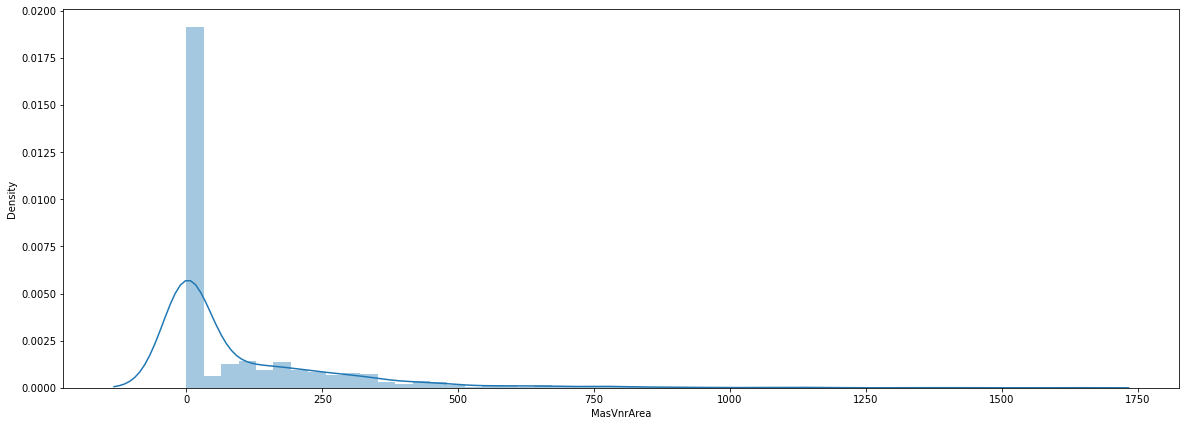

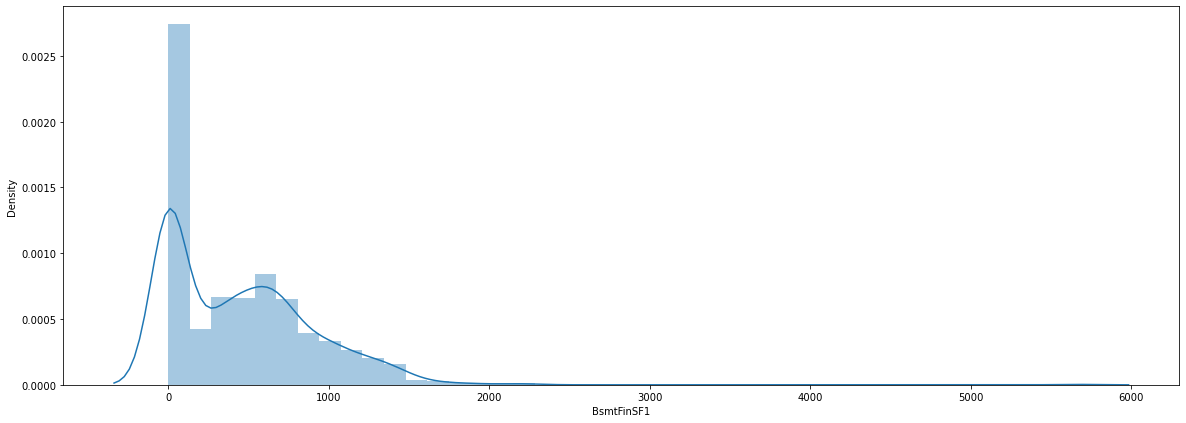

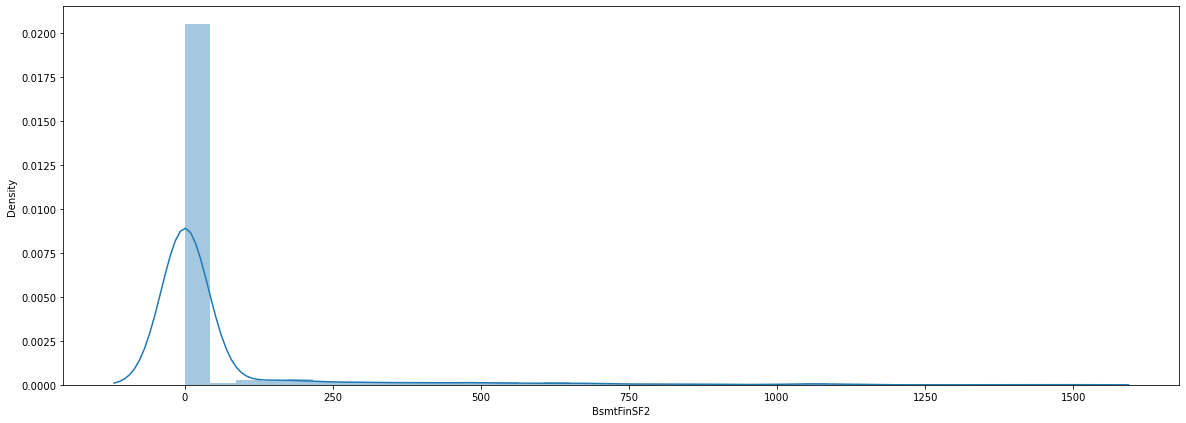

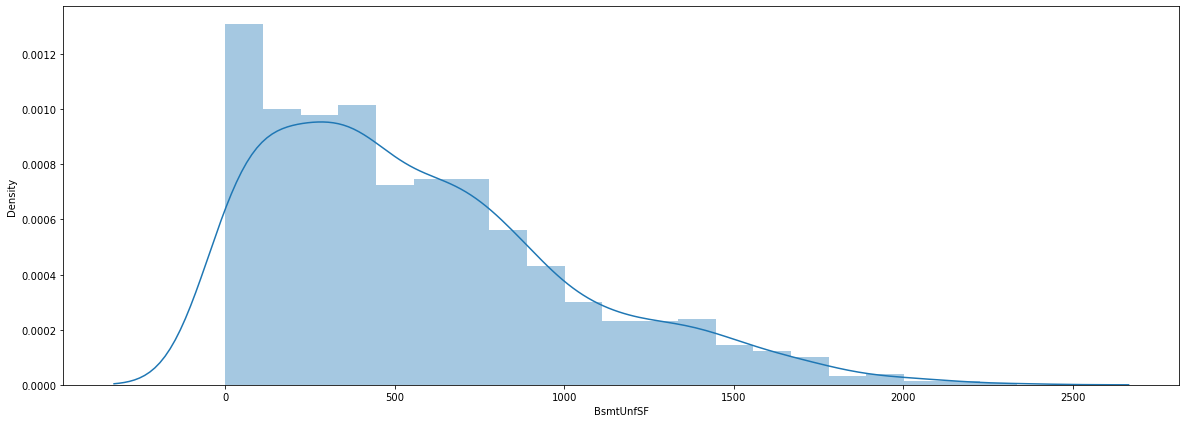

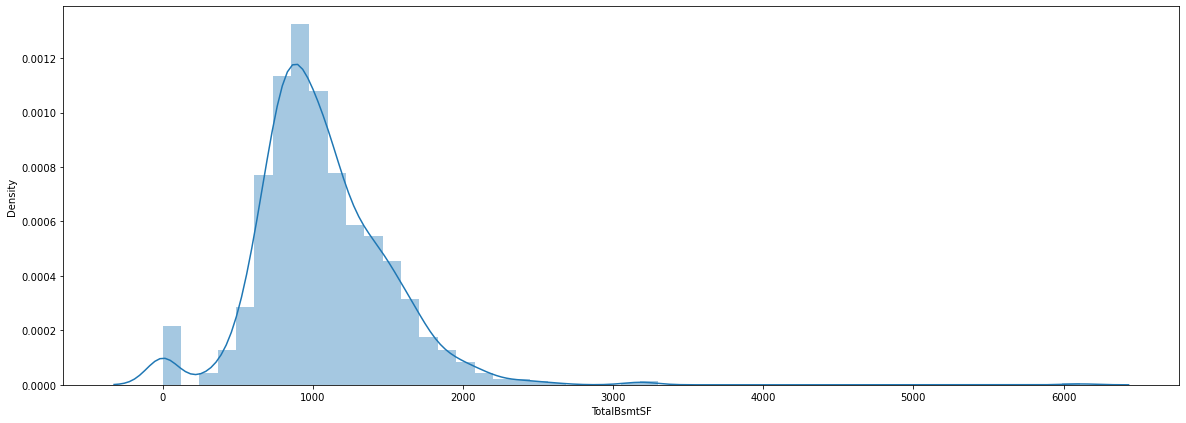

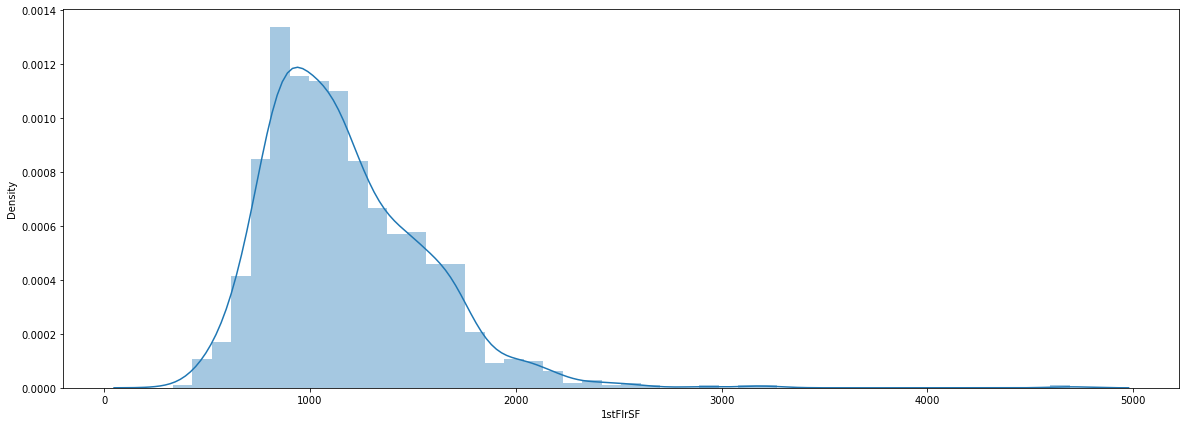

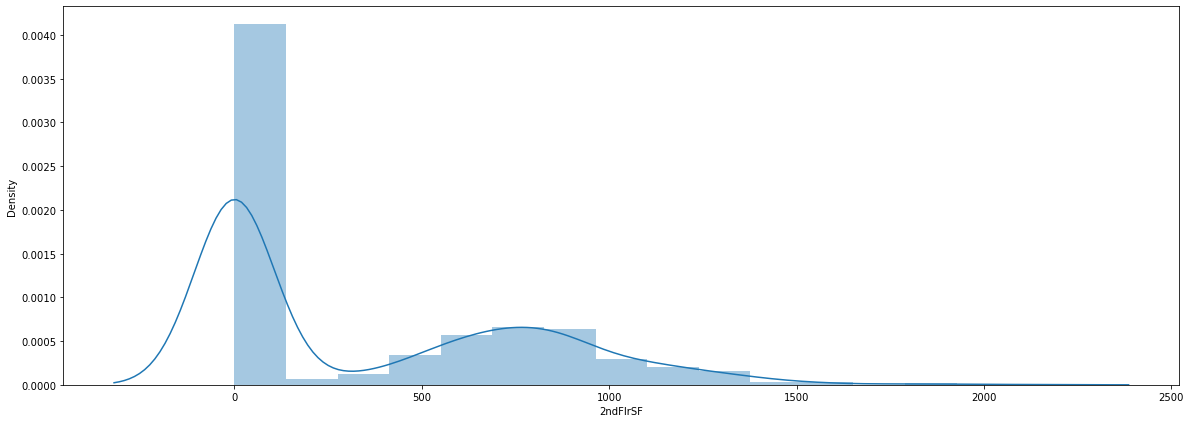

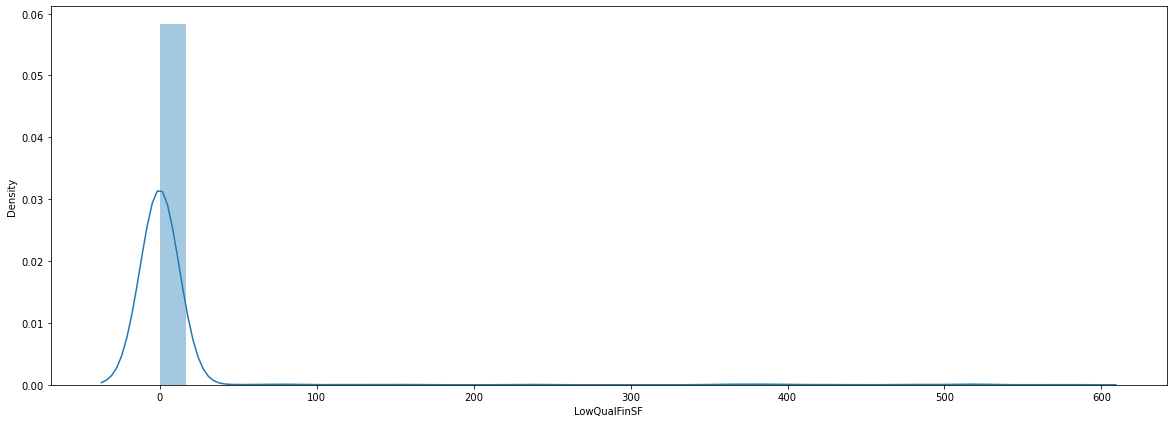

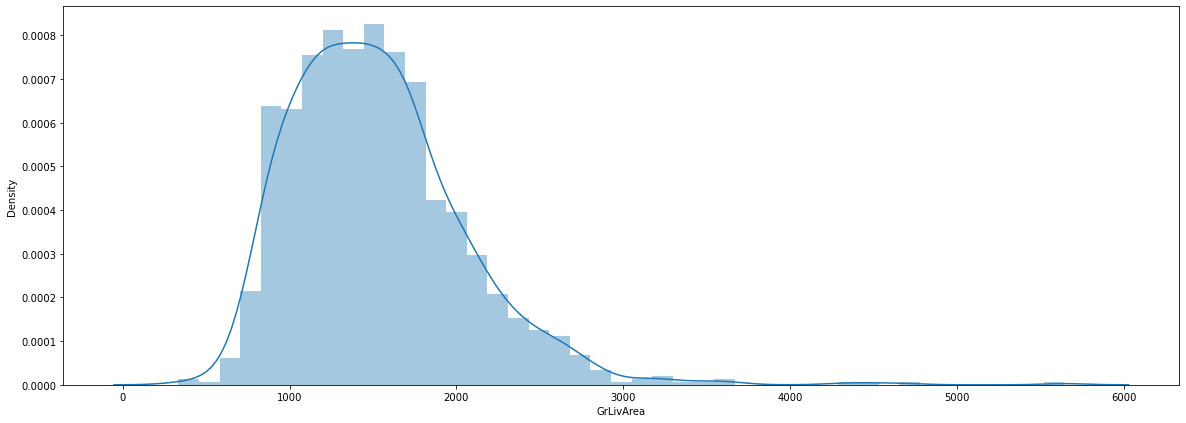

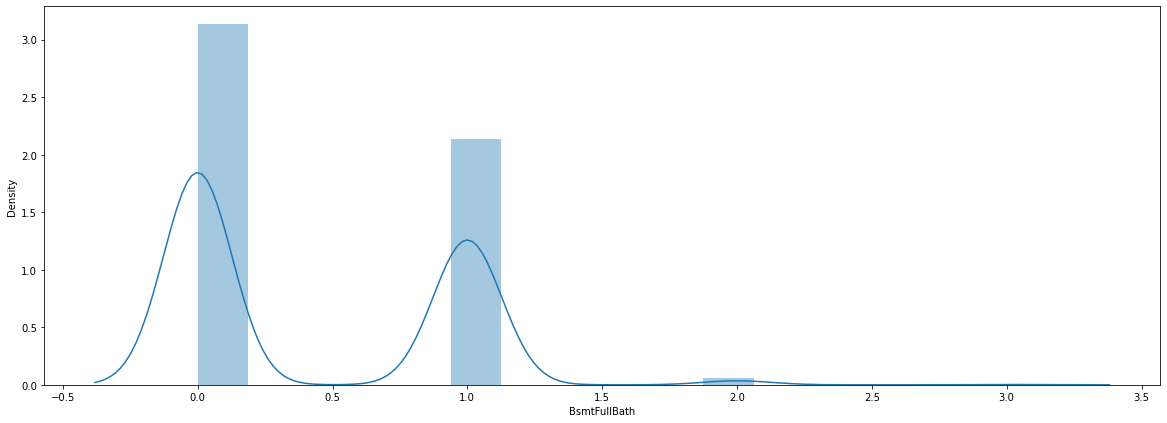

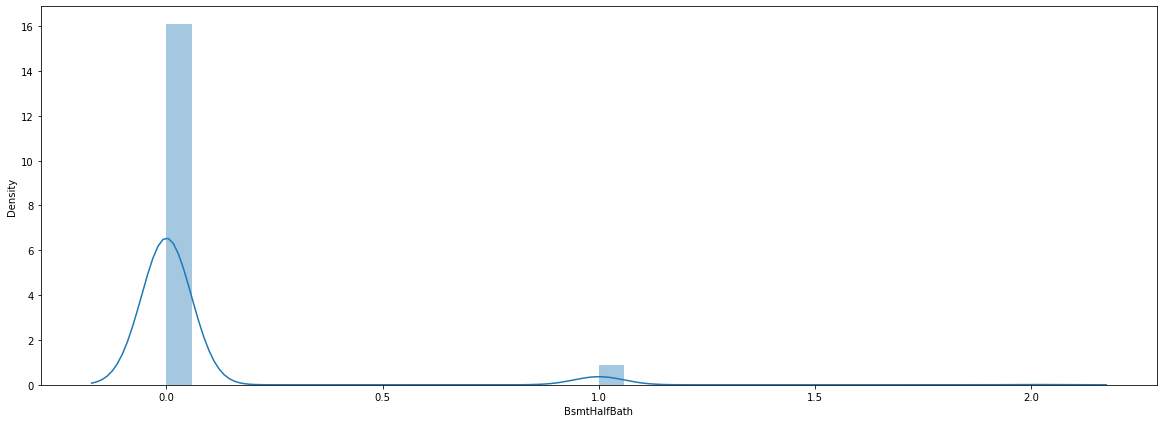

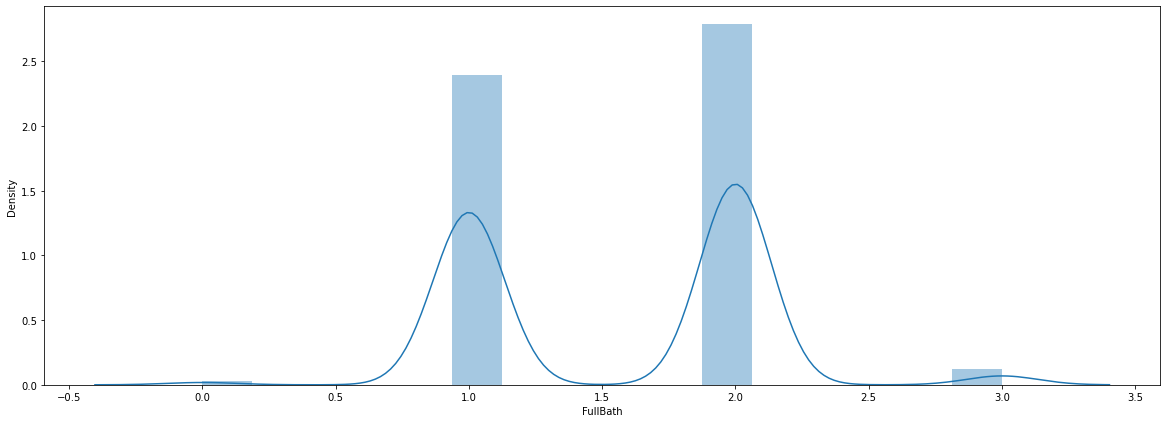

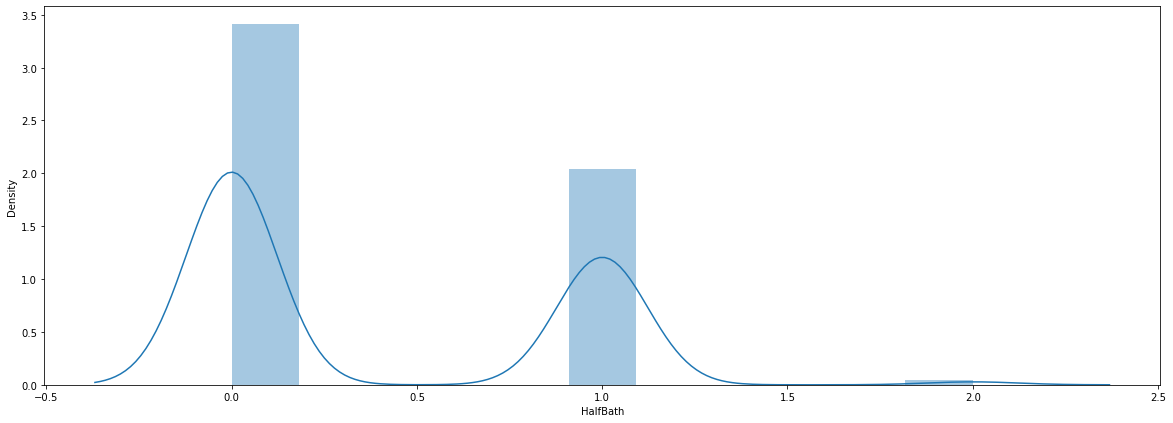

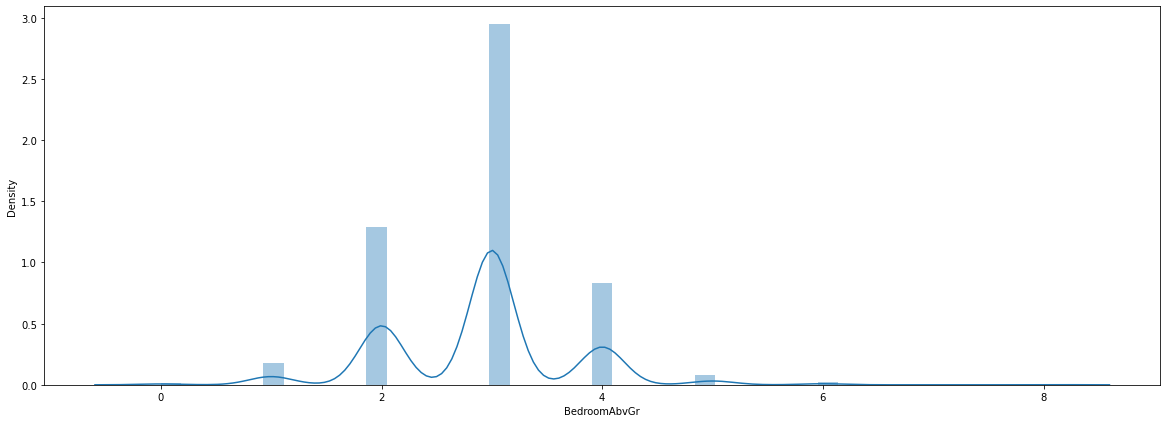

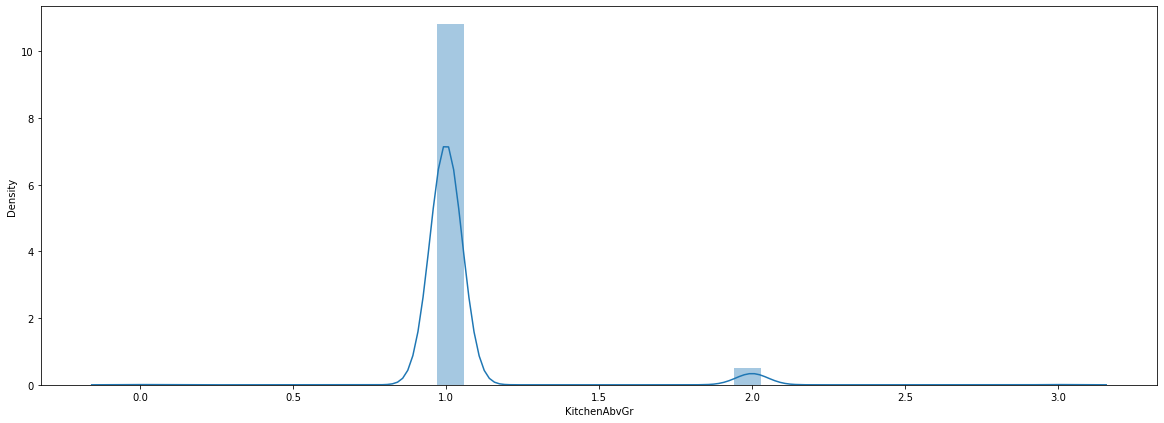

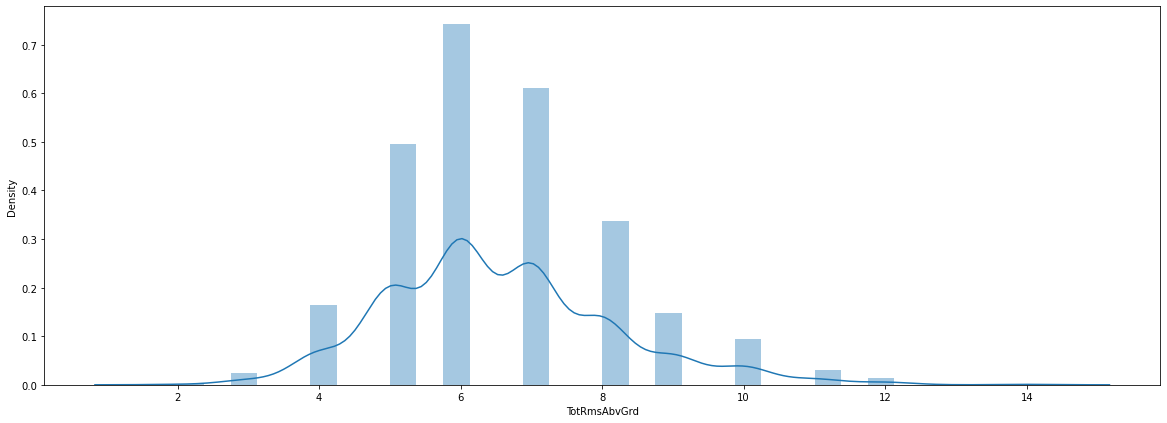

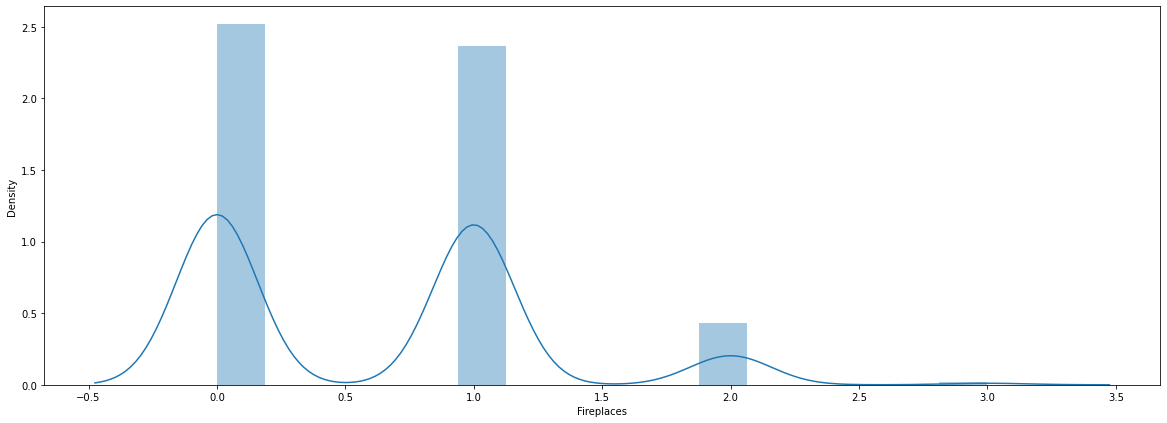

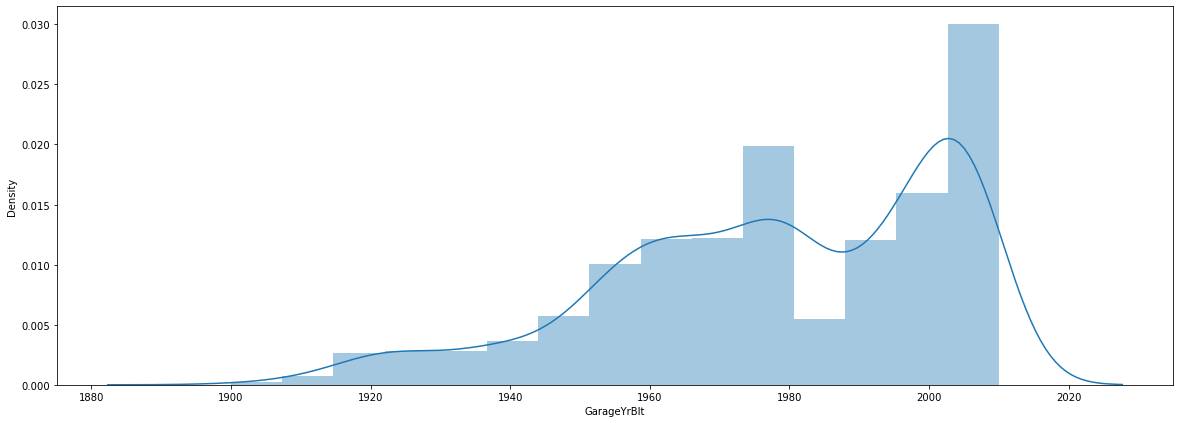

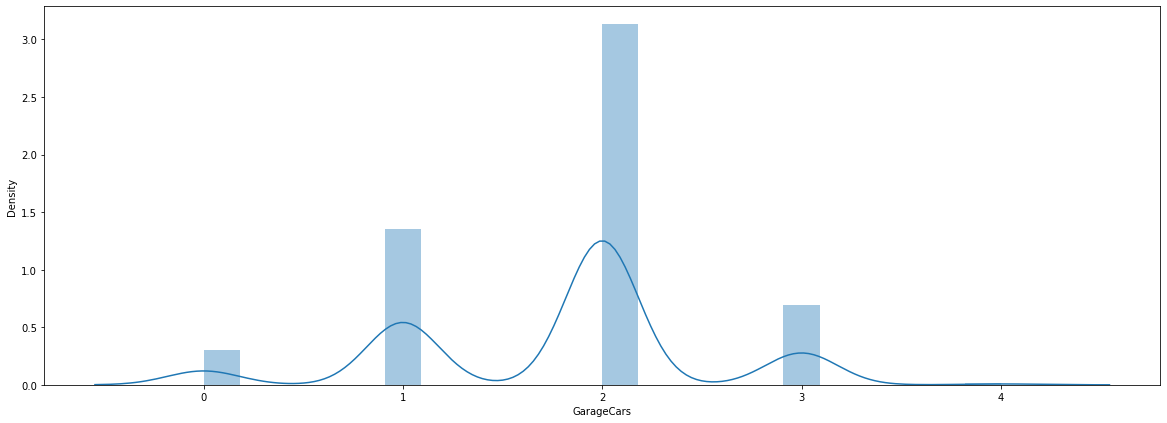

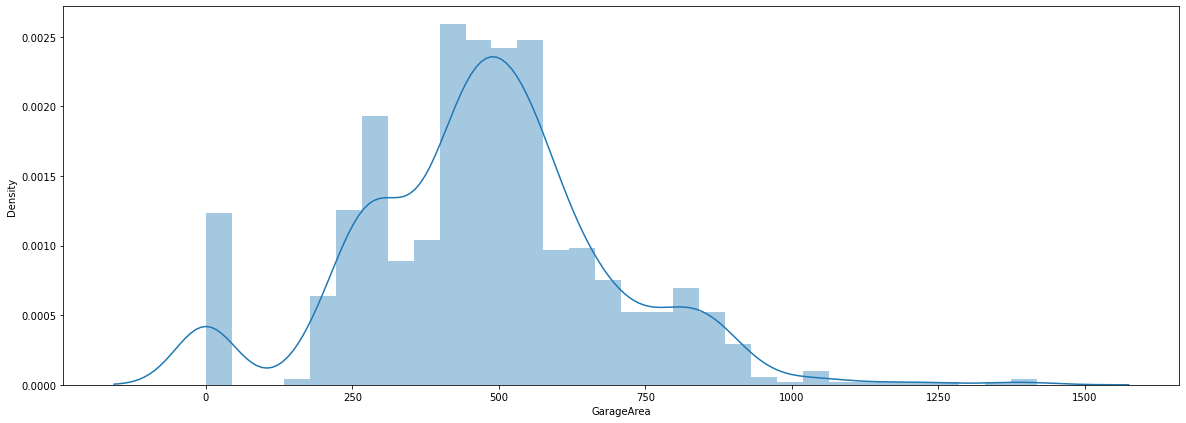

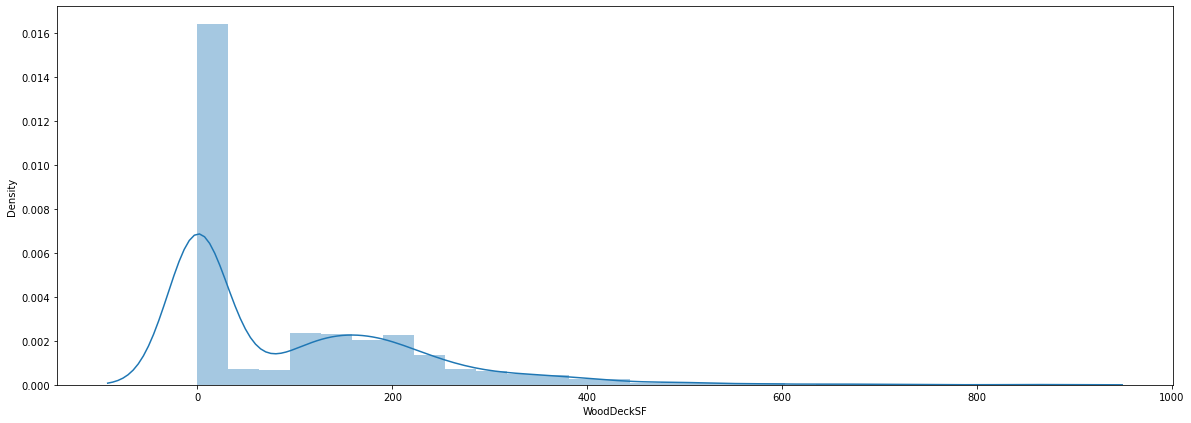

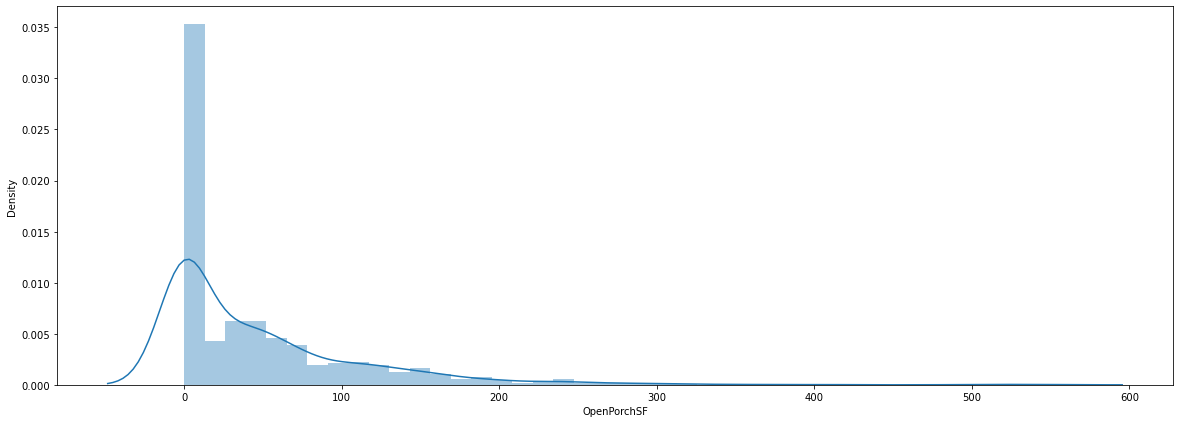

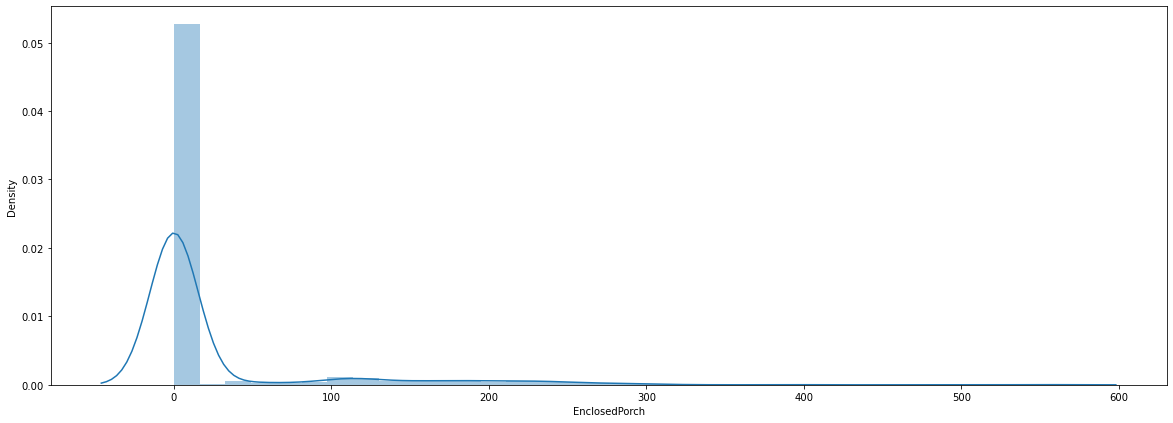

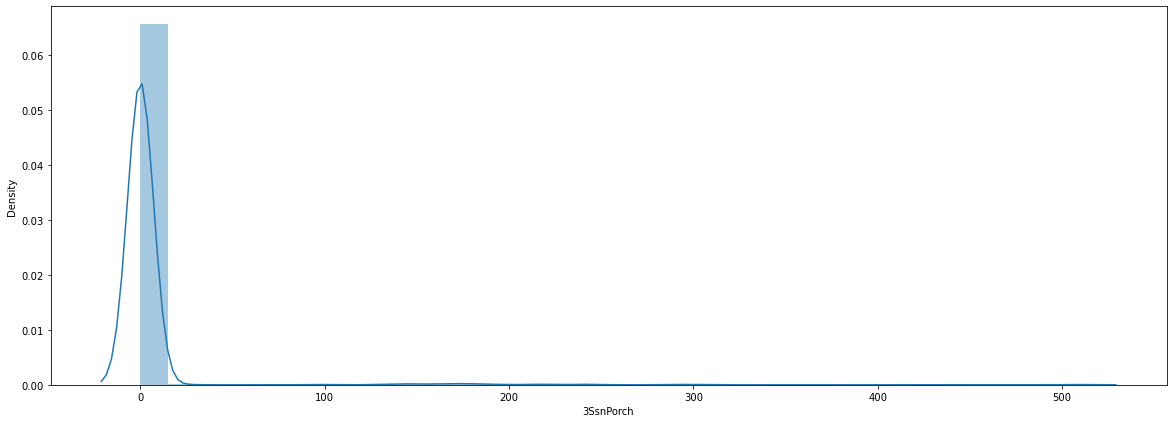

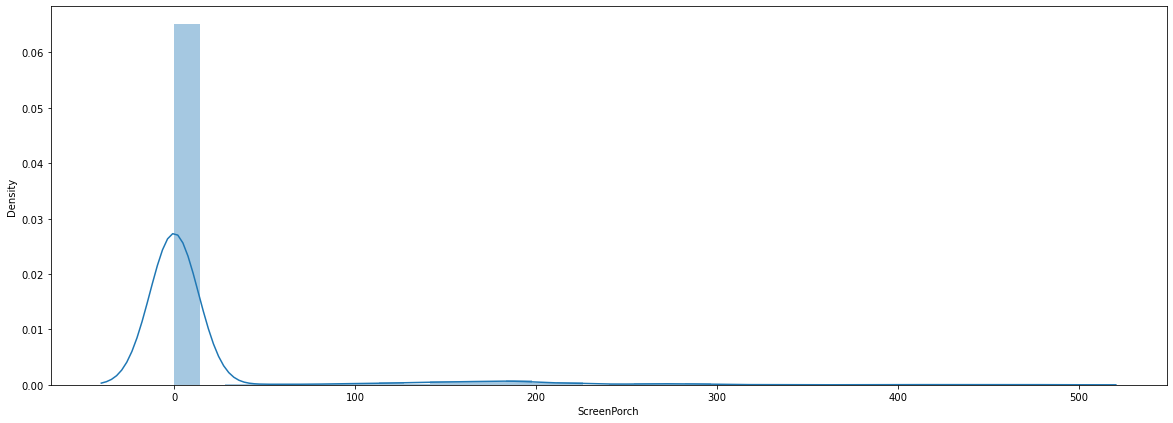

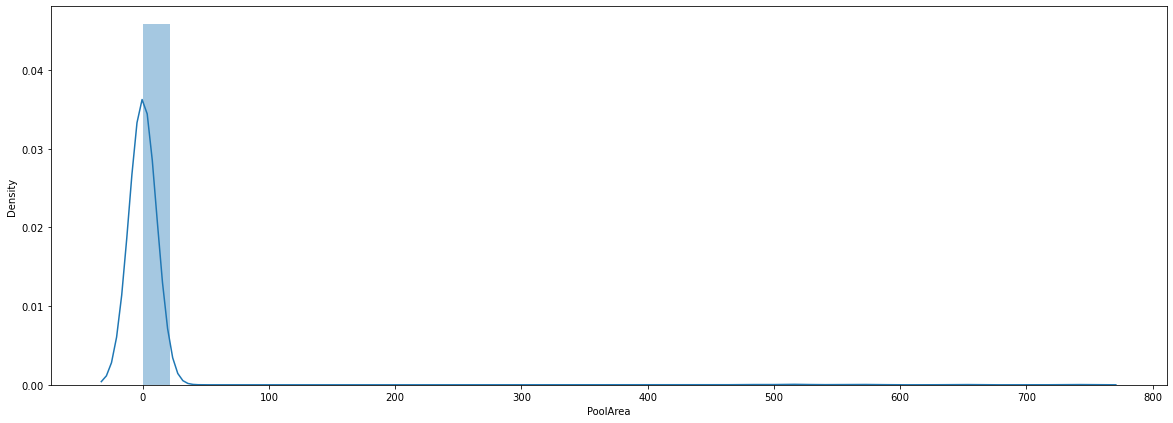

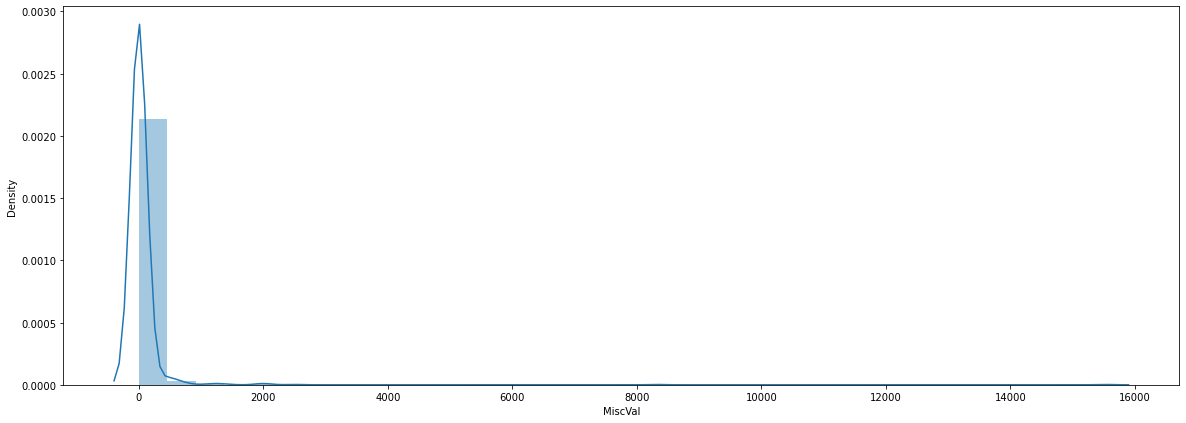

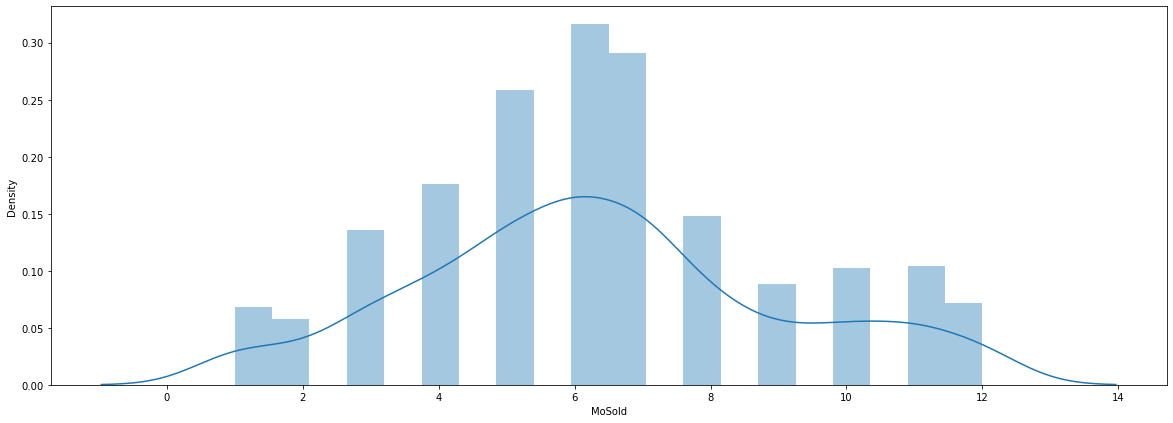

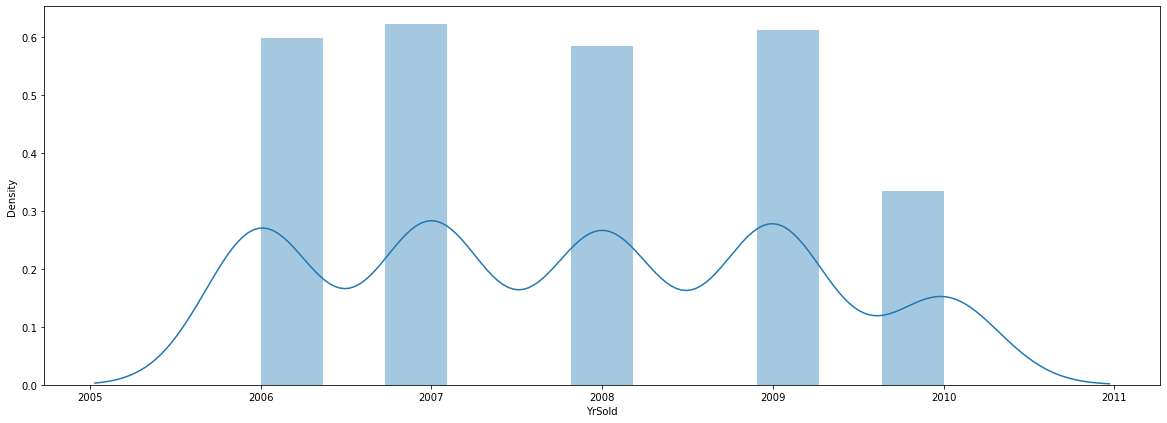

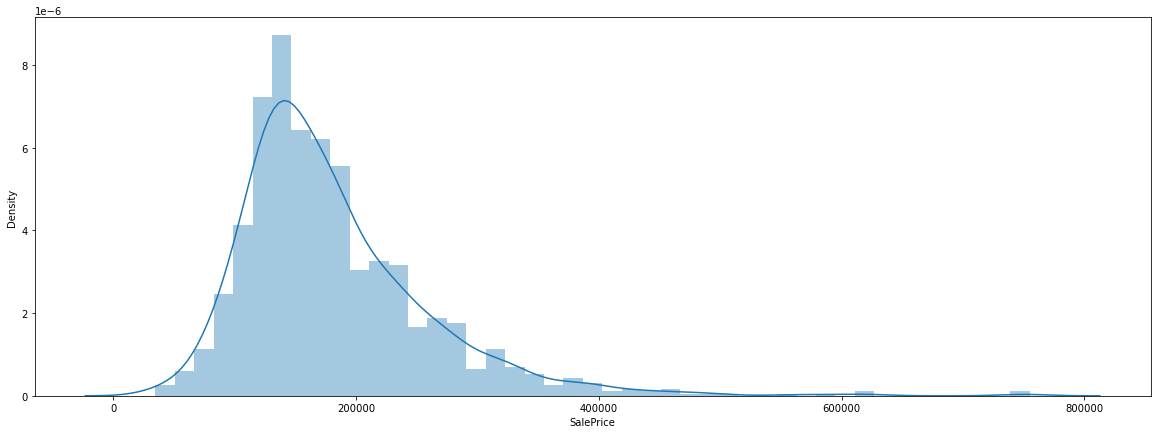

In [14]:
counter=1;
for i in range(0,len(continuous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.distplot(df[continuous_columns[i]])
        plt.show()

MSSubClass -> not normally distributed
LotFrontage -> normally distributed
LotArea -> Normally distributed
OverallQual-> Not normally distributed
Overall cond-> Not normally distributed
Year Built -> Not  normally distributed
Year remod add->not normally distributed
BsmtFinSF1 ->not normally distributed
GaragerBlt ->not normally distributed
Garage Area -> not normally distributed

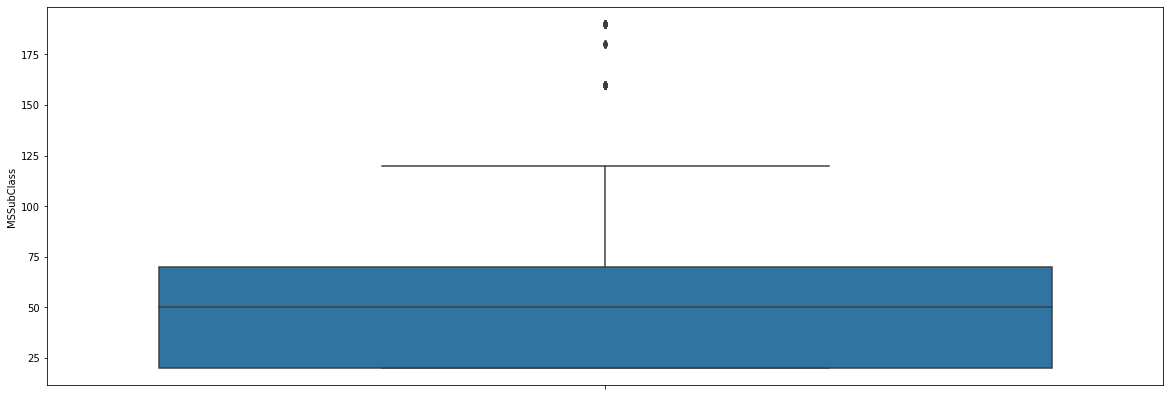

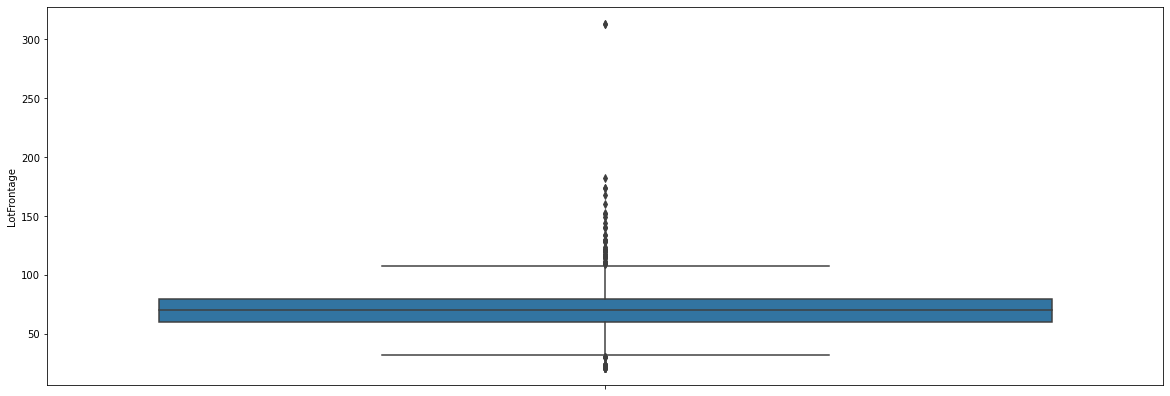

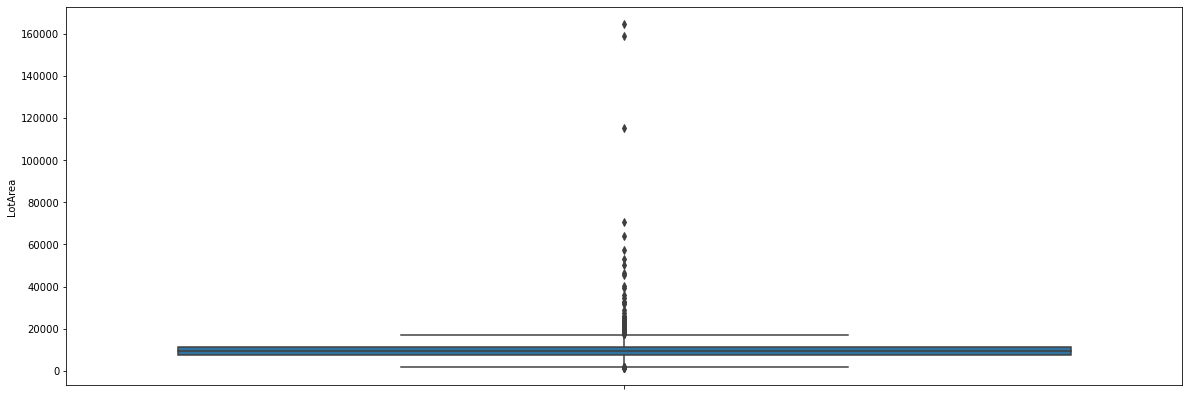

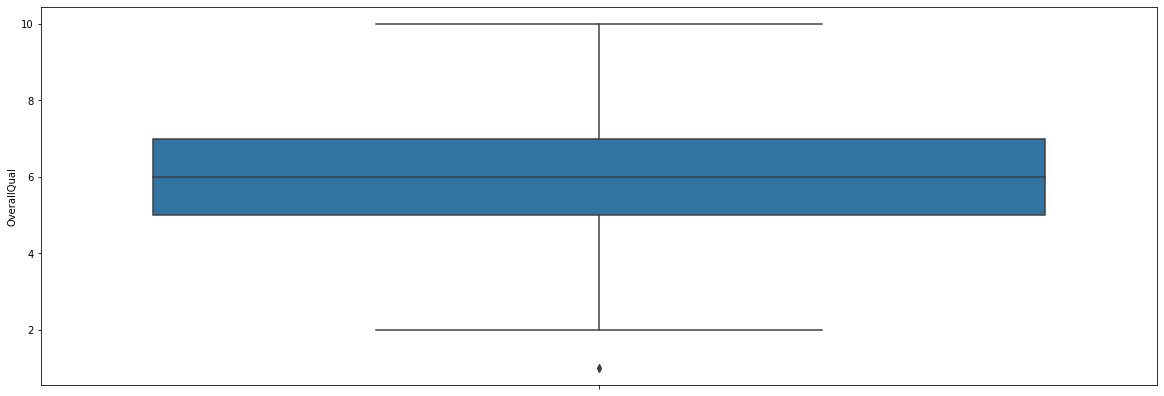

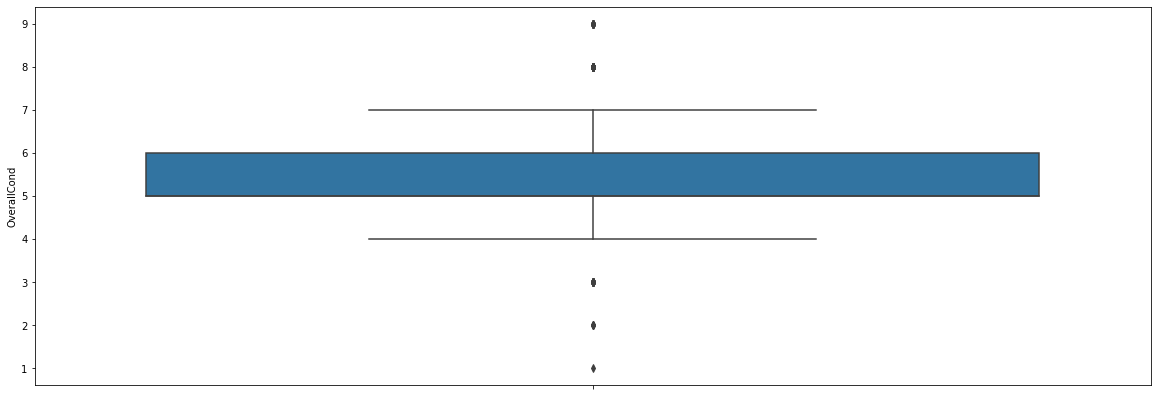

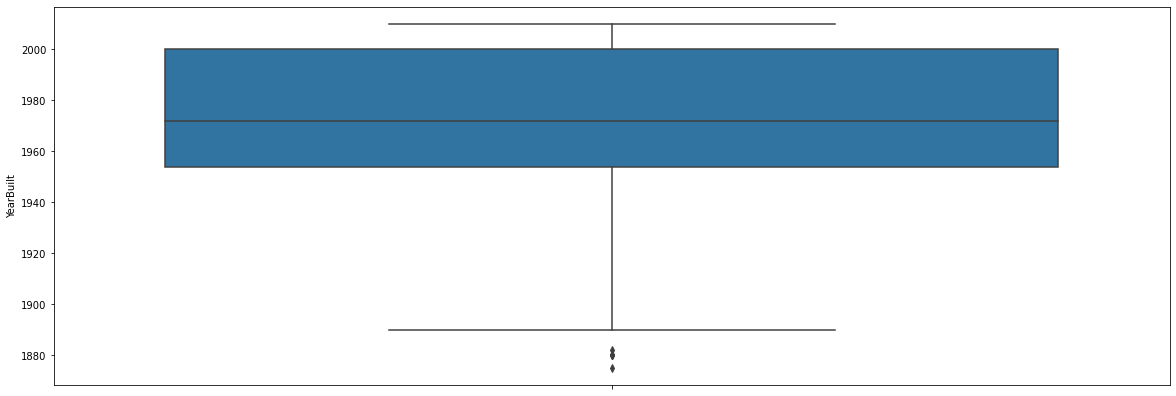

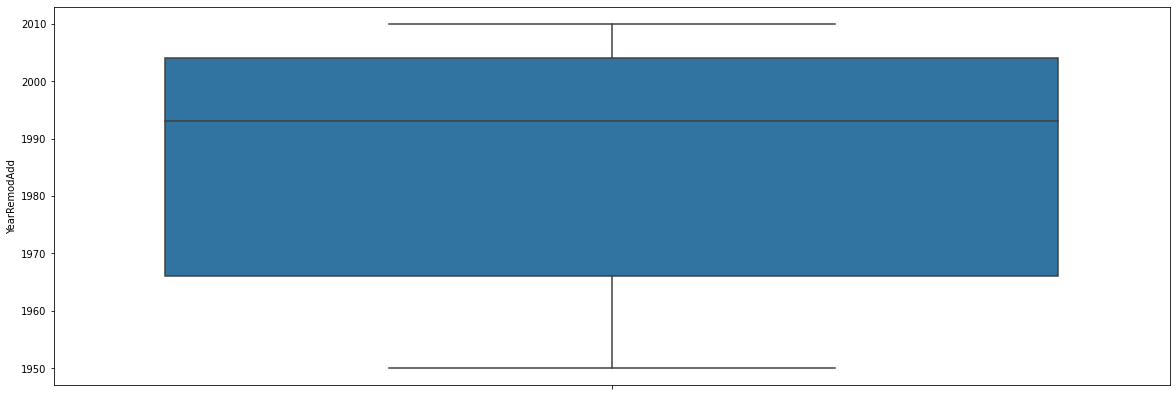

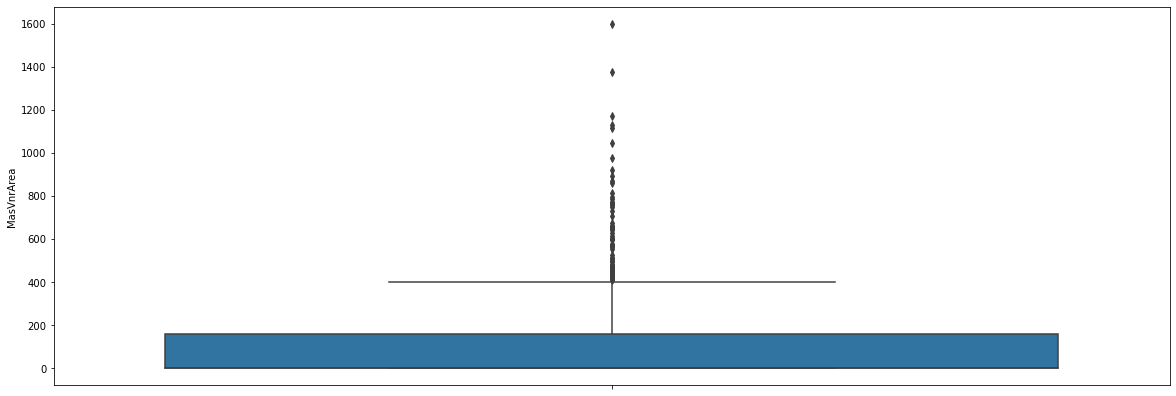

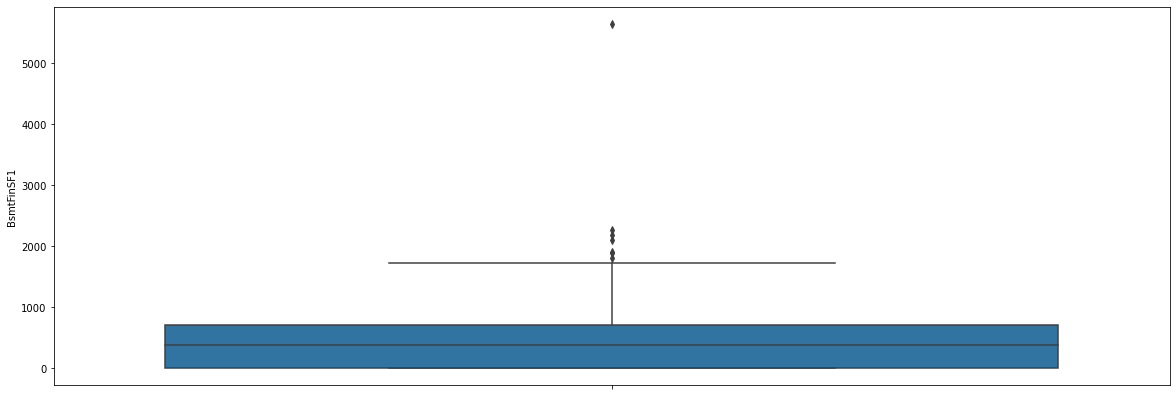

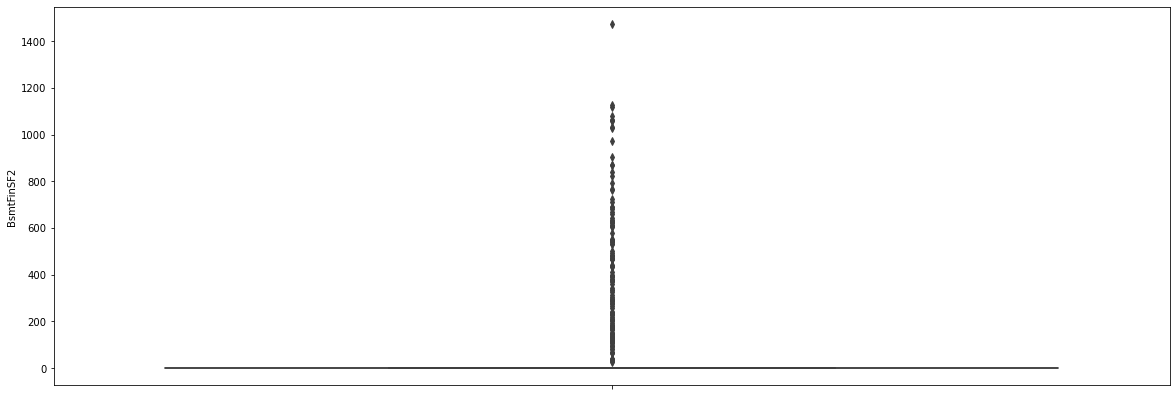

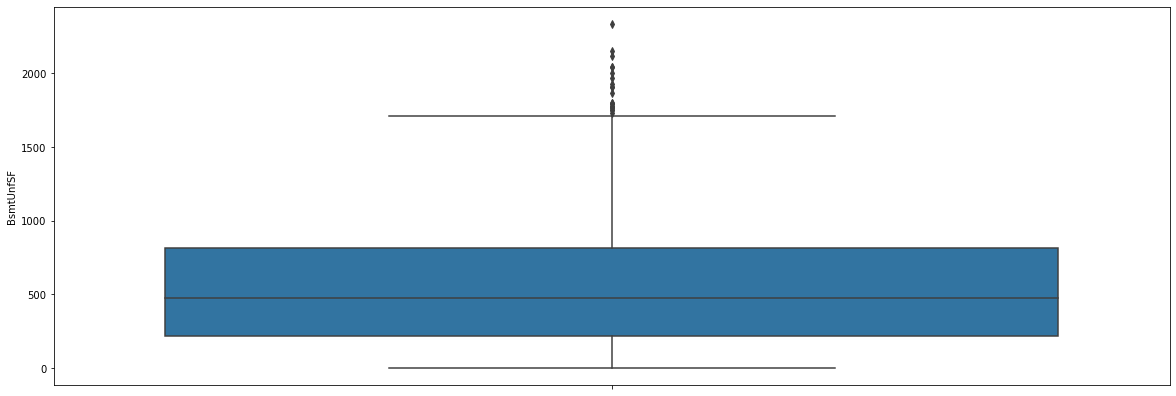

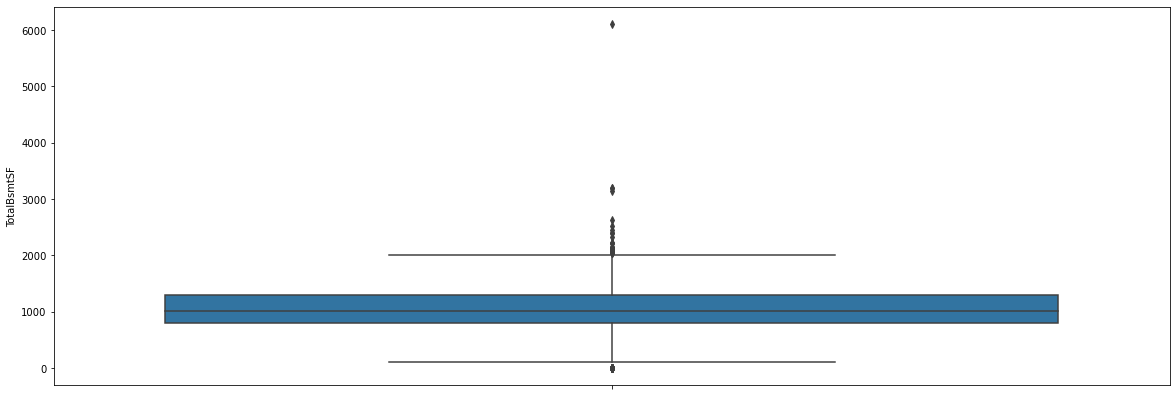

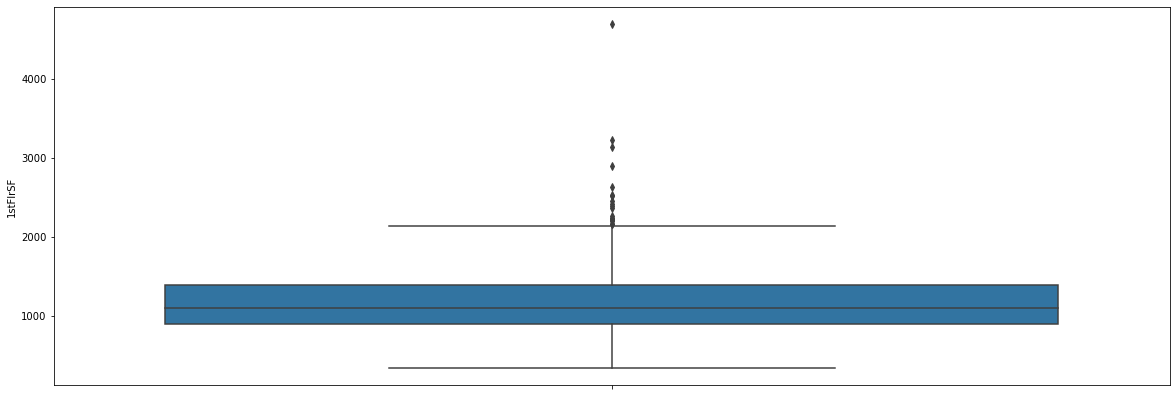

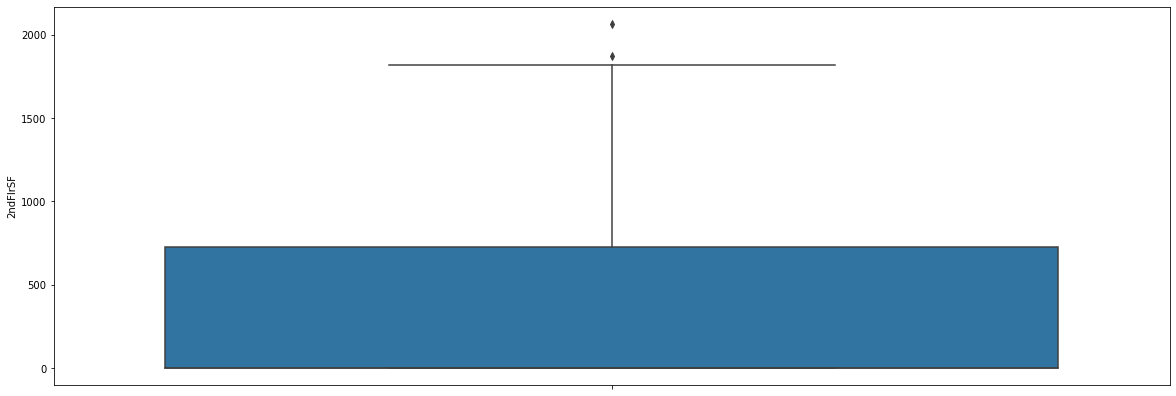

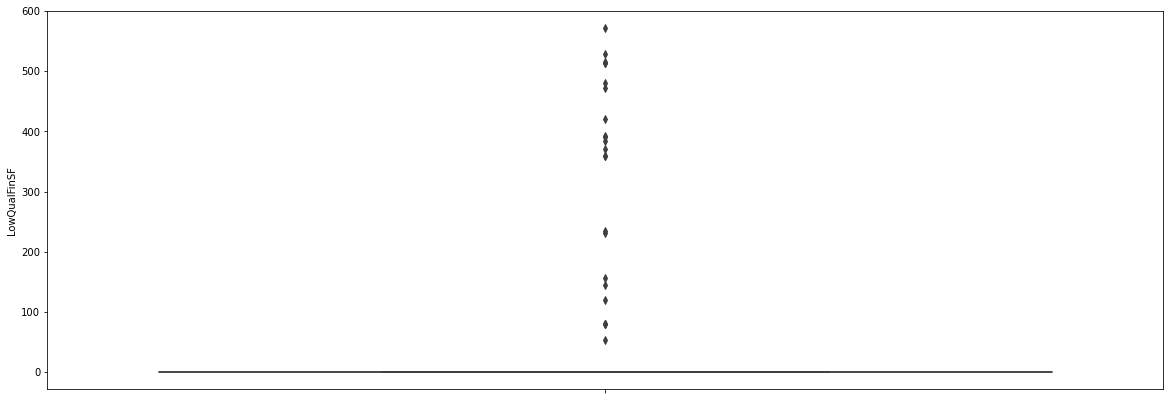

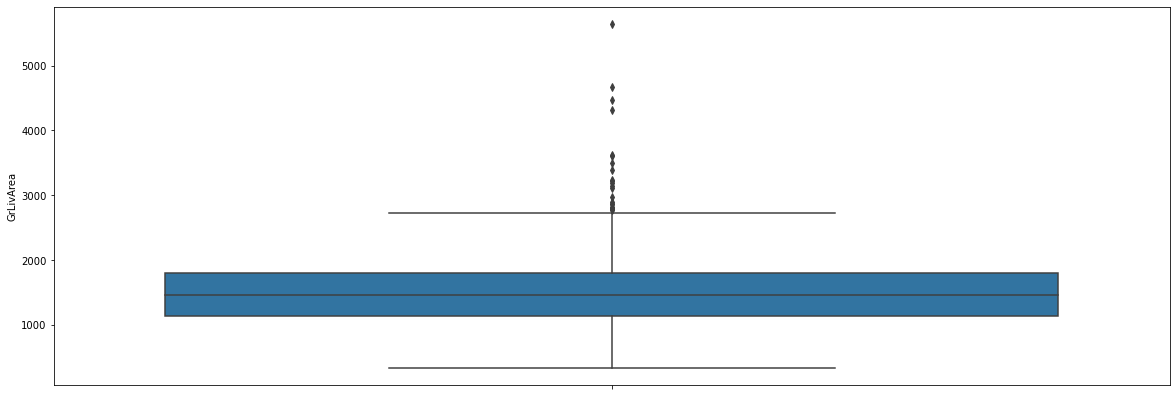

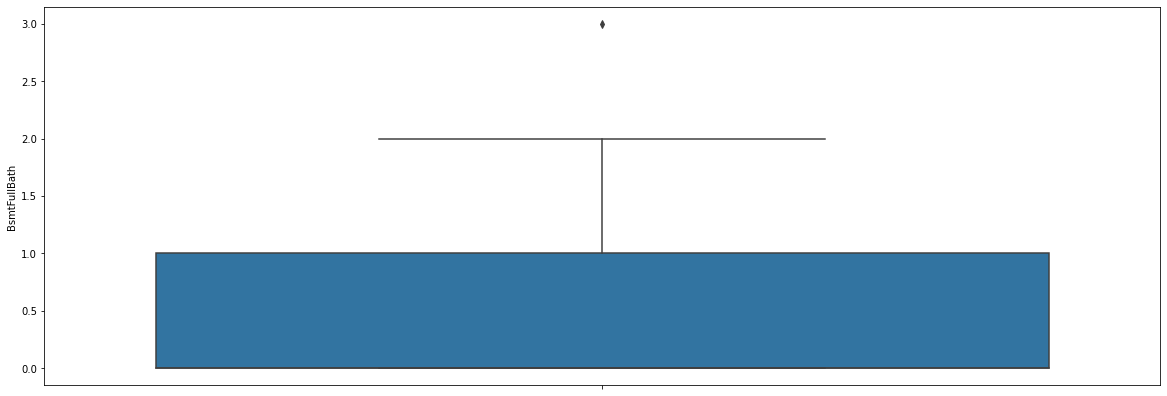

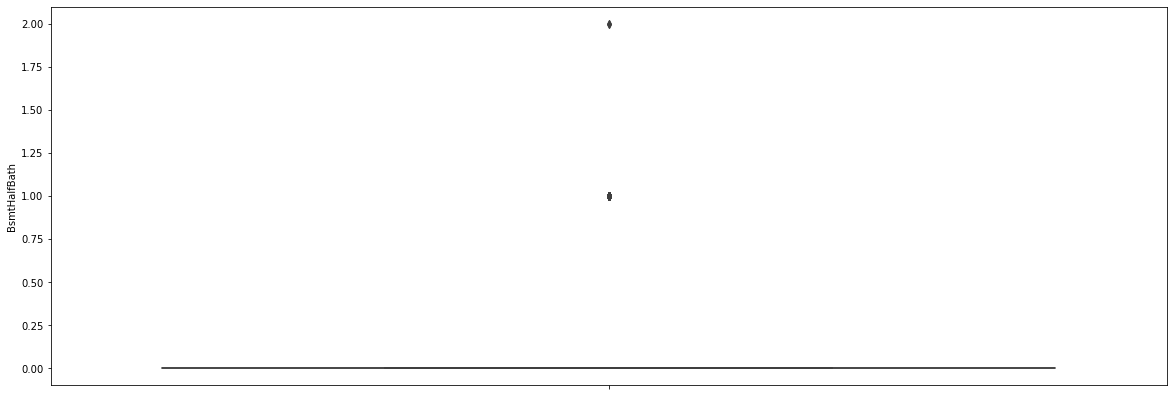

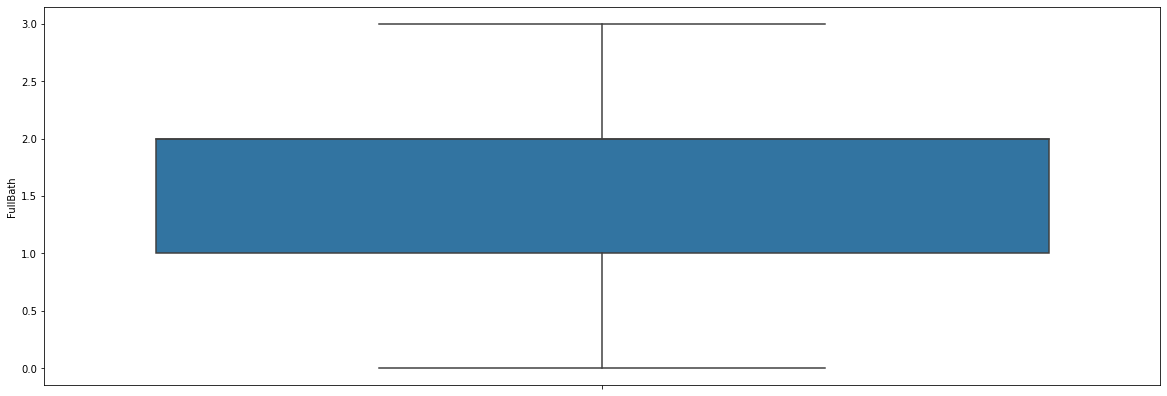

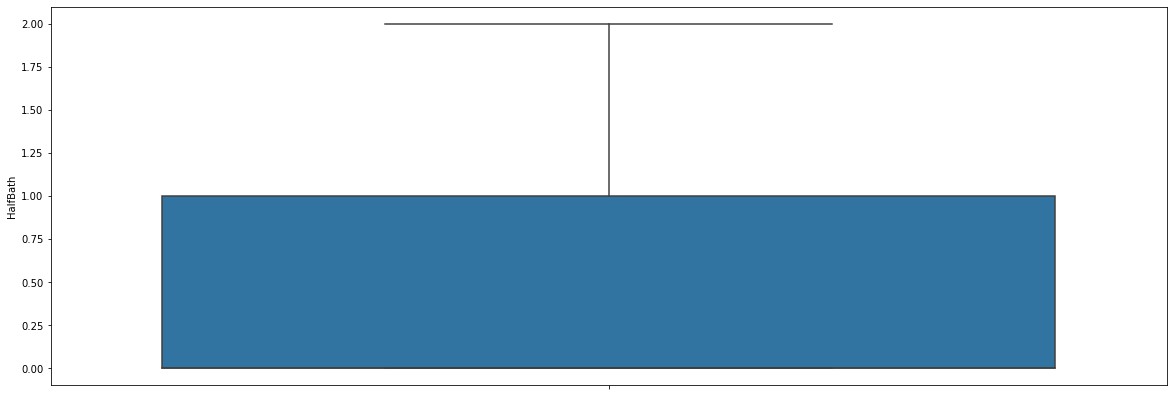

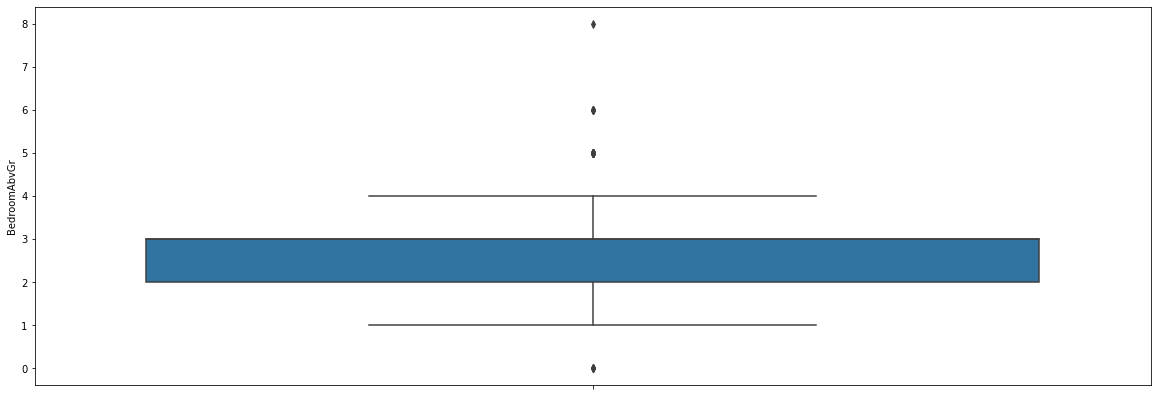

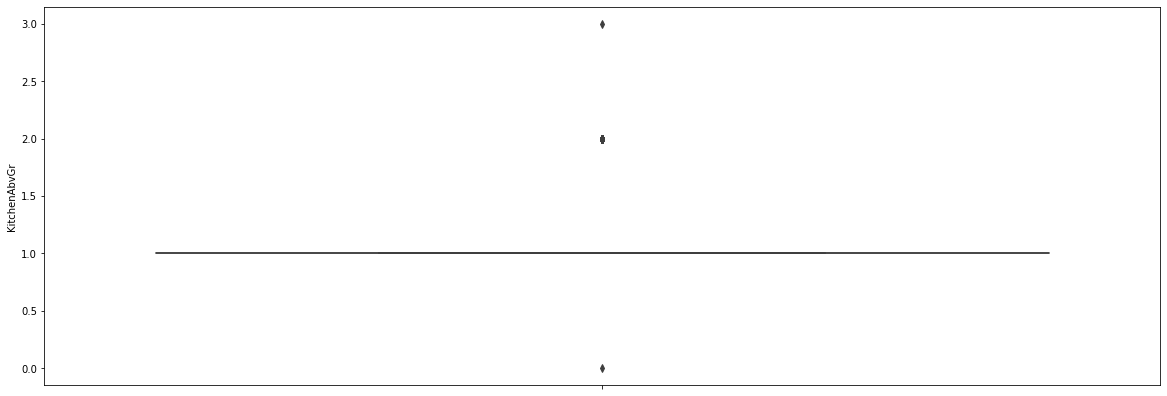

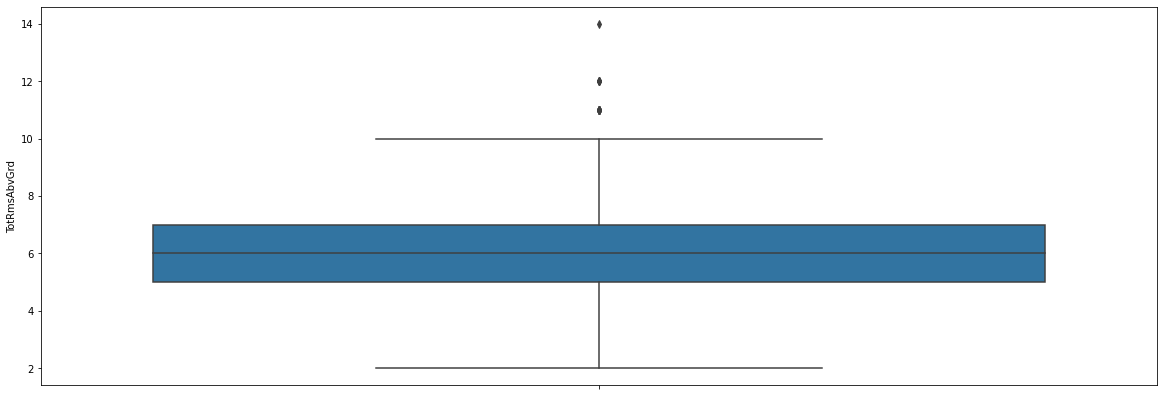

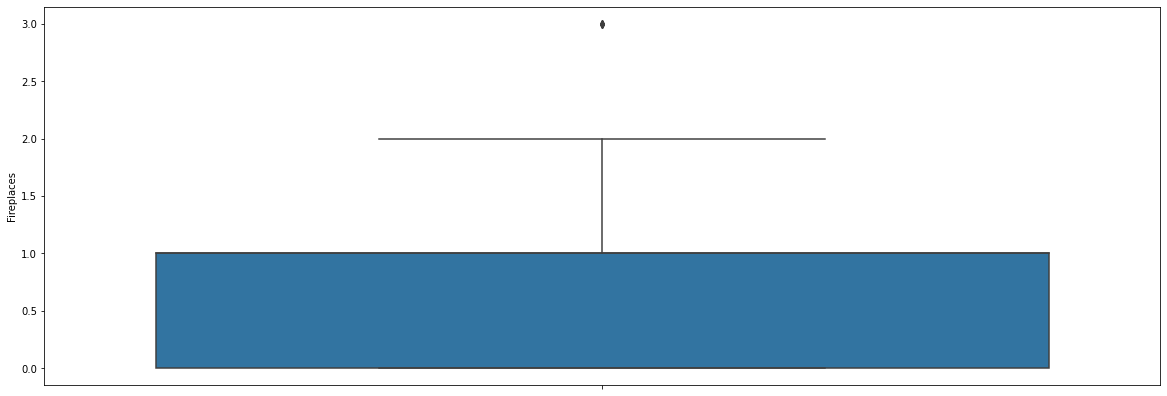

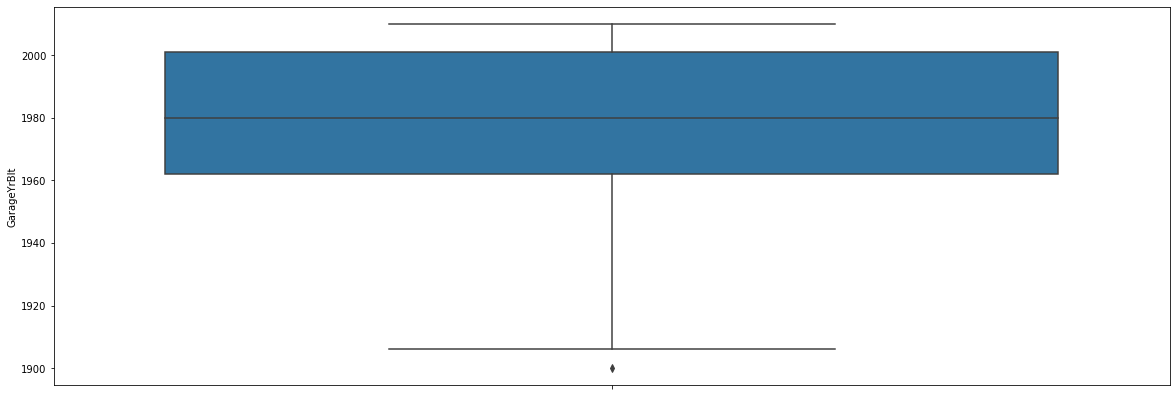

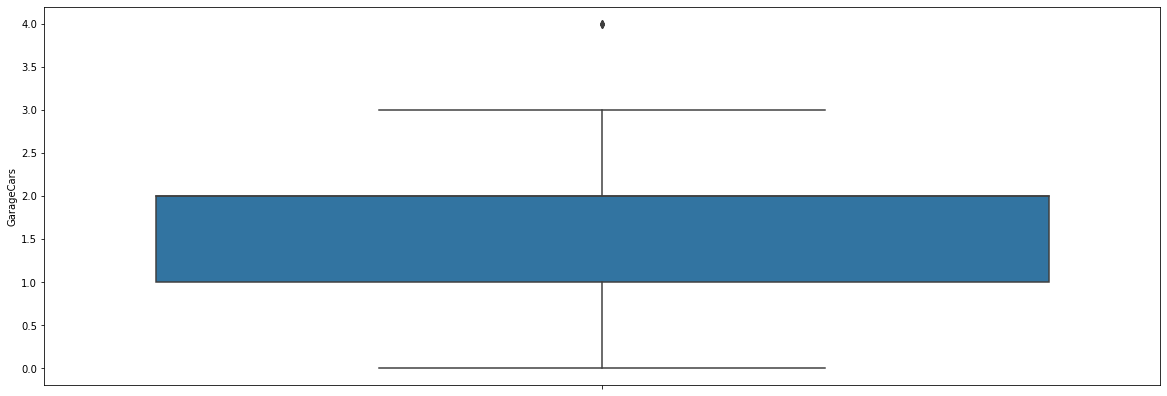

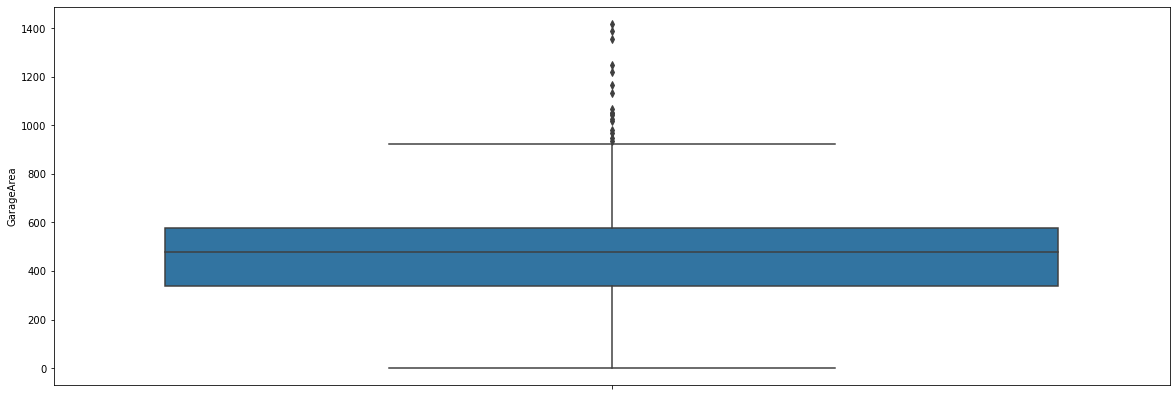

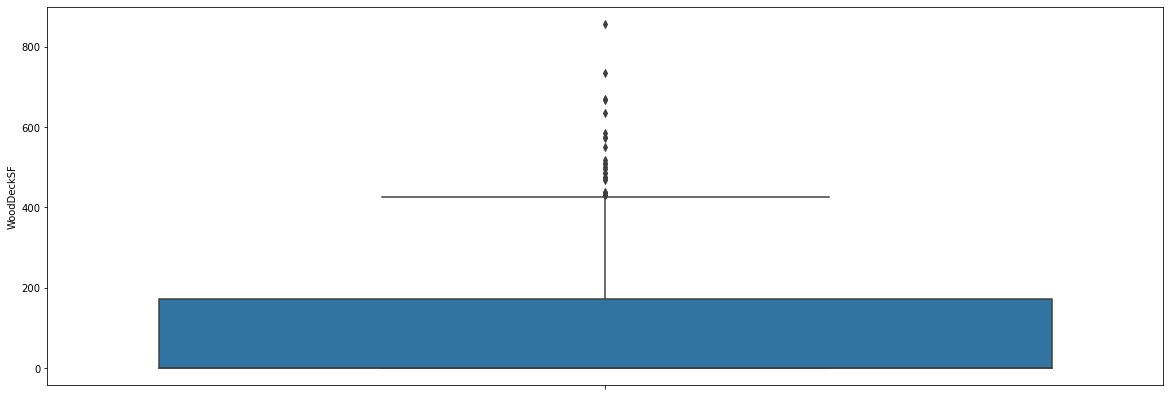

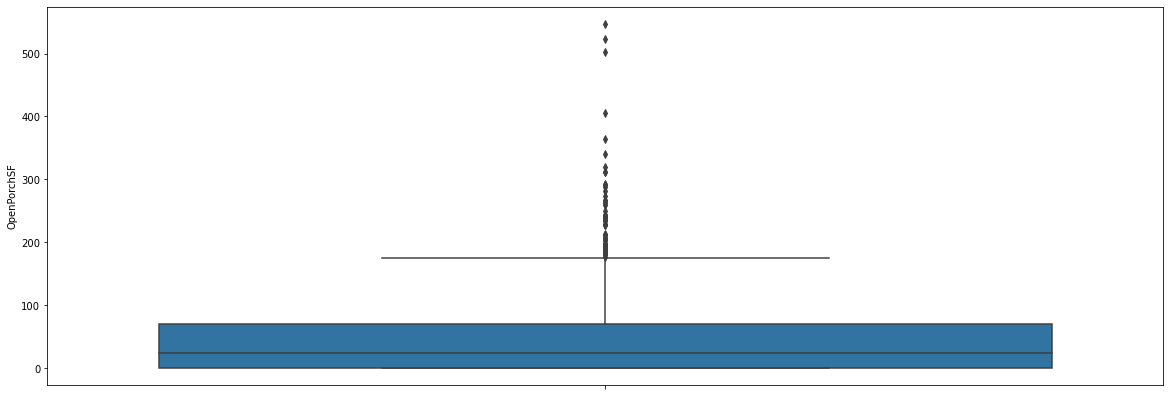

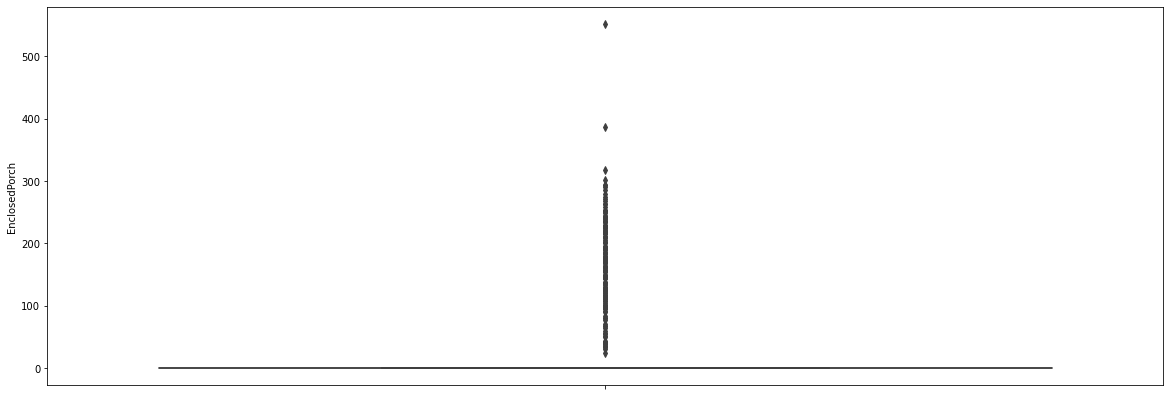

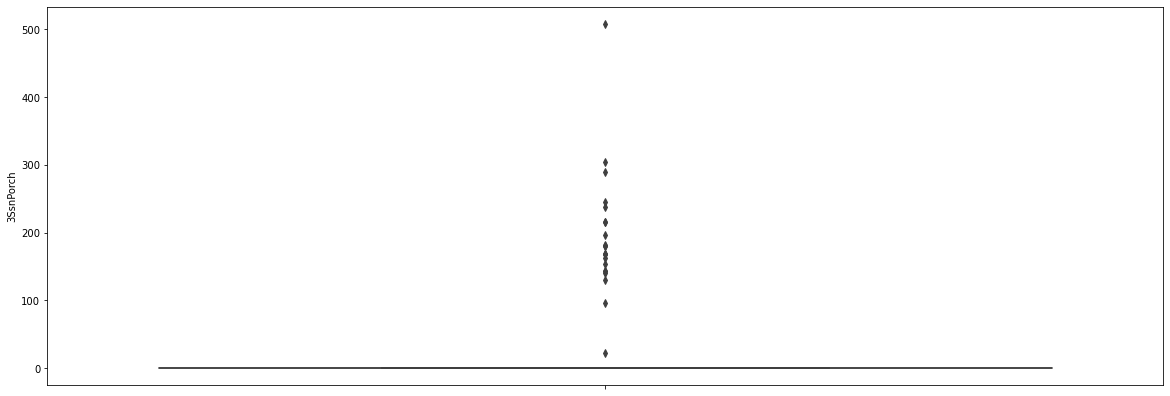

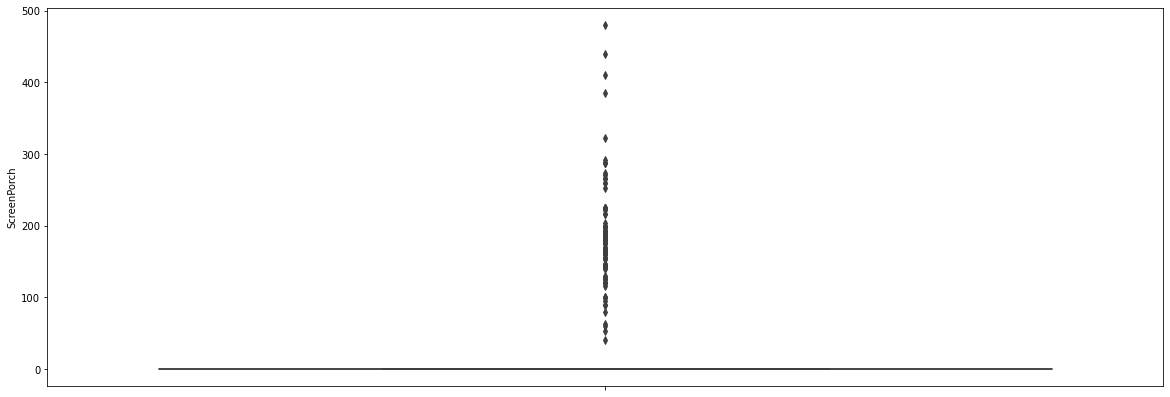

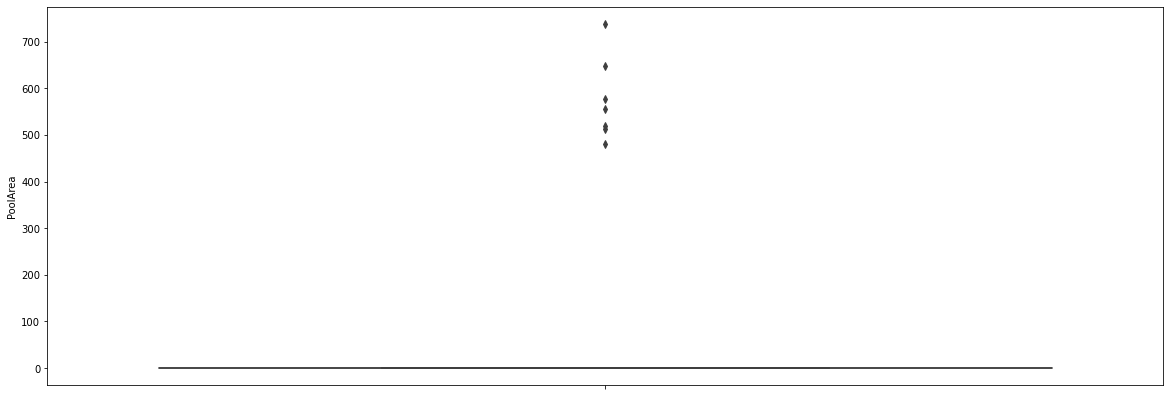

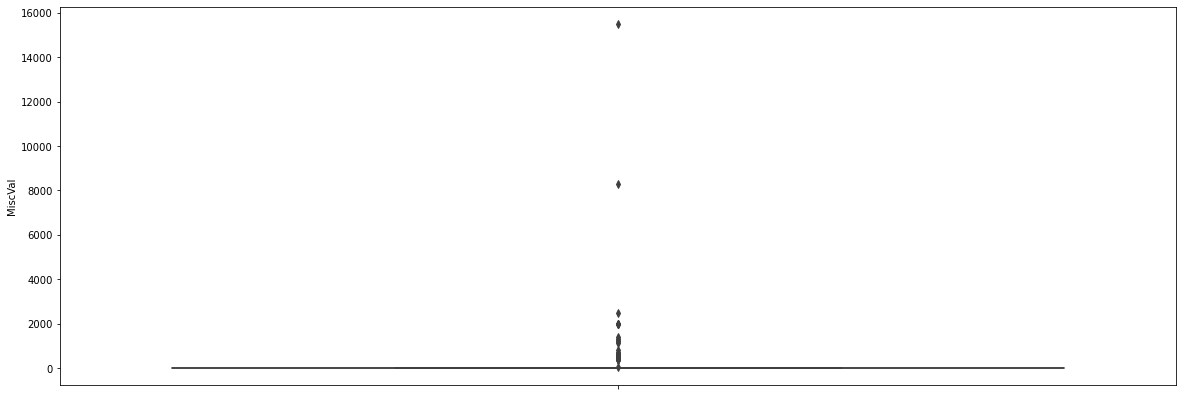

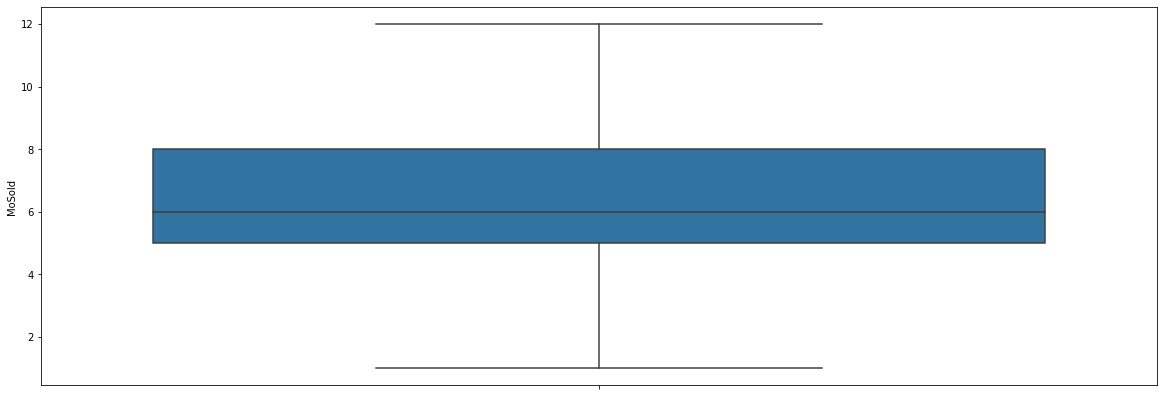

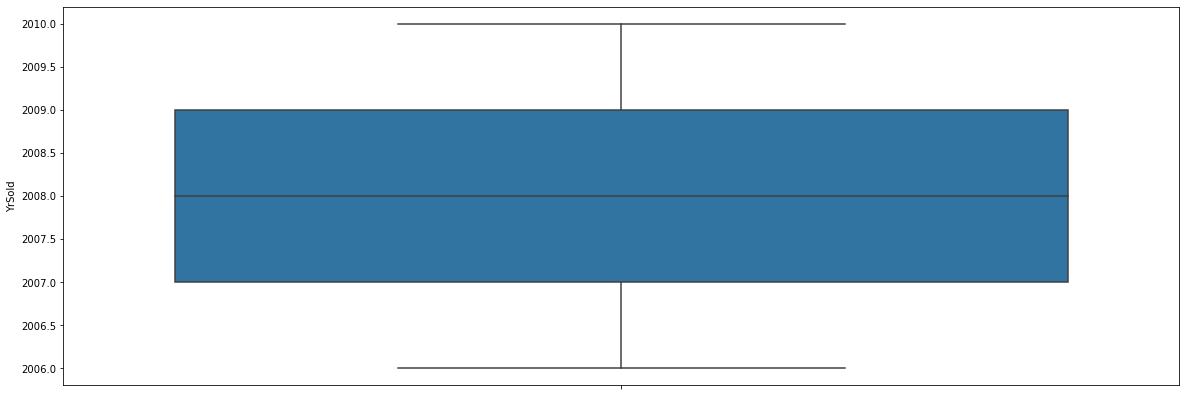

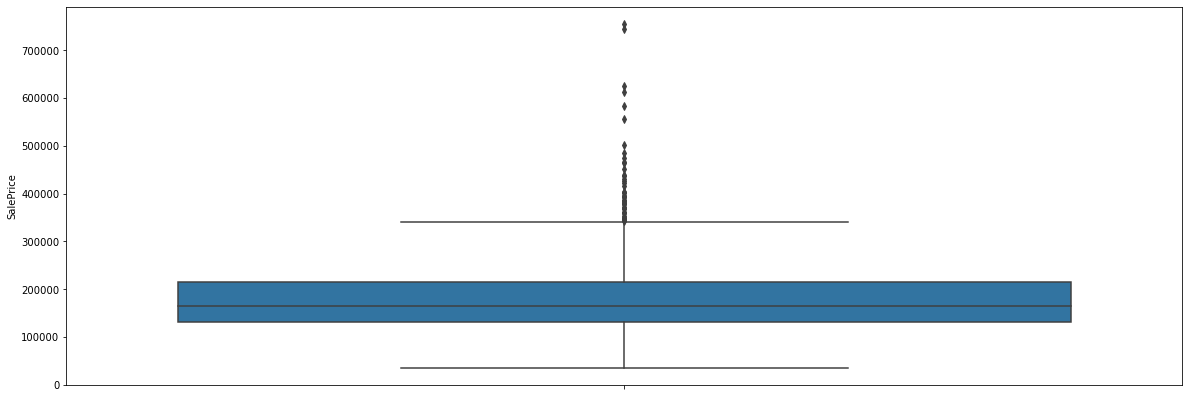

In [15]:
counter=1;
for i in range(0,len(continuous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continuous_columns[i],hue = continuous_columns[i],data=df)
        plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

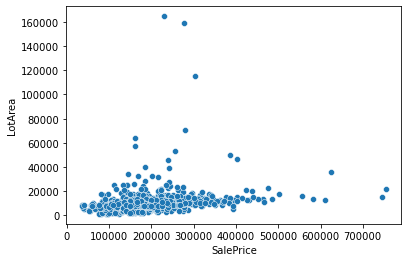

In [16]:
sns.scatterplot(x='SalePrice',y='LotArea',data=df)

In [17]:
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


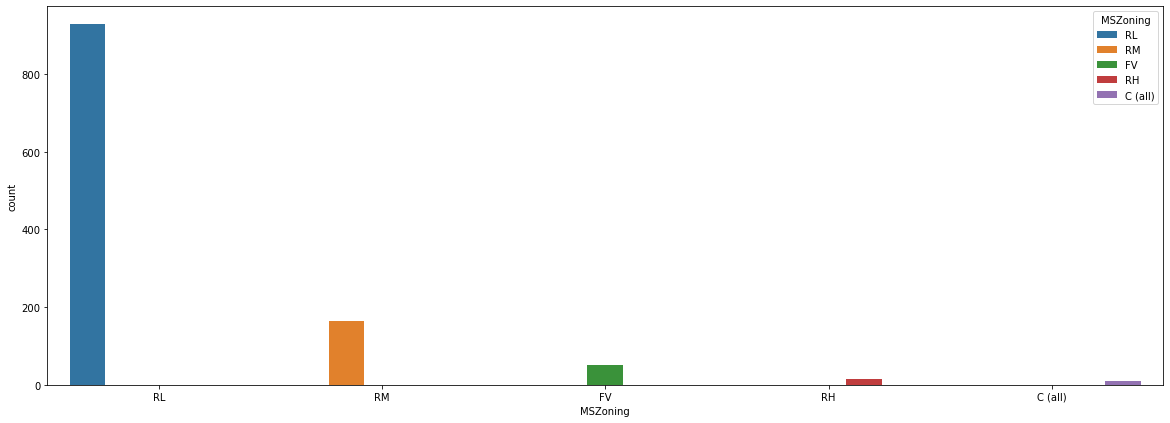

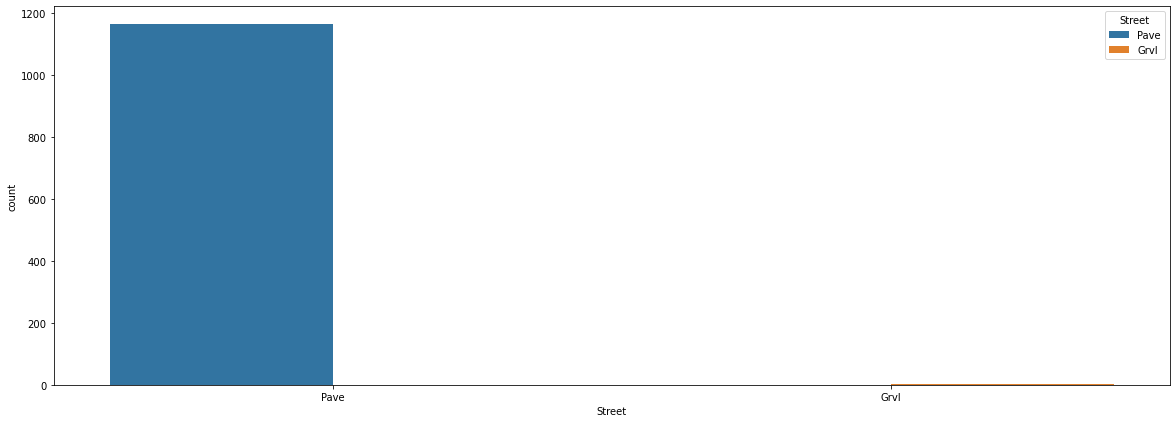

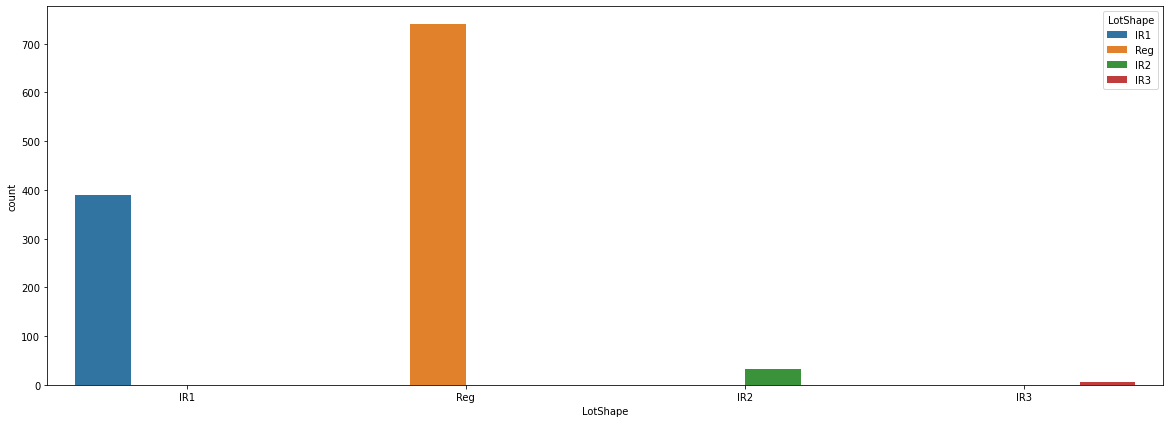

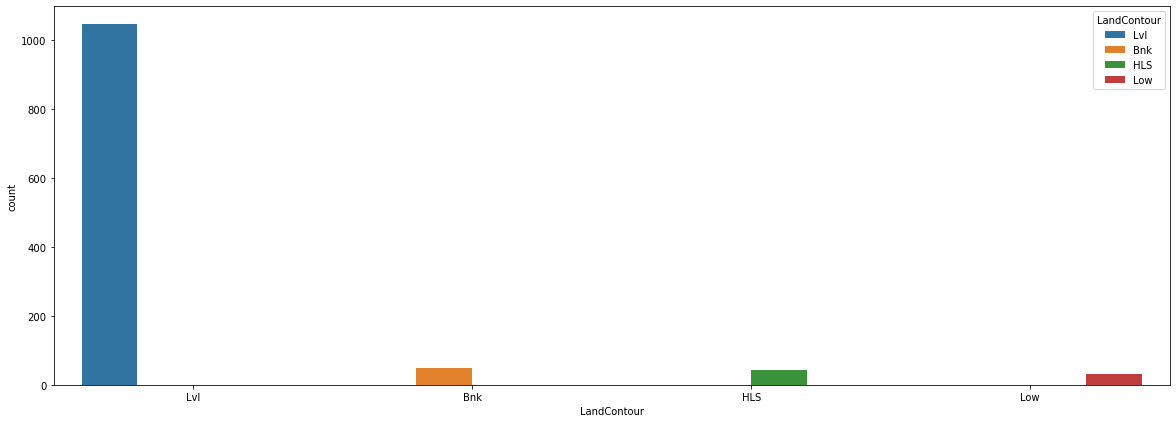

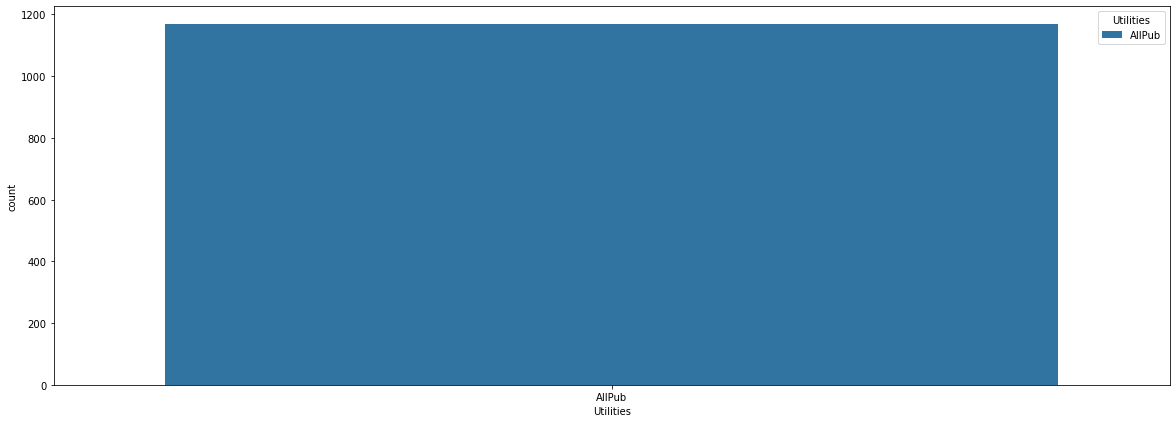

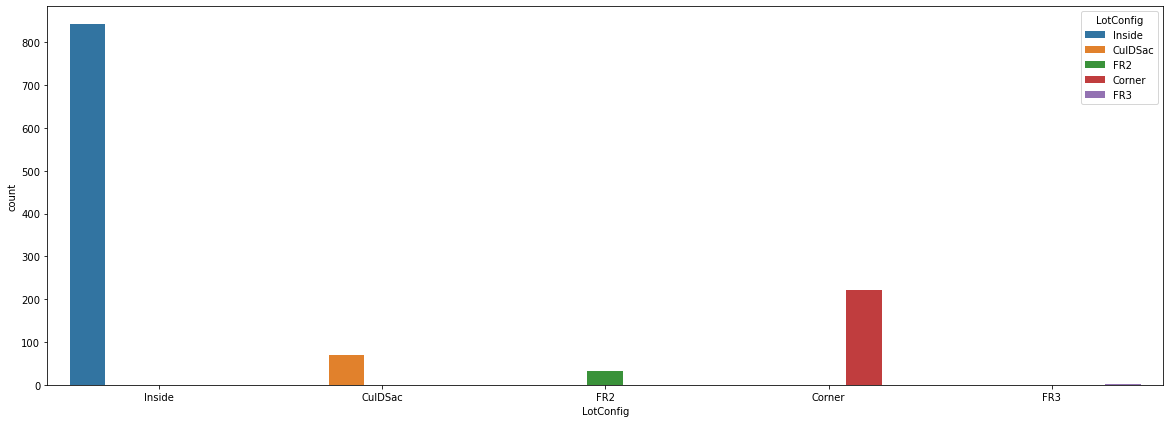

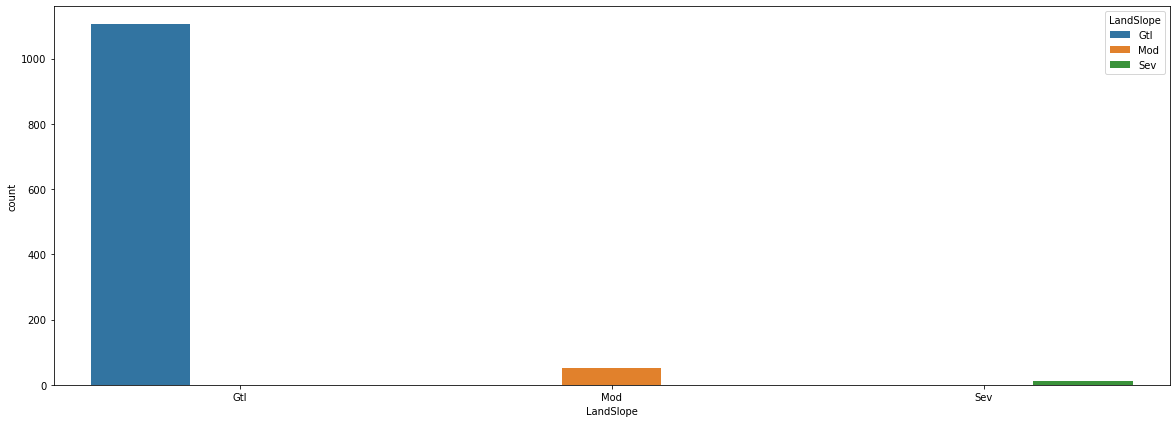

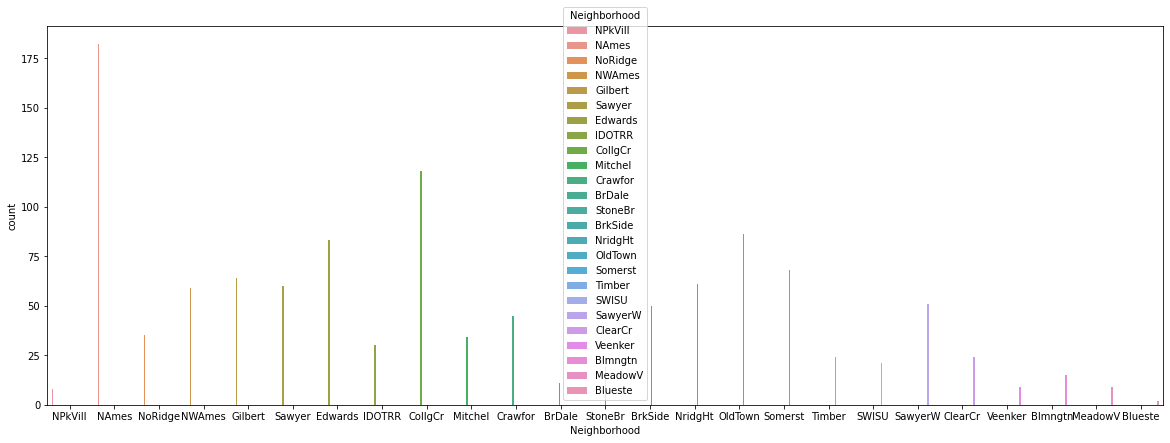

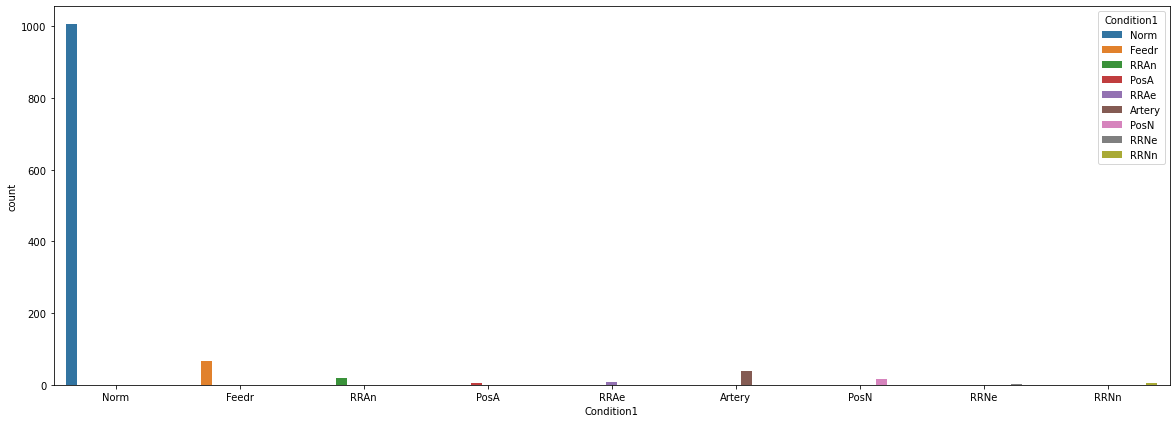

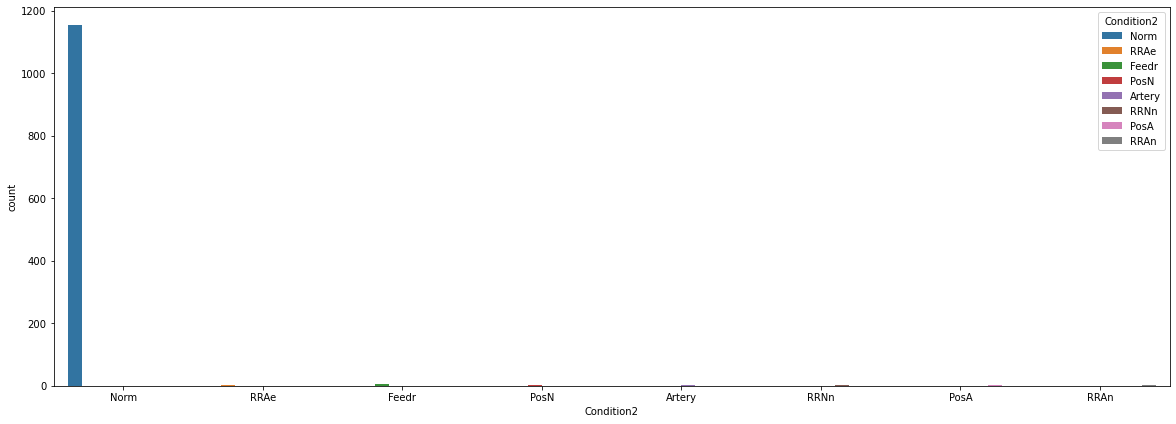

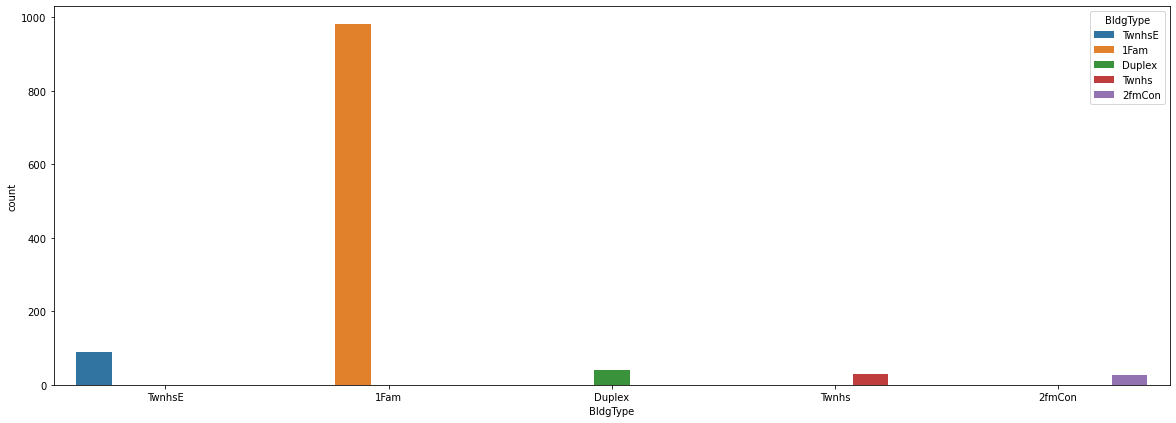

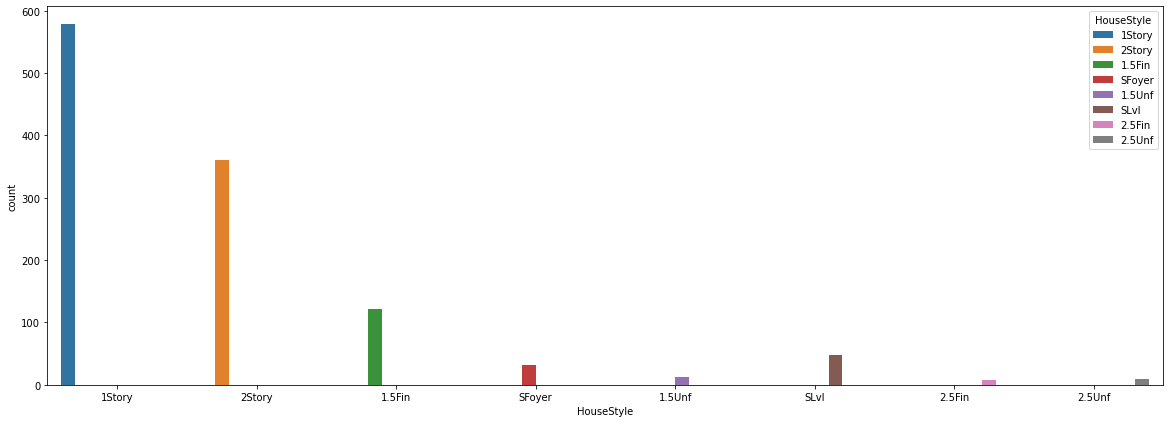

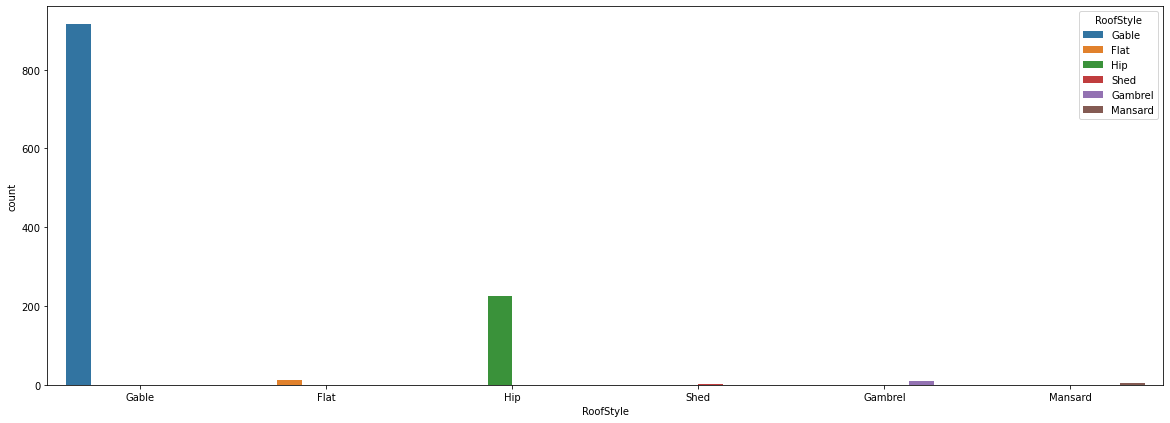

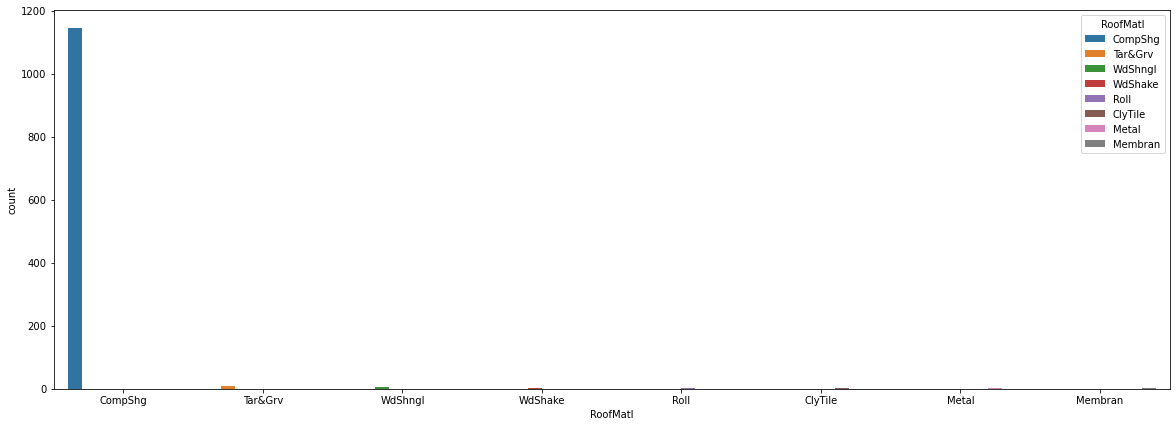

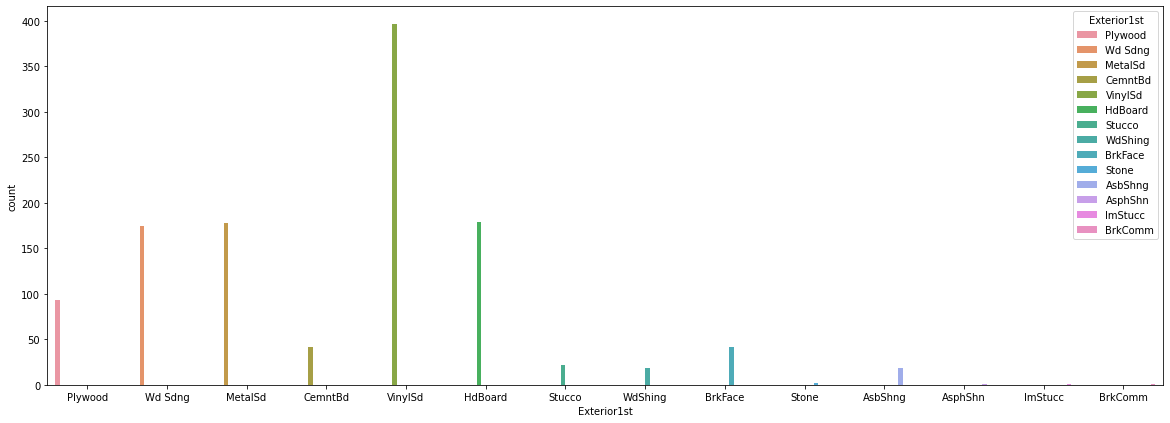

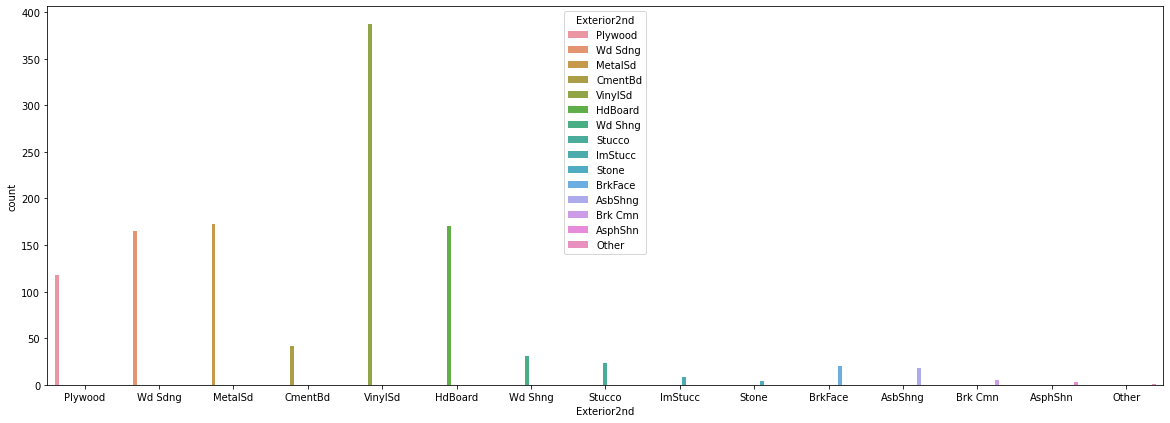

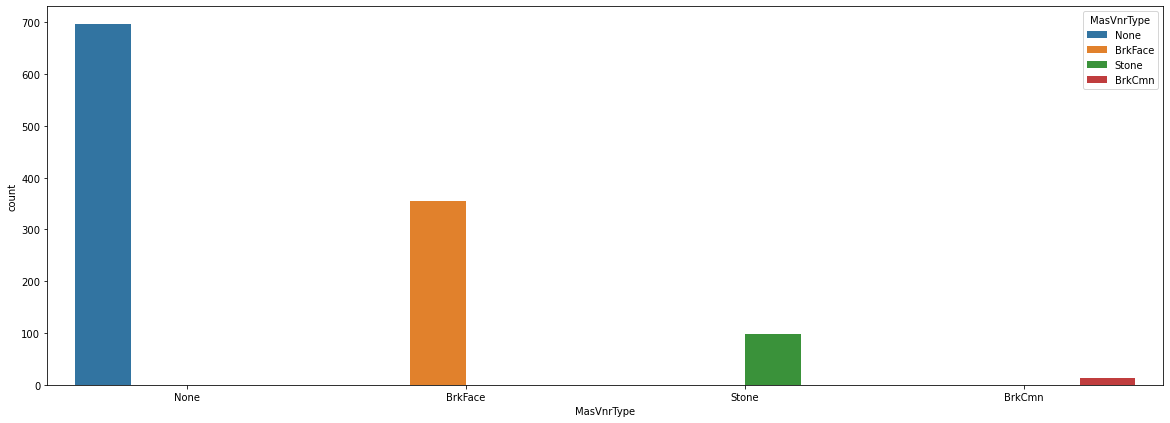

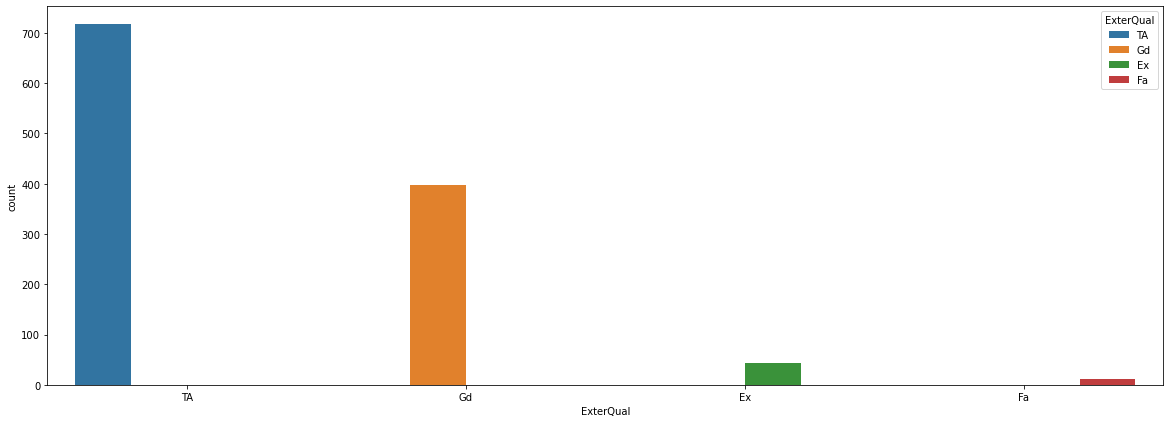

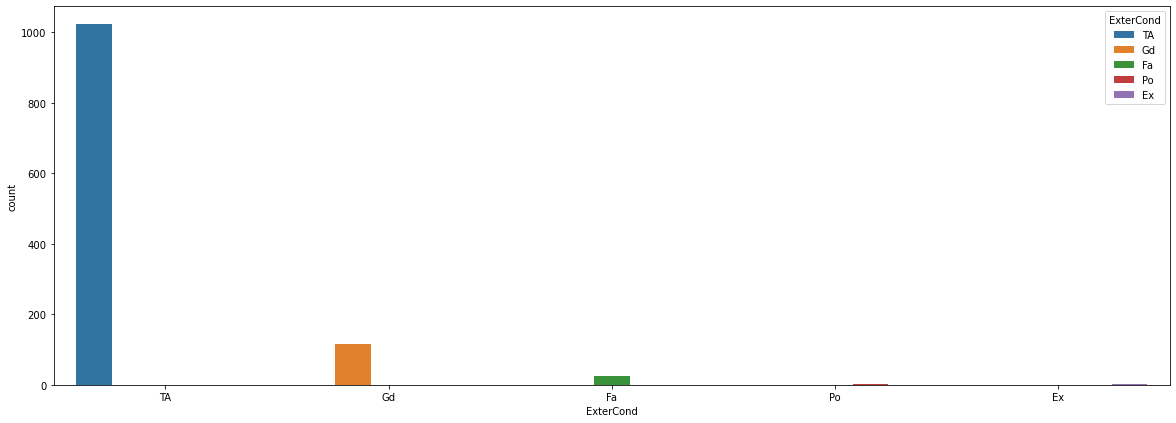

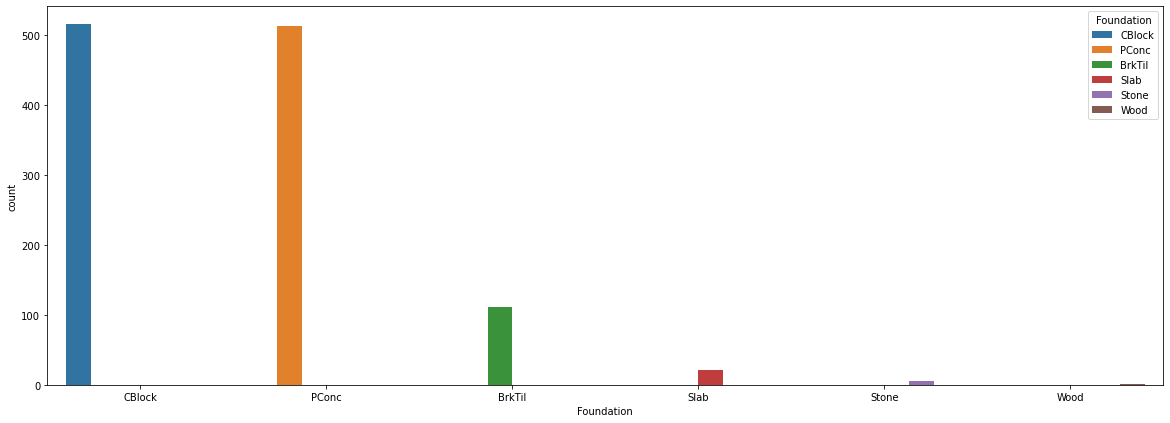

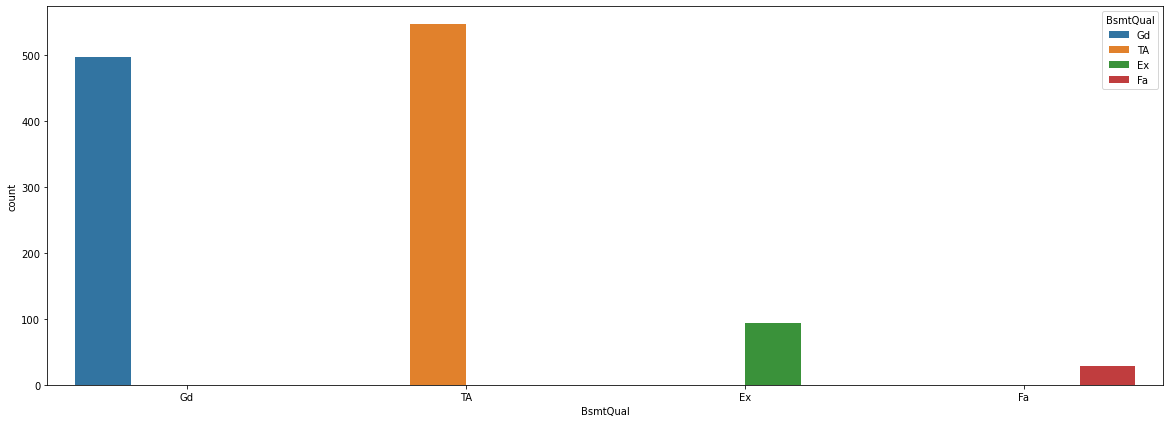

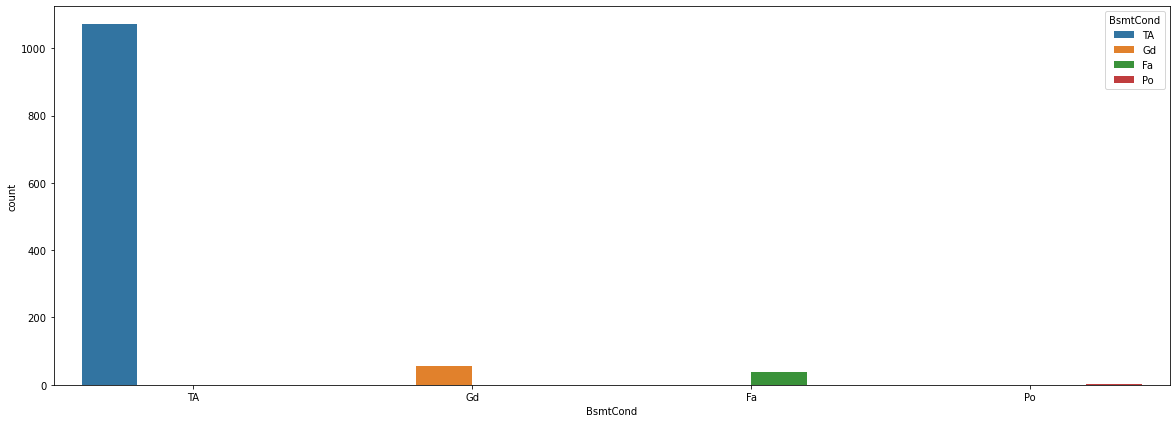

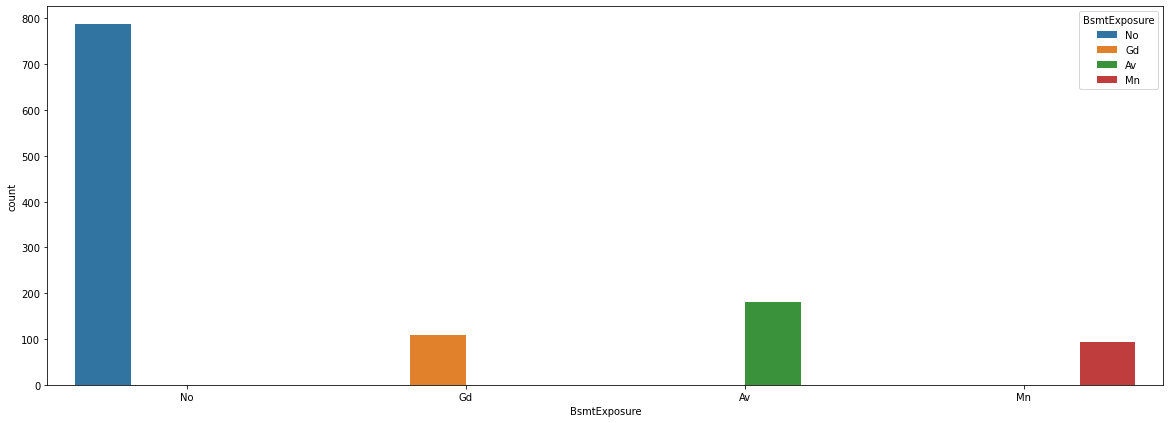

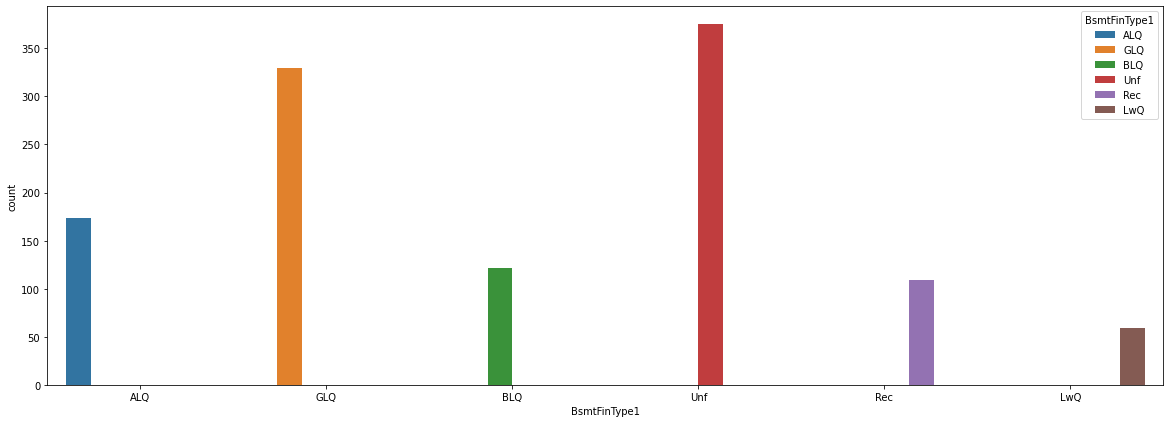

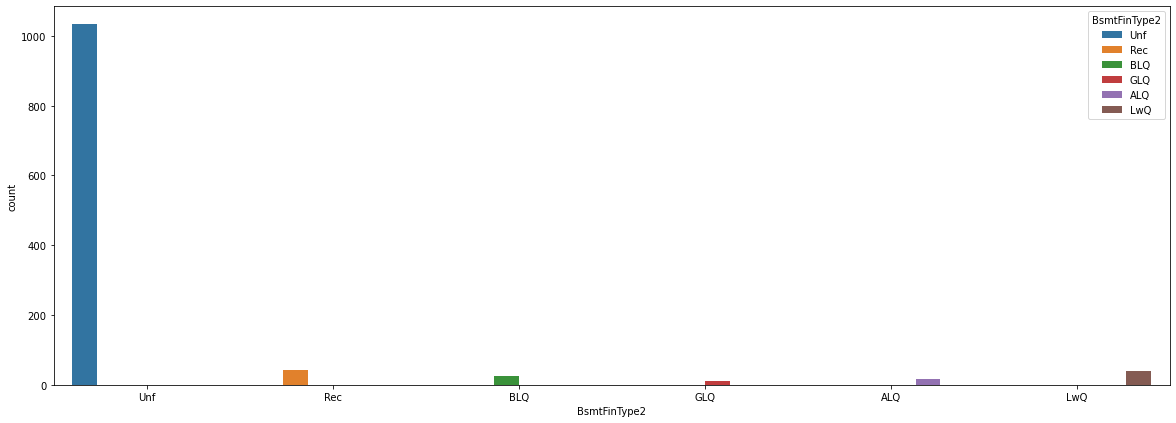

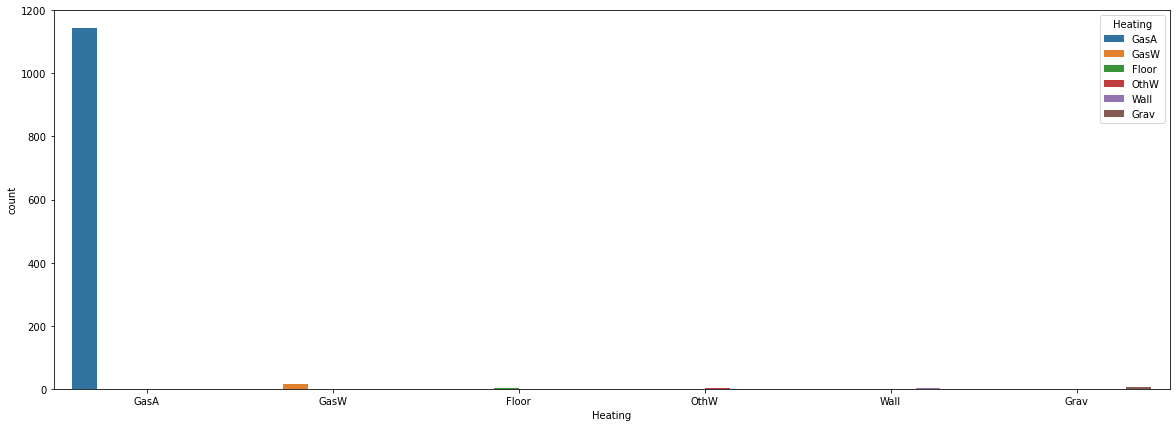

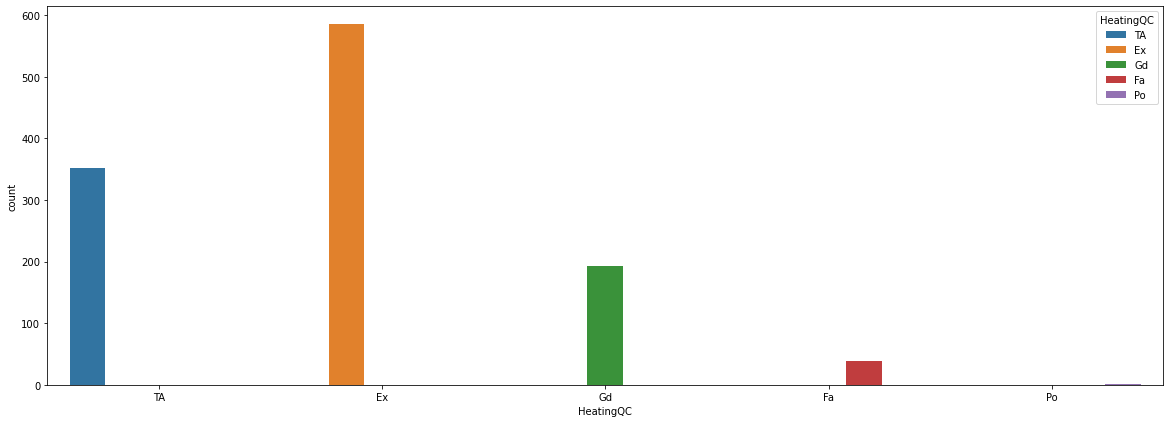

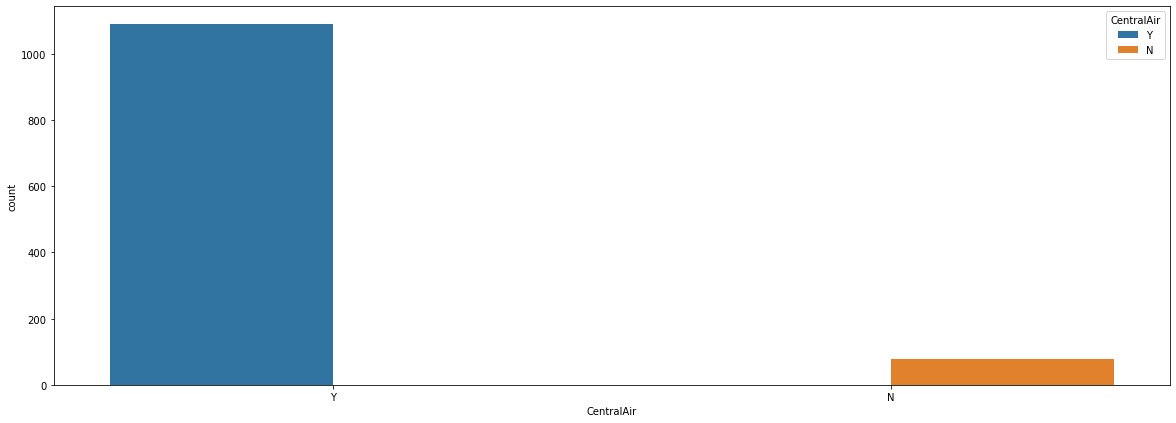

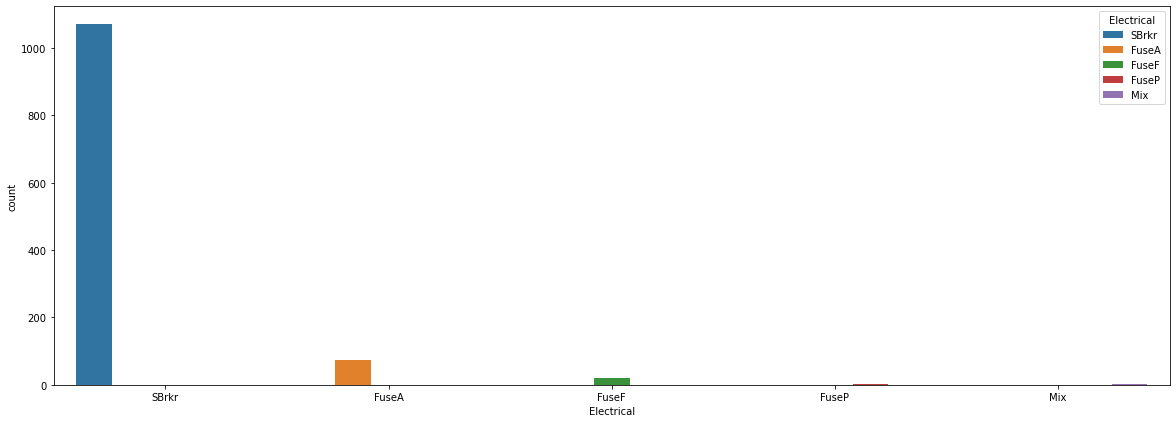

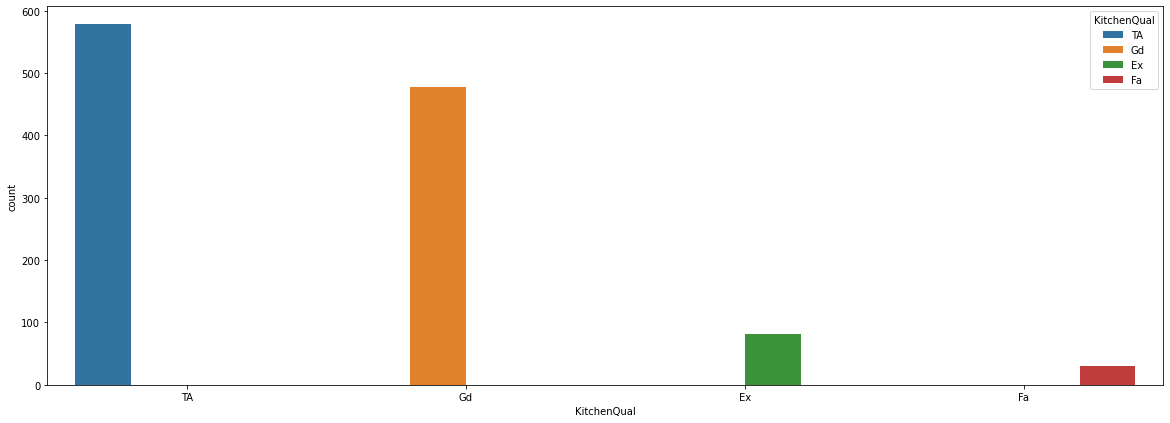

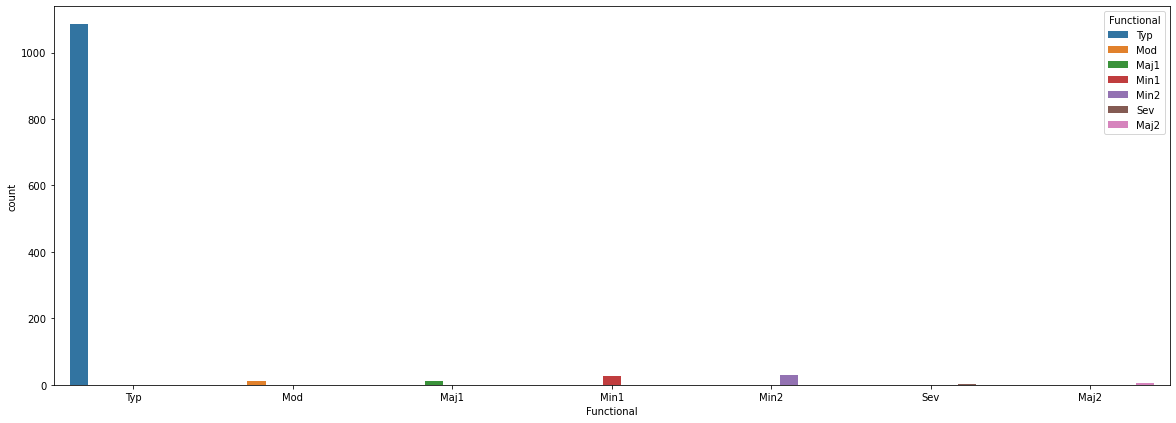

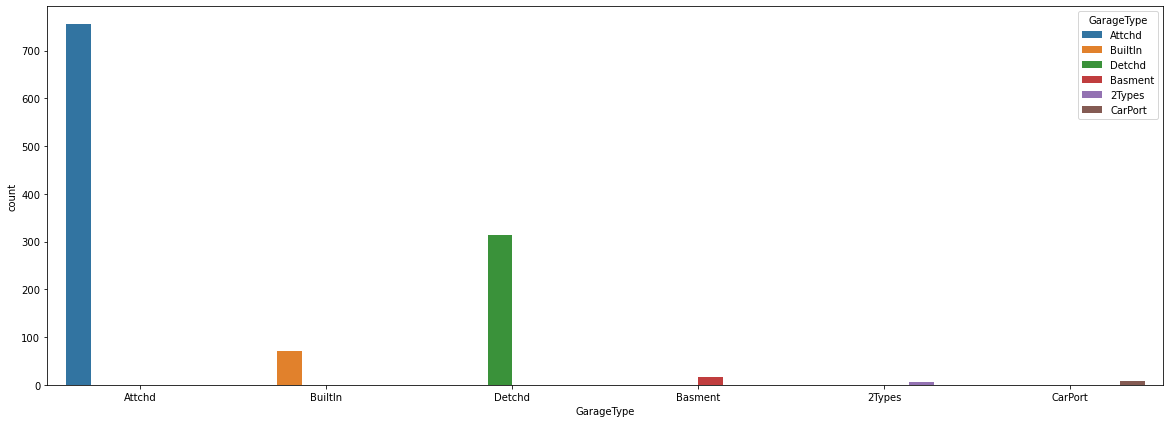

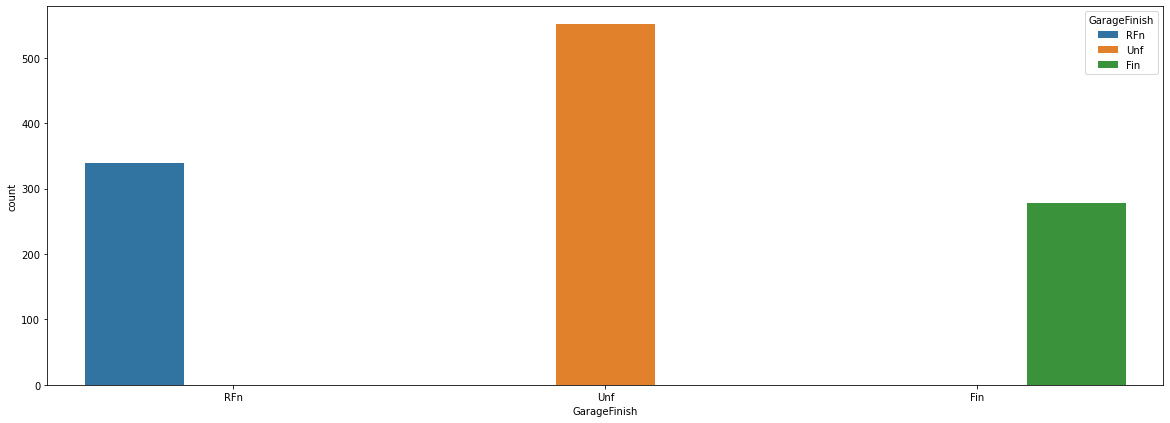

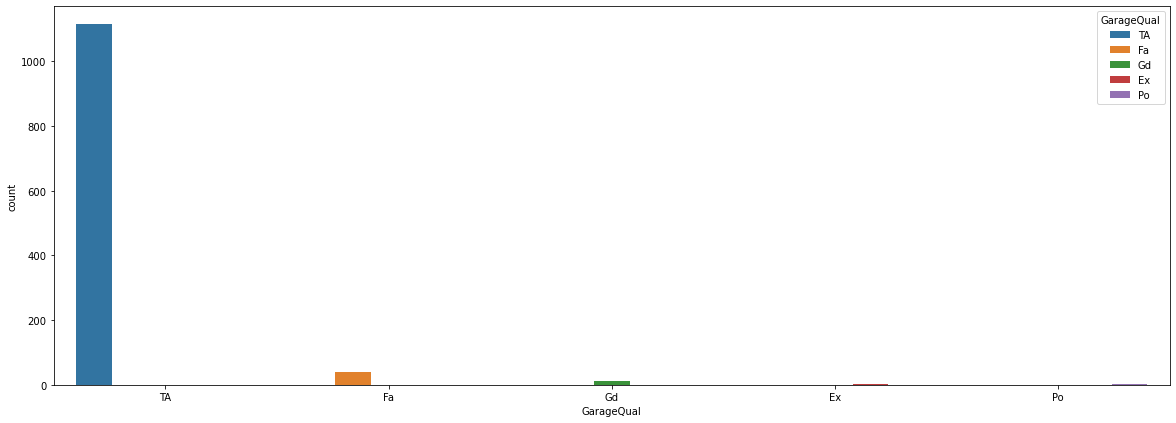

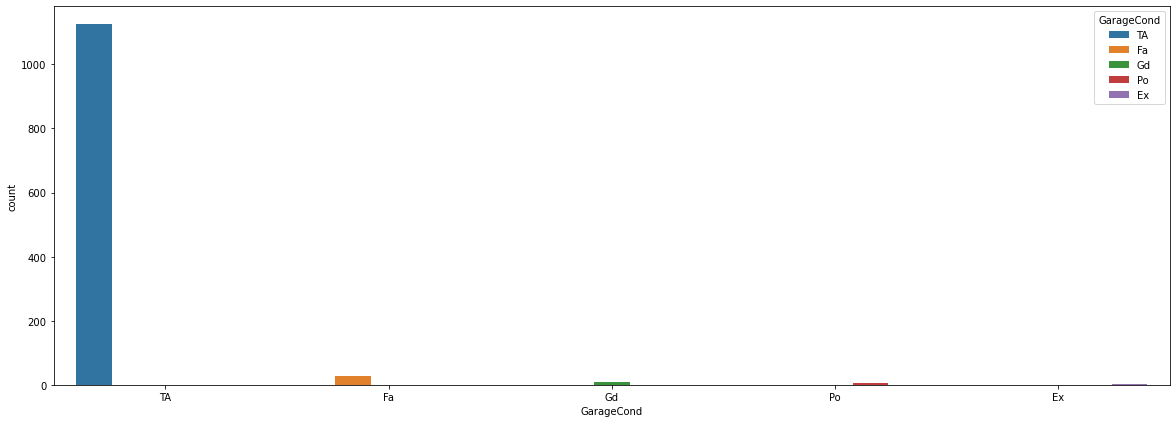

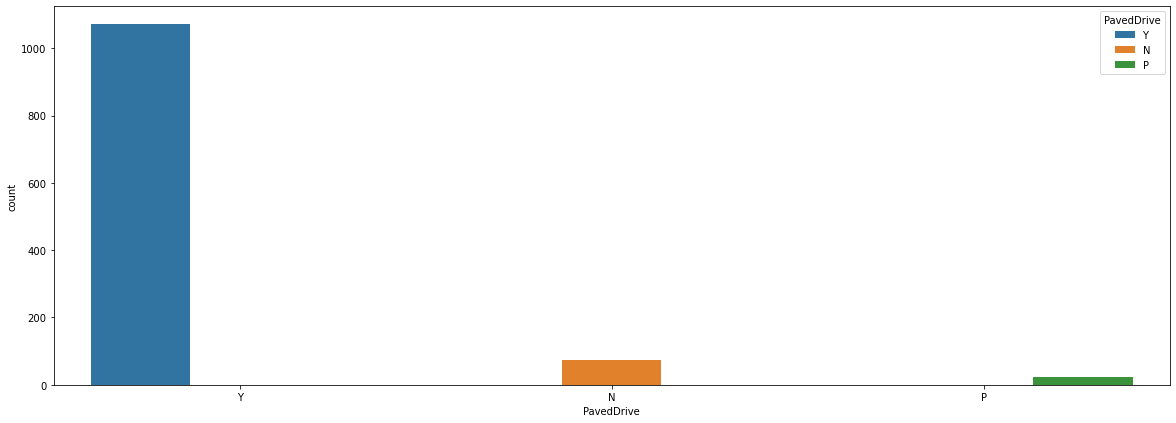

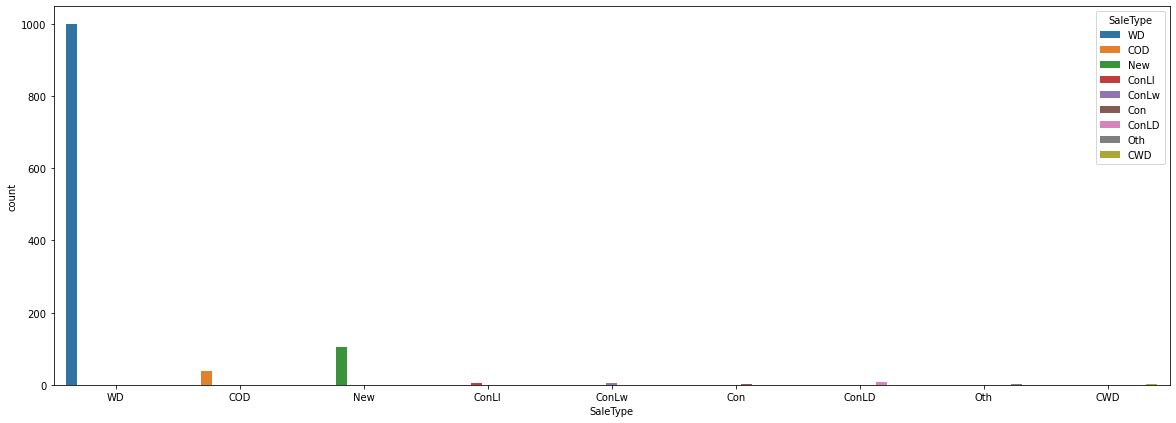

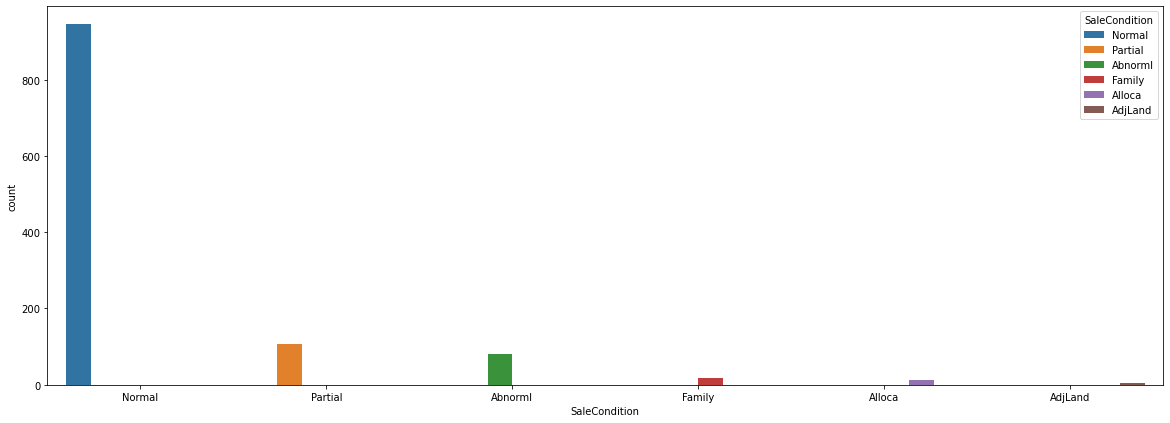

In [18]:
counter=1;
for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.countplot(x=column,hue=column,data=df)
        plt.show()

In [19]:
df['Street'].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [20]:
df['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [21]:
df['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [22]:
df['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

In [23]:
df['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

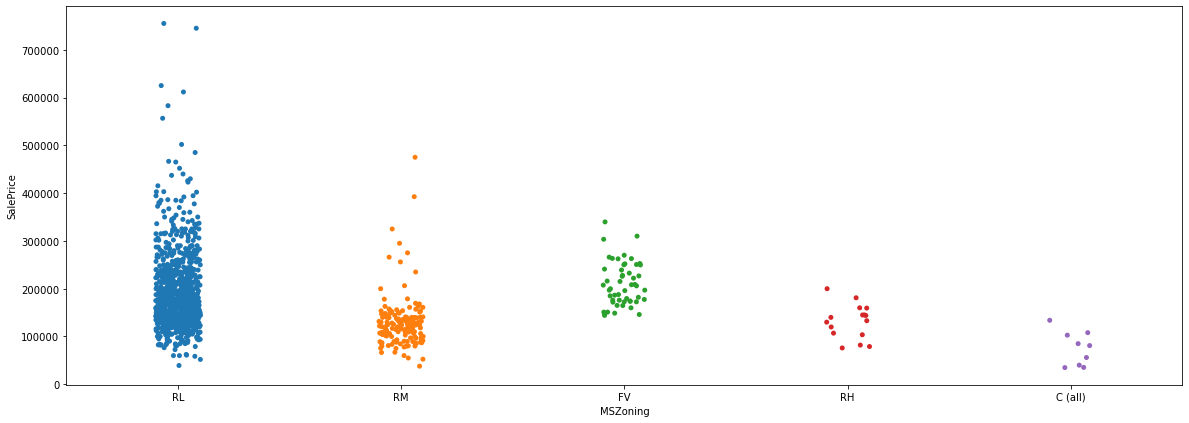

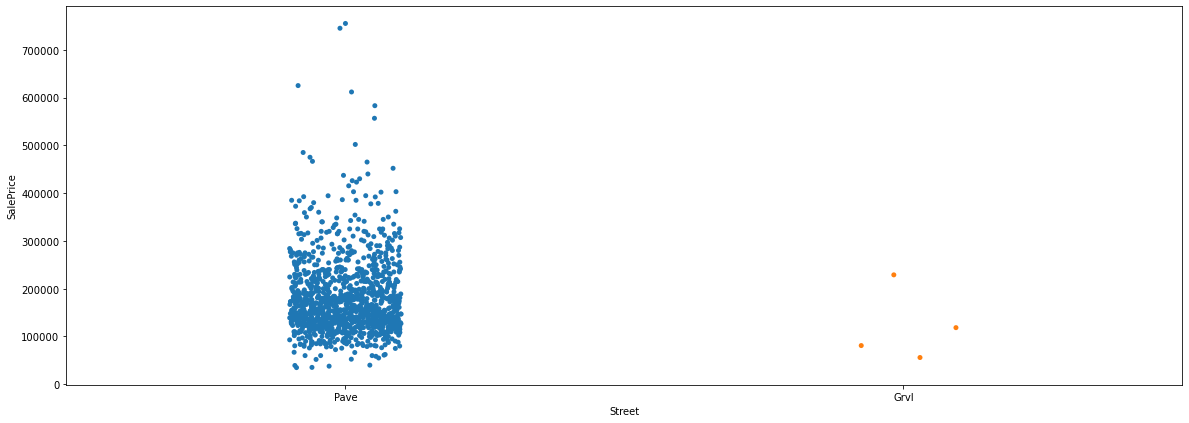

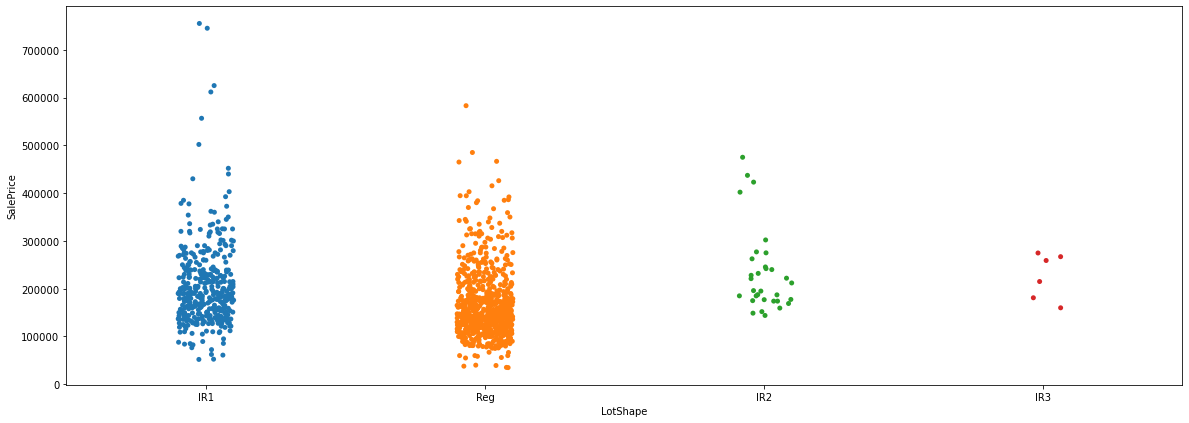

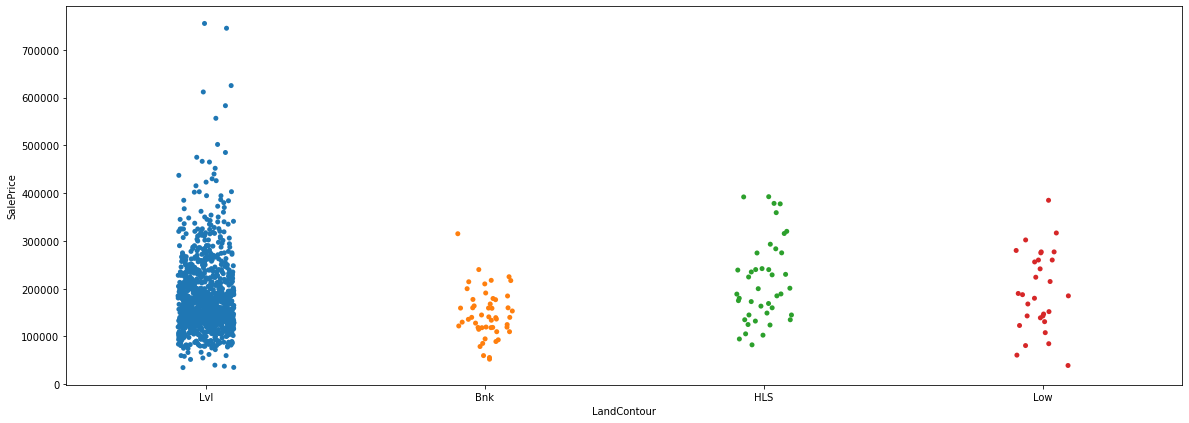

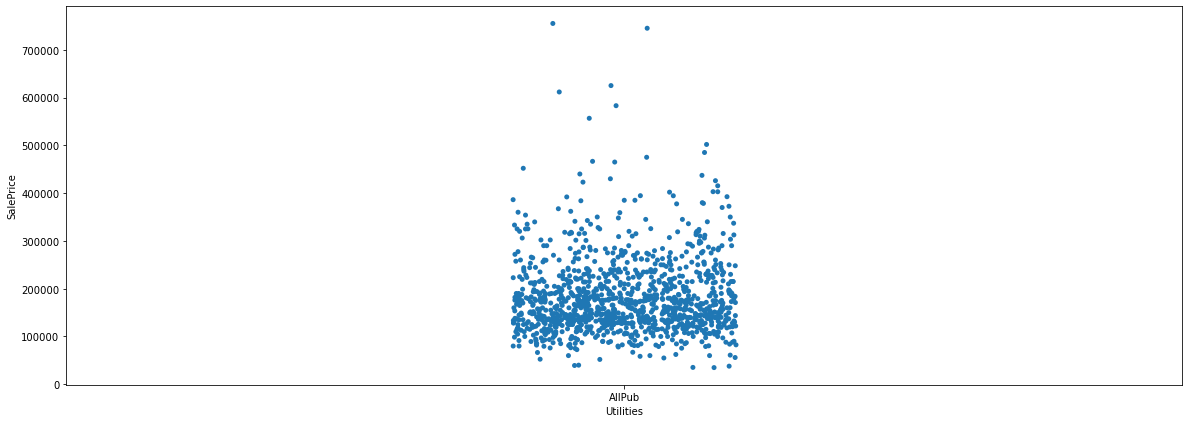

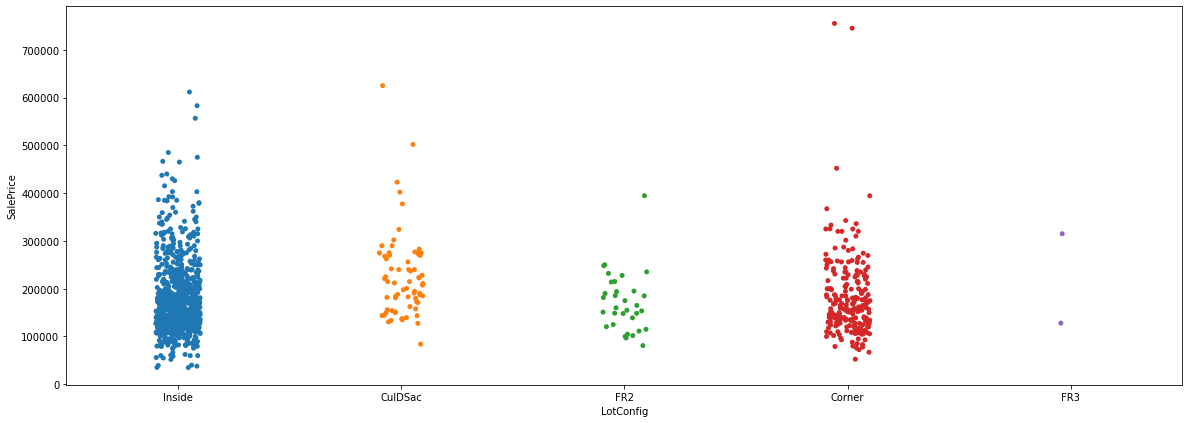

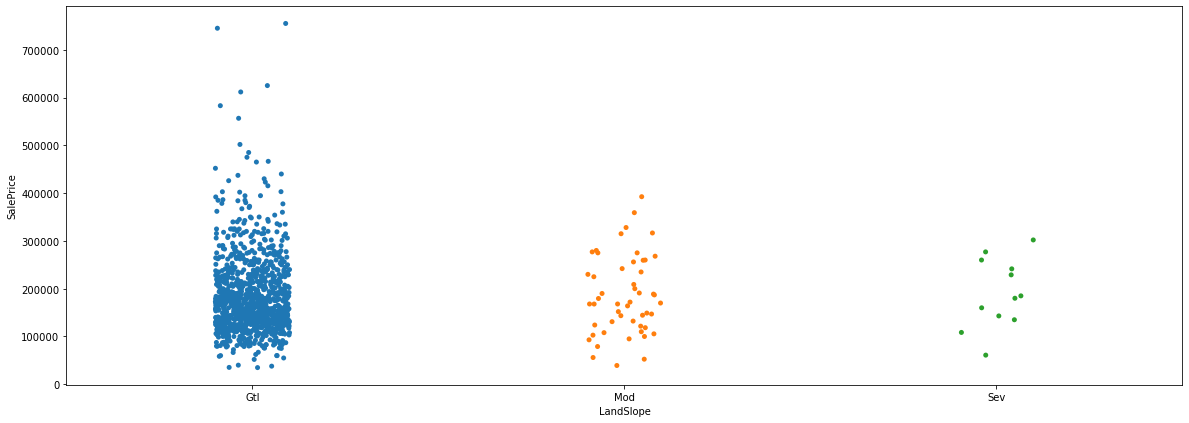

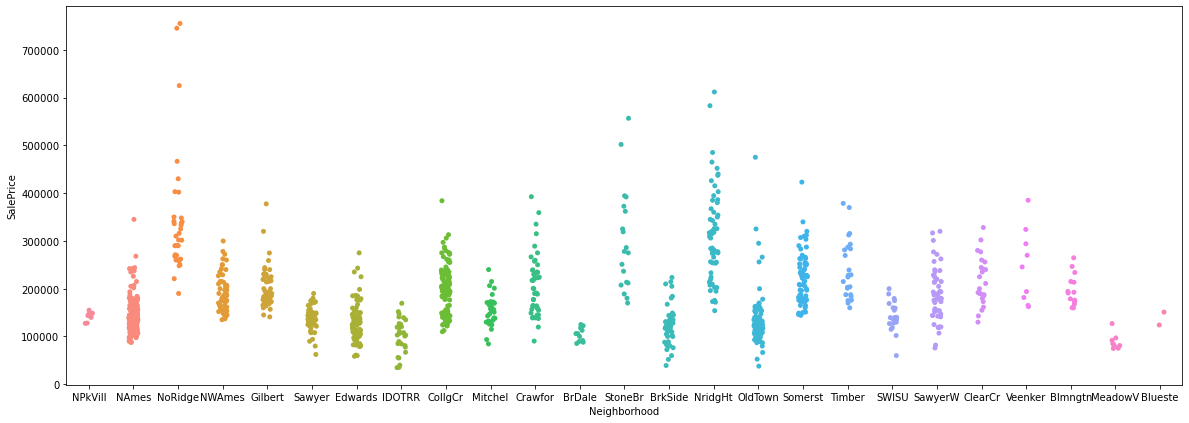

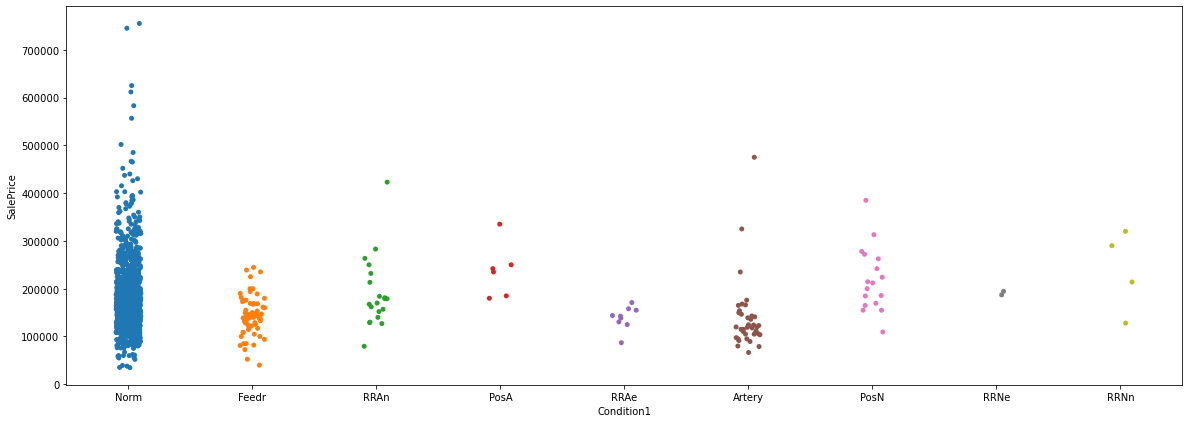

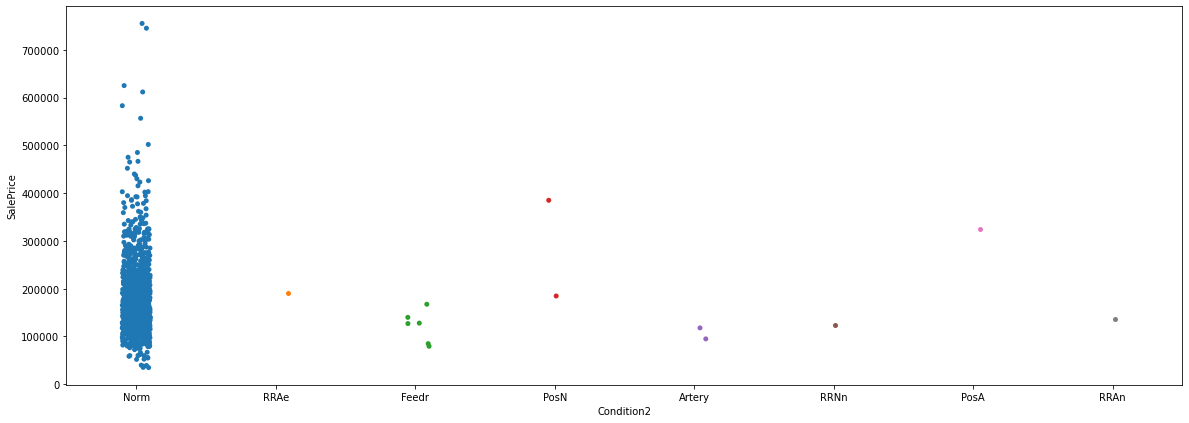

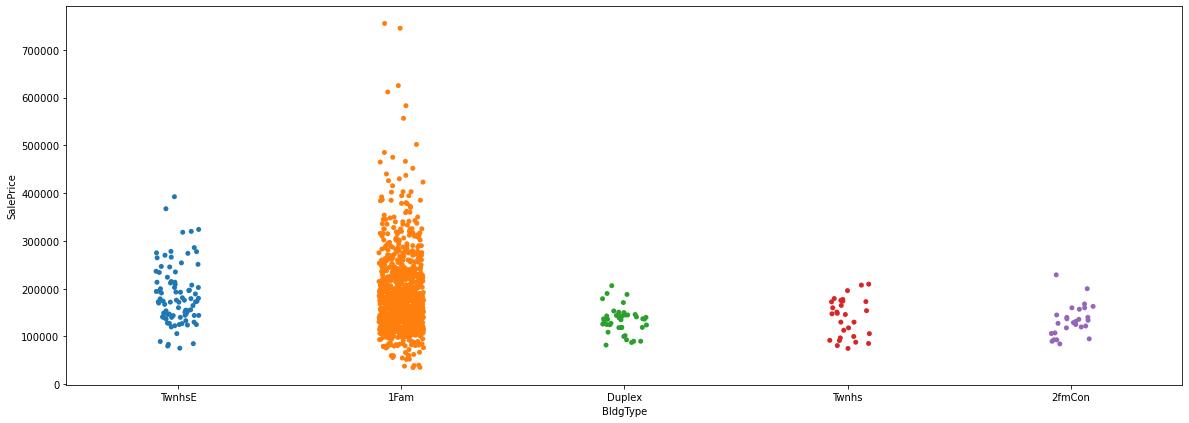

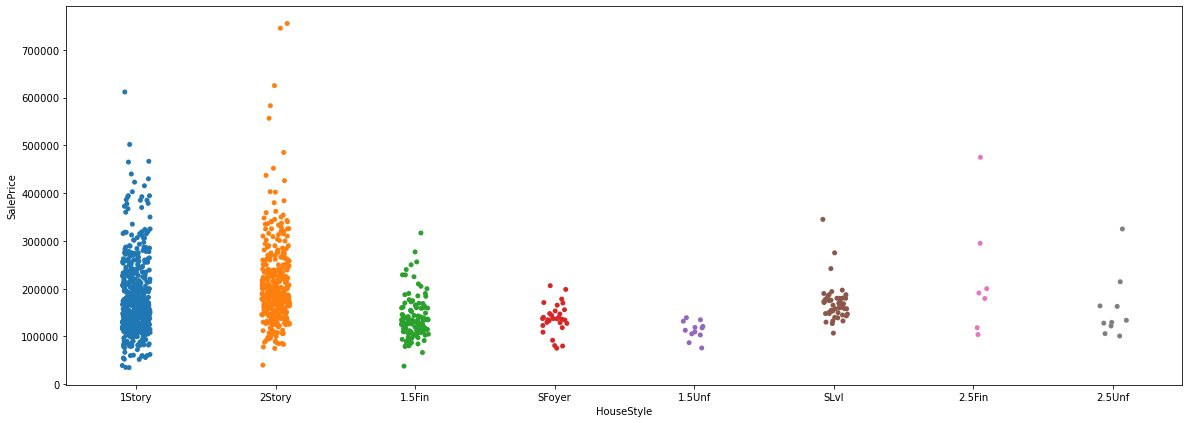

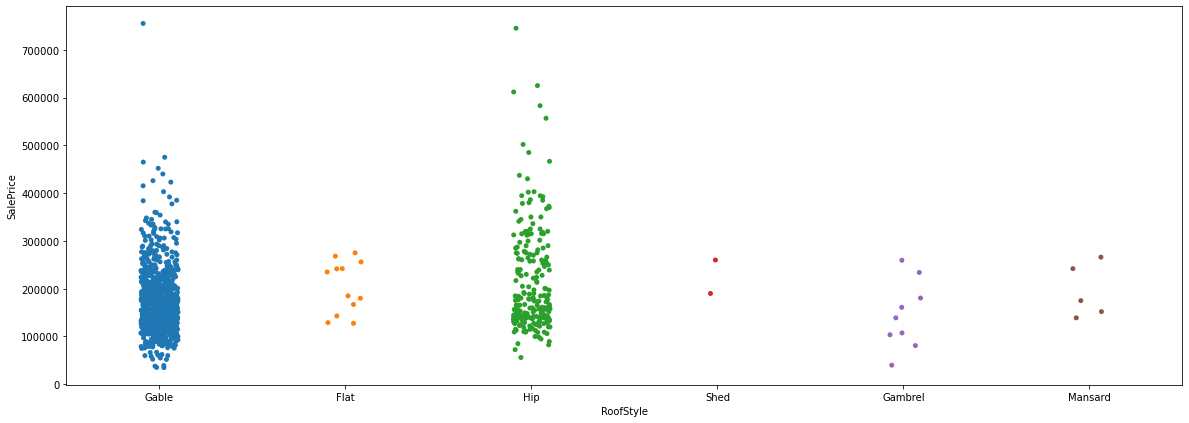

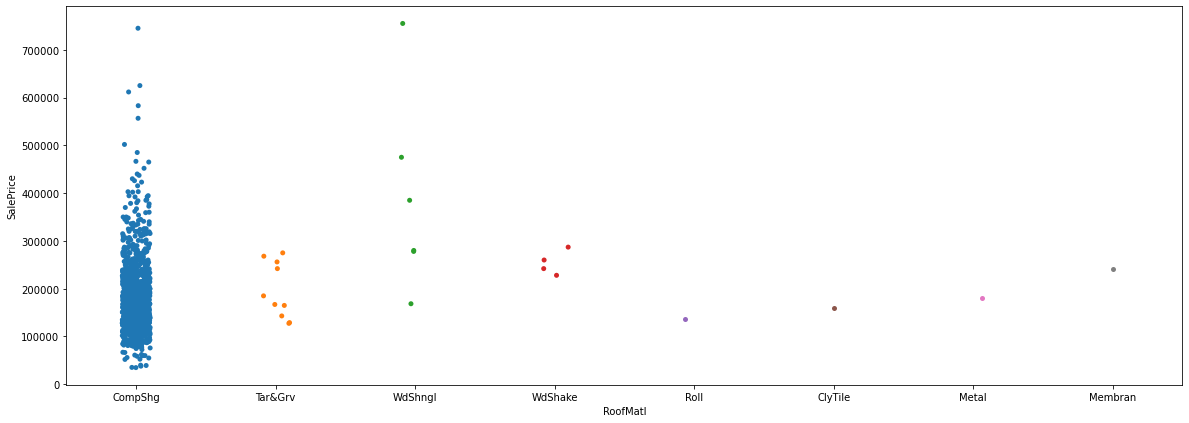

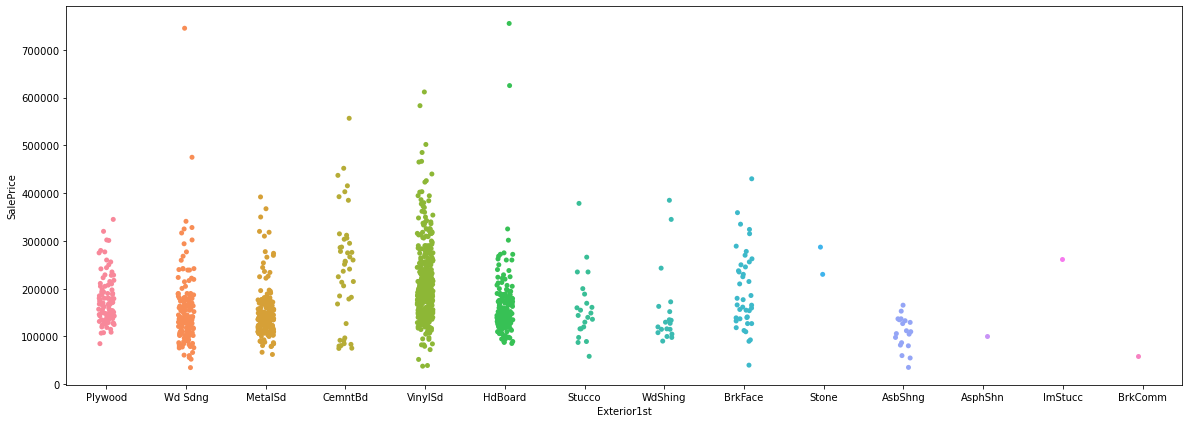

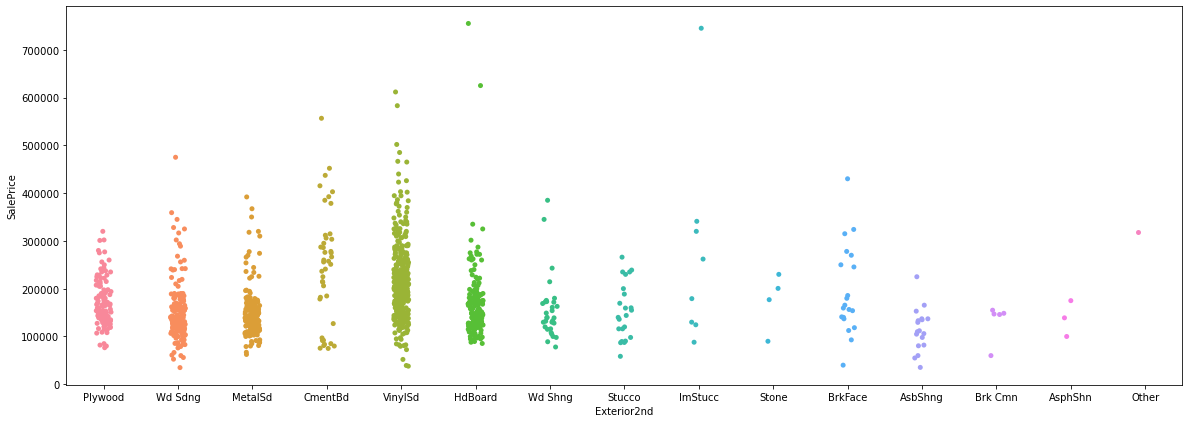

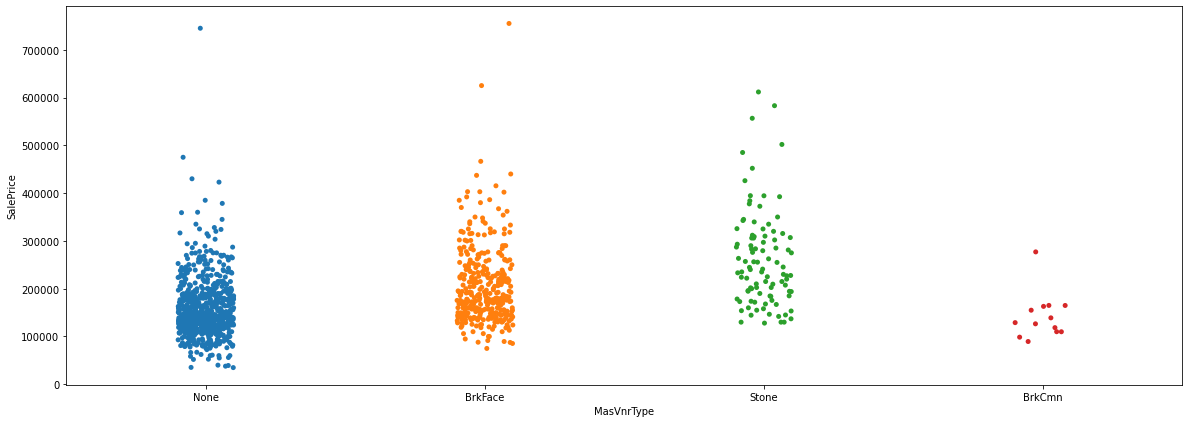

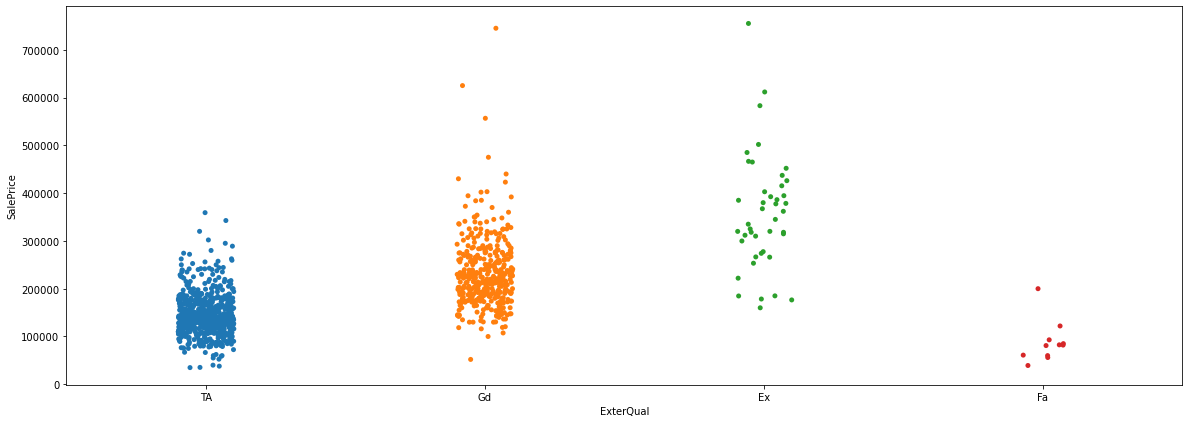

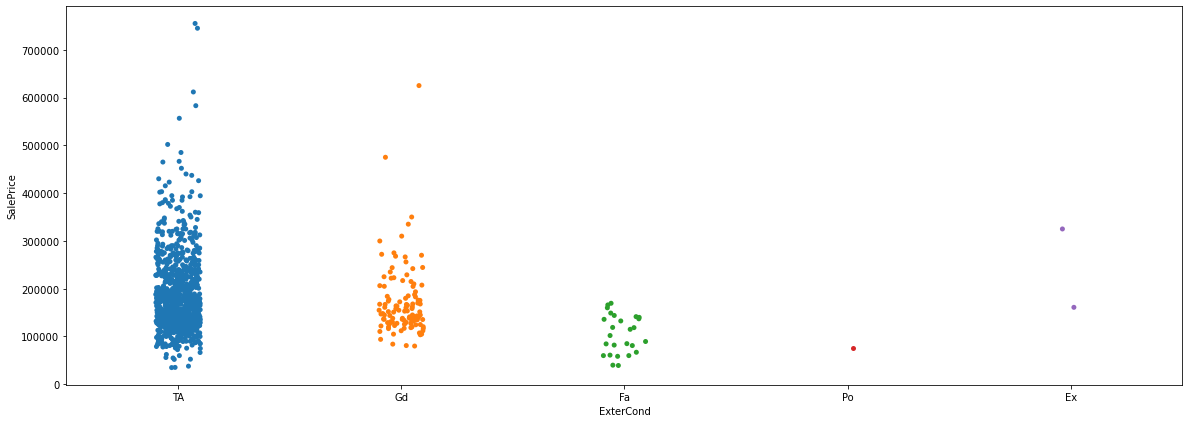

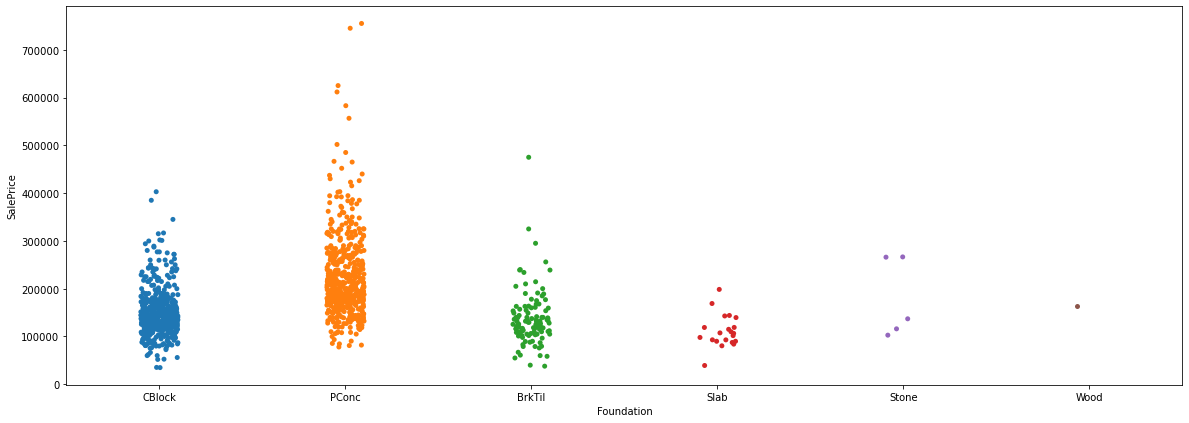

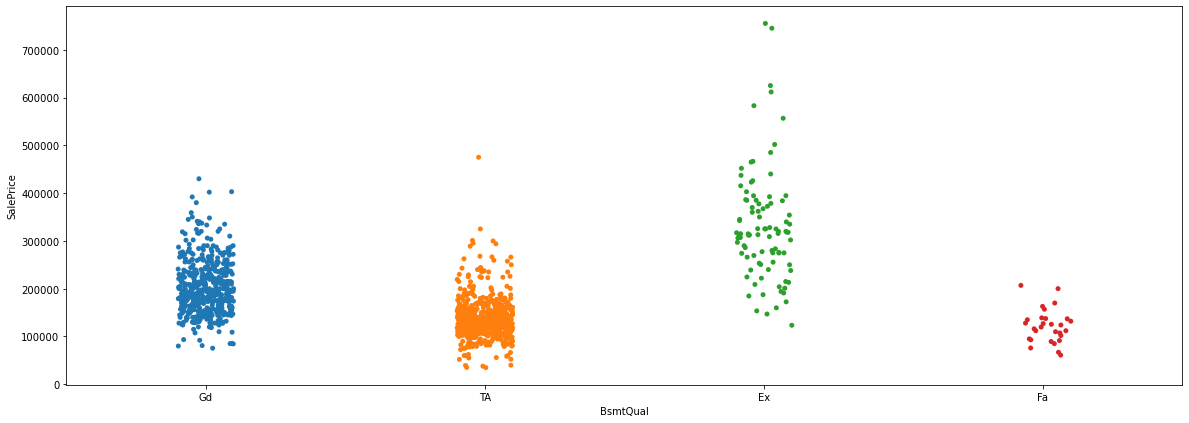

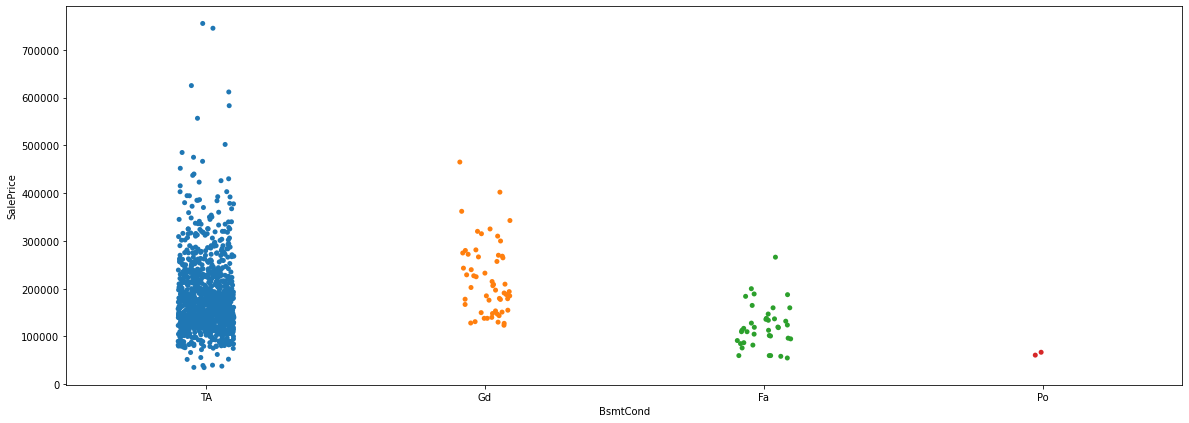

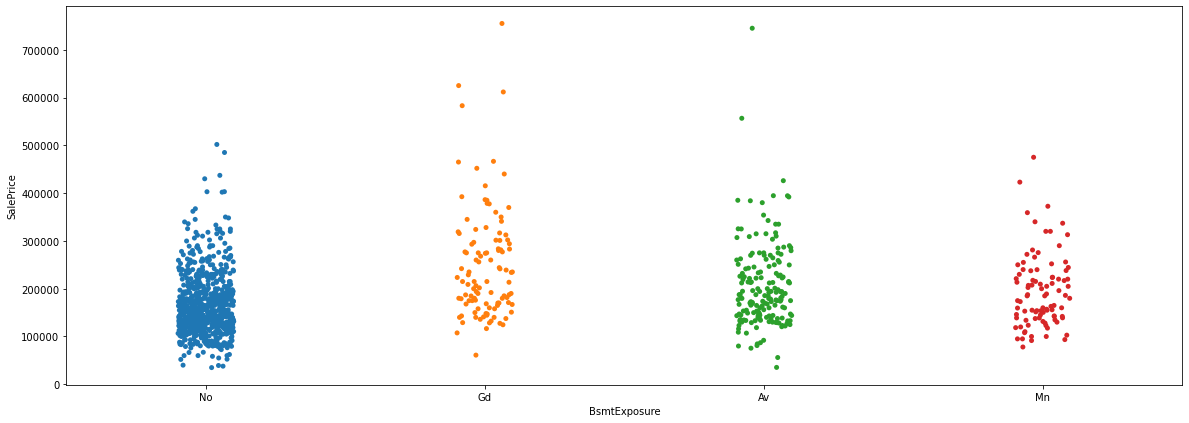

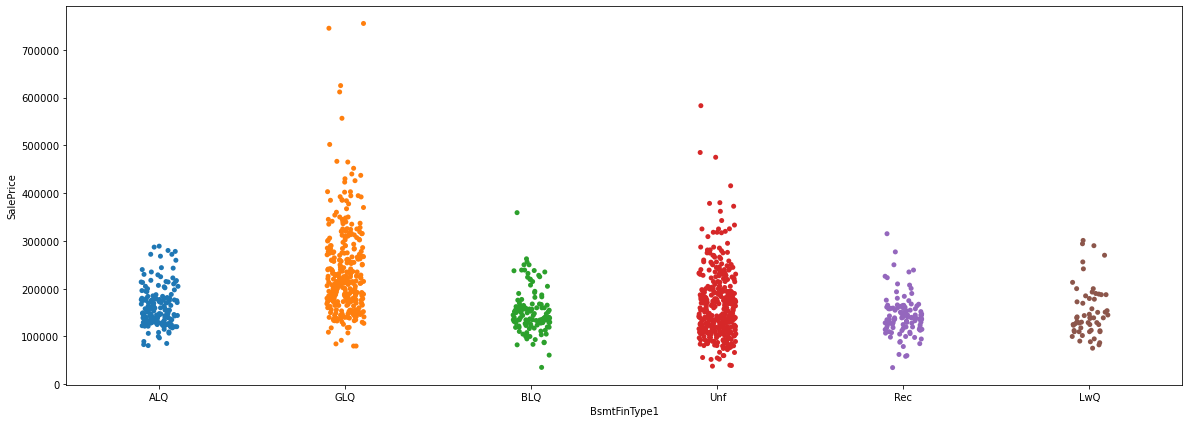

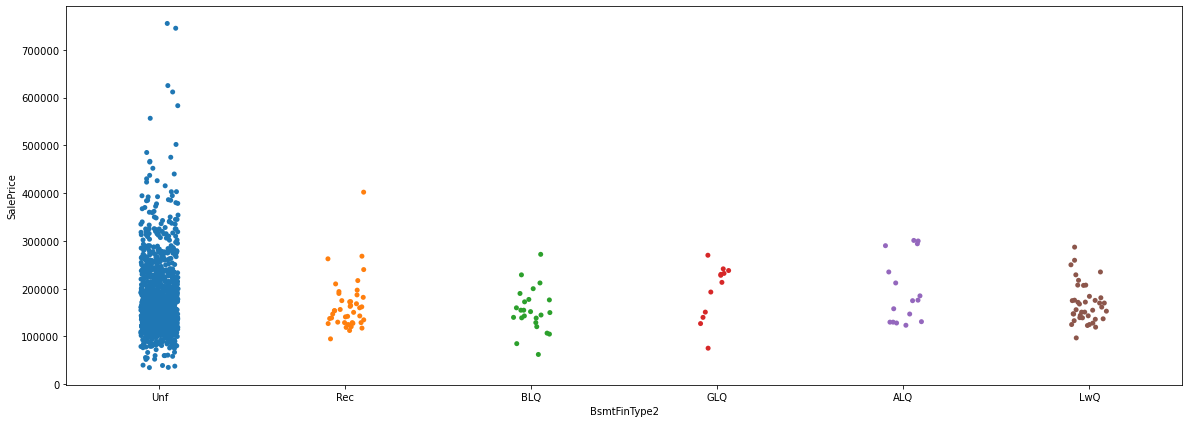

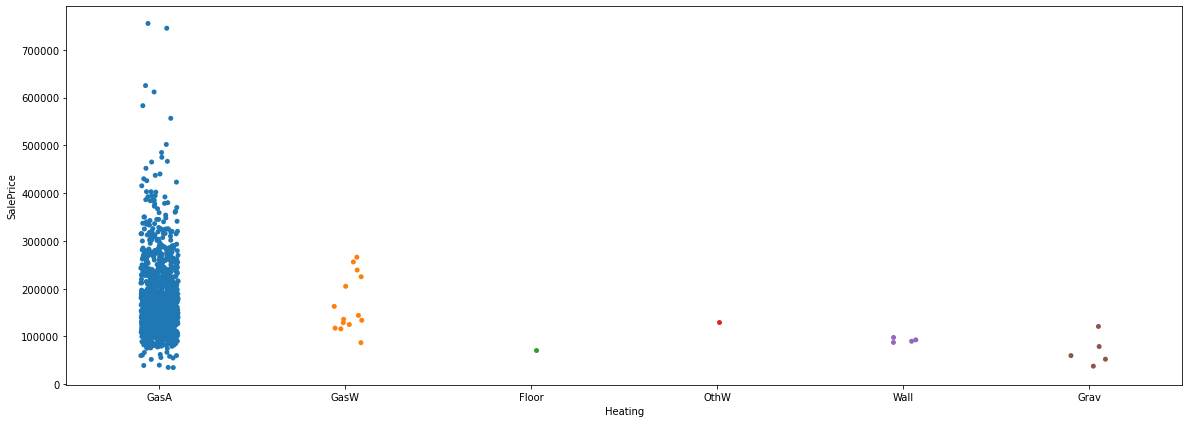

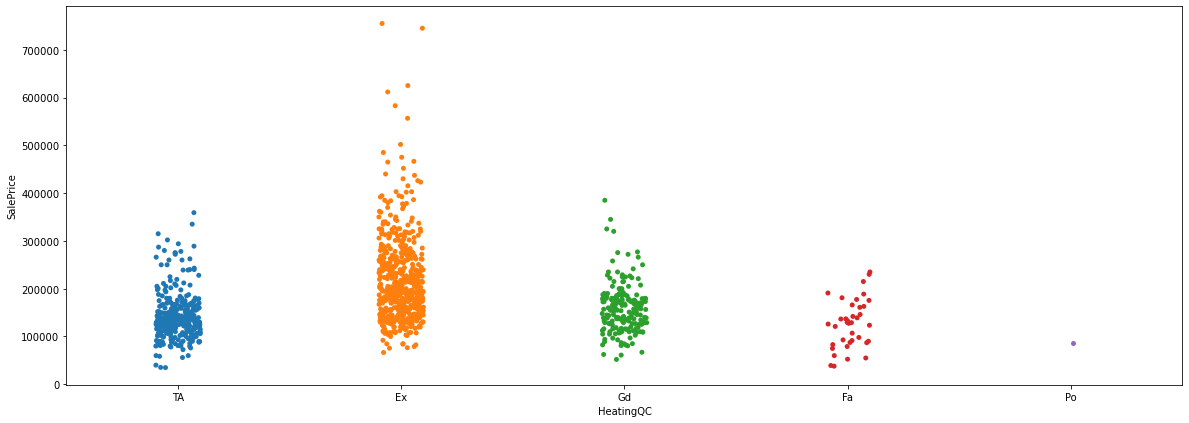

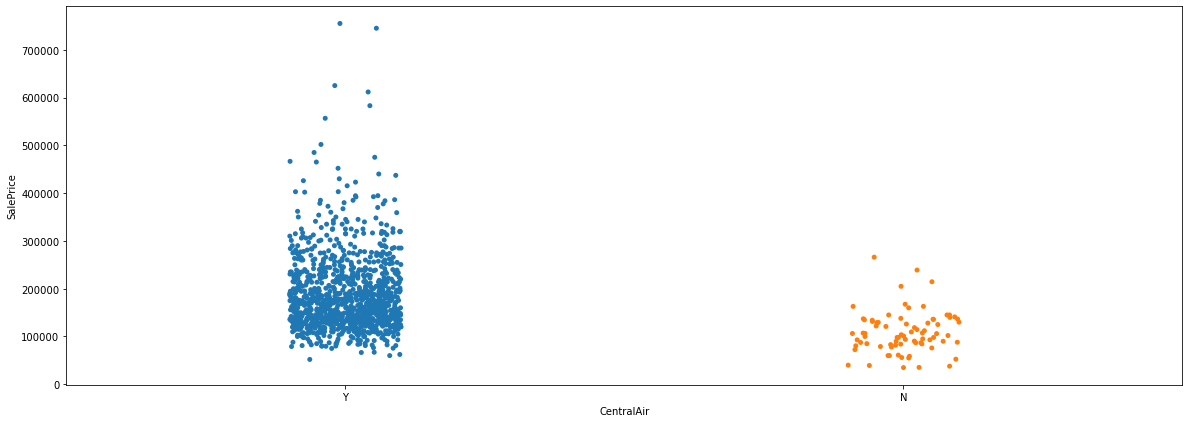

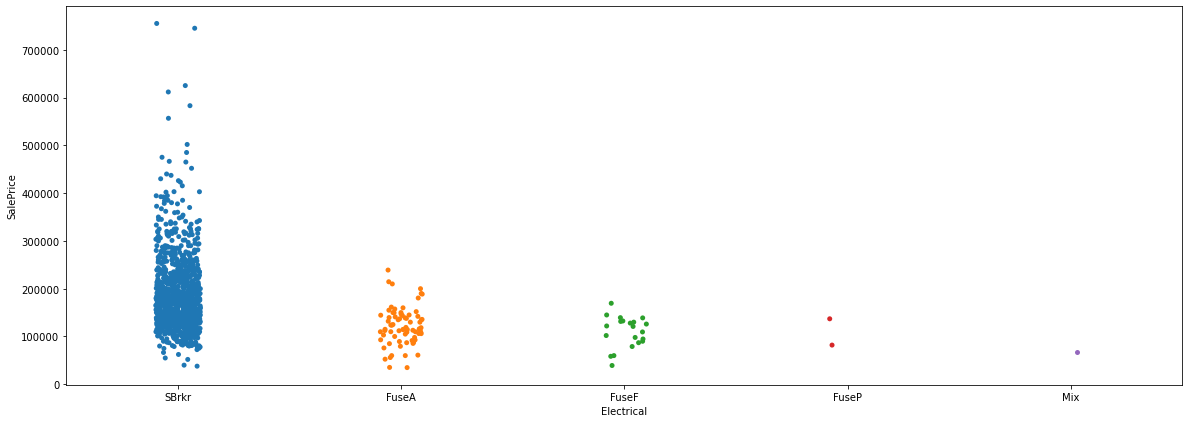

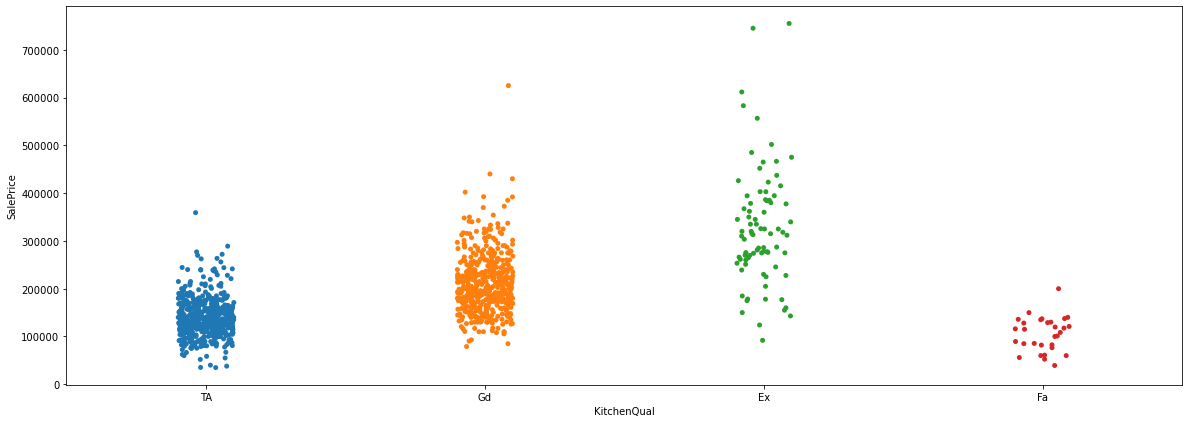

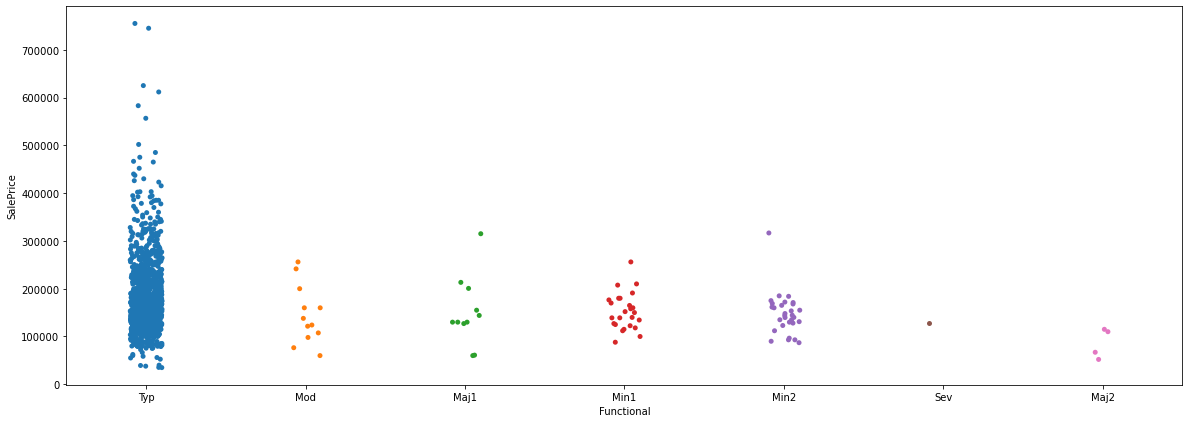

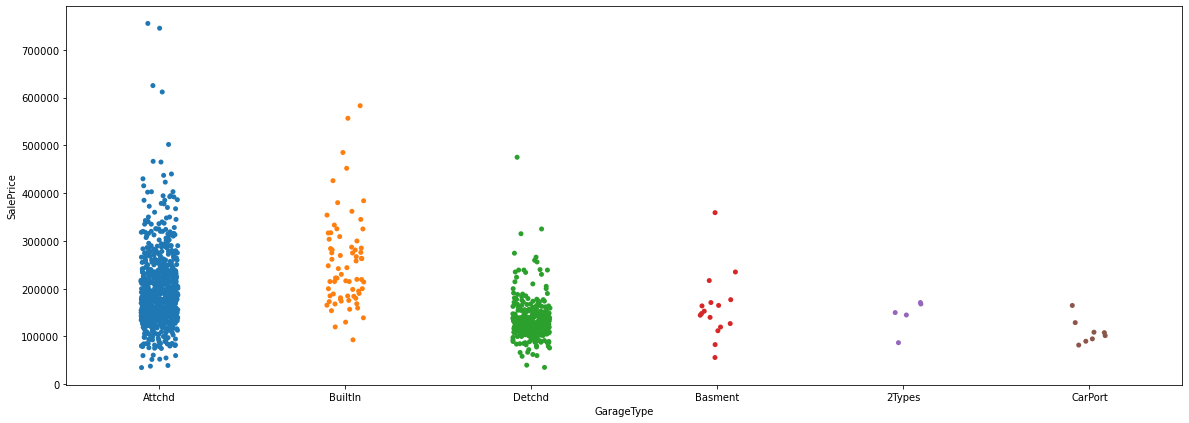

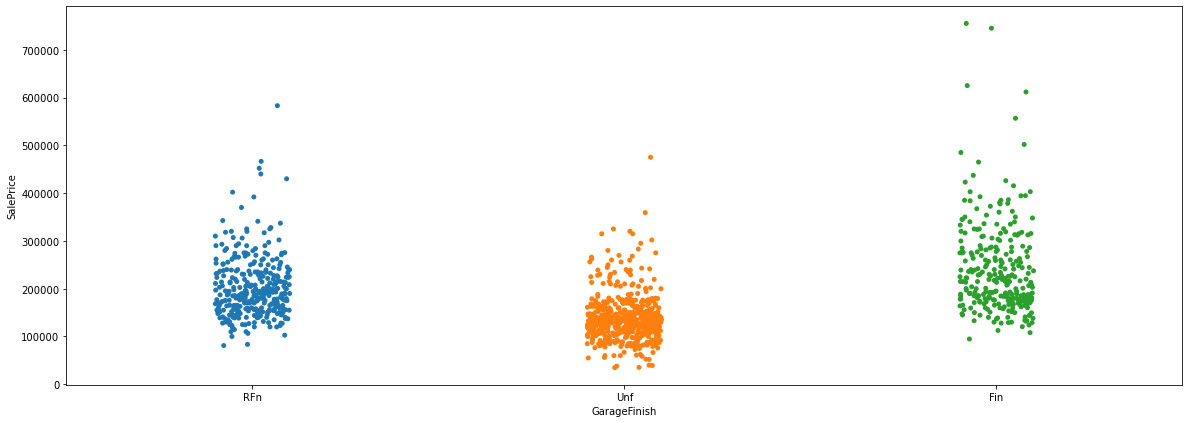

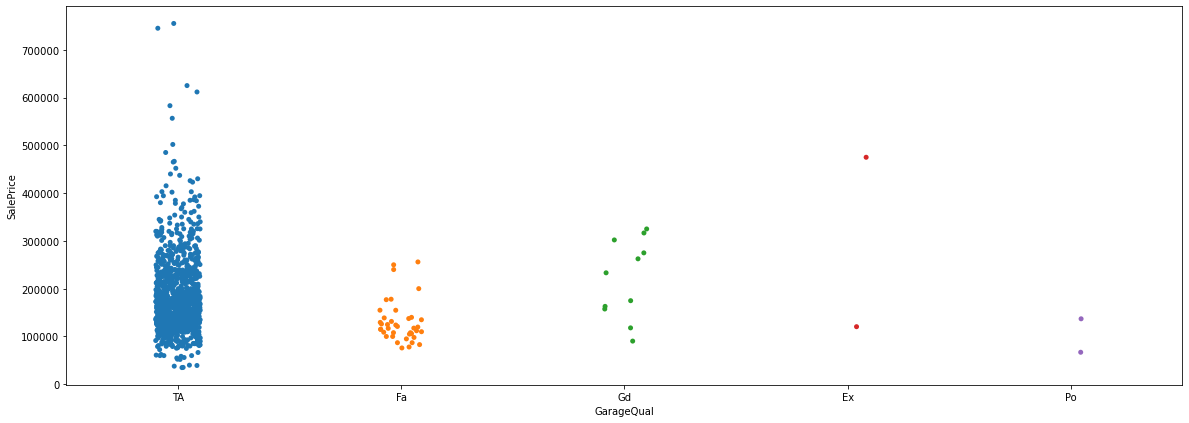

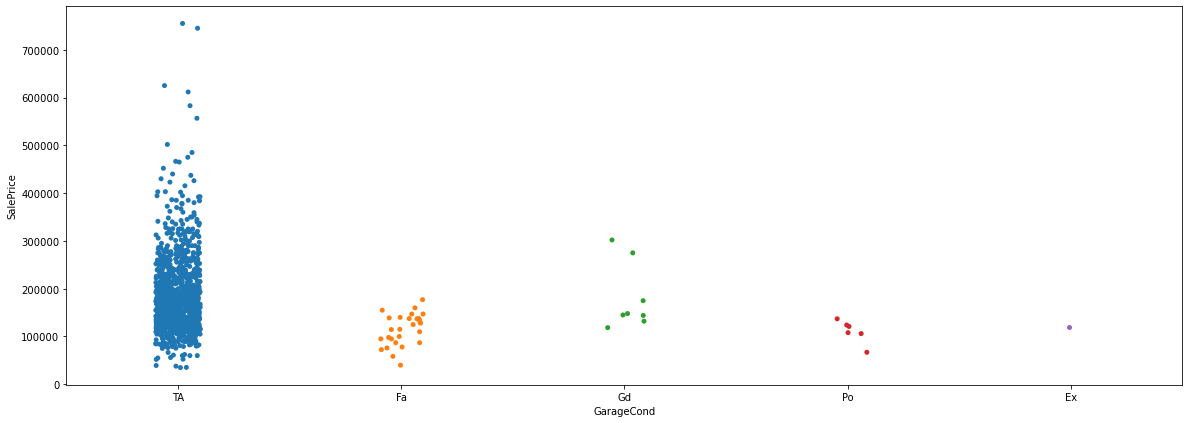

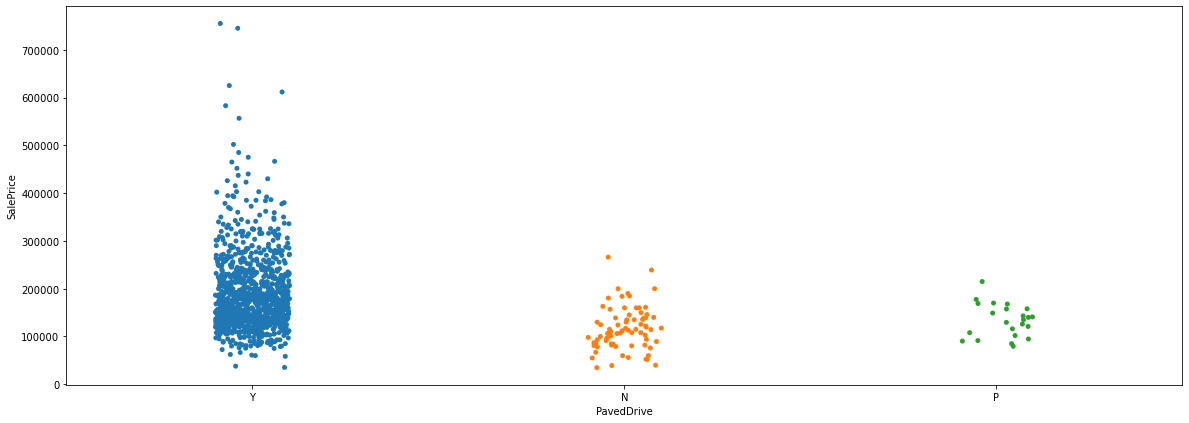

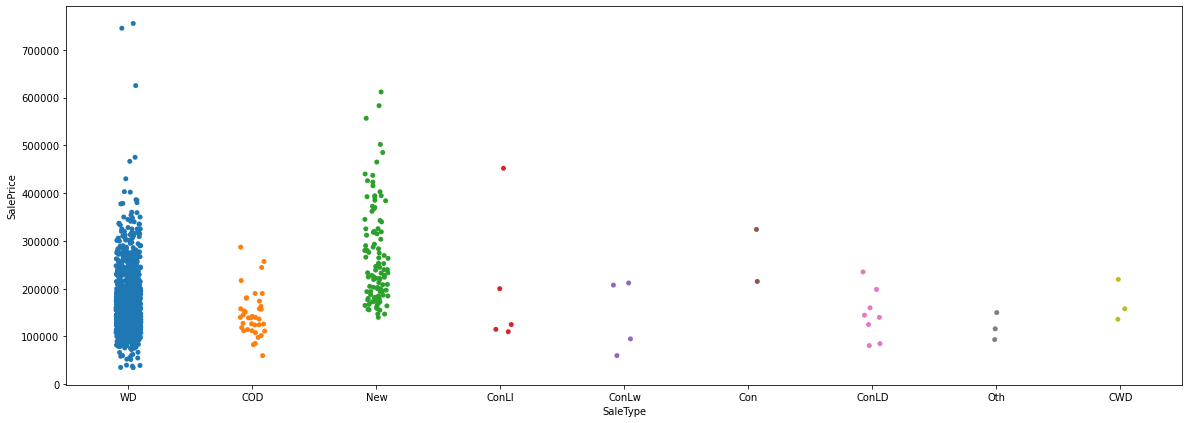

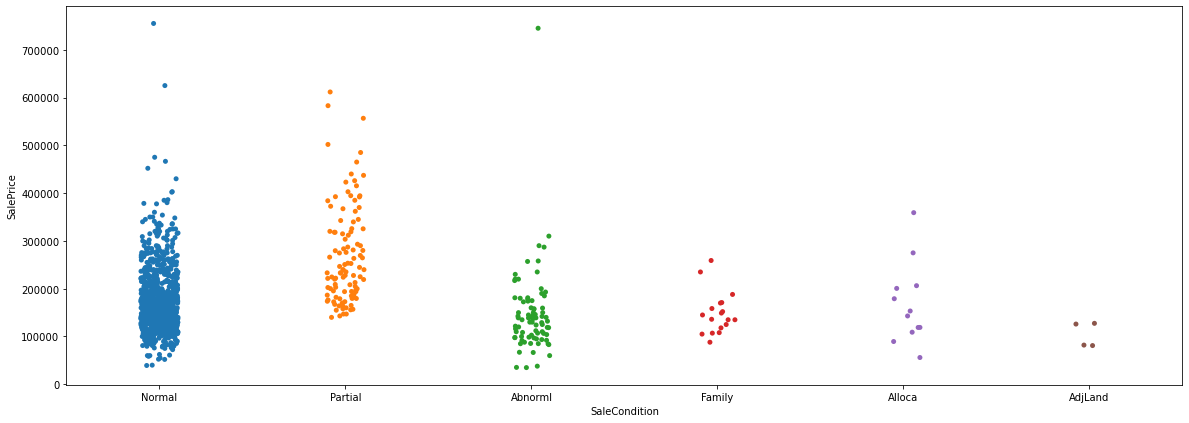

In [24]:
counter=1;


for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.stripplot(x=column, y="SalePrice", data=df)
        plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df[col] =  LE.fit_transform(df[col])

In [26]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120         3         70.0     4928       1         0   
1             20         3         95.0    15865       1         0   
2             60         3         92.0     9920       1         0   
3             20         3        105.0    11751       1         0   
4             20         3         70.0    16635       1         0   
...          ...       ...          ...      ...     ...       ...   
1163          20         3         70.0     9819       1         0   
1164          20         3         67.0     8777       1         3   
1165         160         3         24.0     2280       1         3   
1166          70         0         50.0     8500       1         3   
1167          60         3         70.0     7861       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...              0   
1               3          0          4          1  ...              0   
2               3          0          1          0  ...              0   
3               3          0          4          0  ...              0   
4               3          0          2          0  ...              0   
...           ...        ...        ...        ...  ...            ...   
1163            3          0          4          0  ...              0   
1164            3          0          4          0  ...              0   
1165            3          0          2          0  ...              0   
1166            3          0          4          0  ...            172   
1167            3          0          4          0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2007         8   
1             0          224         0        0      10    2007         8   
2             0            0         0        0       6    2007         8   
3             0            0         0        0       1    2010         0   
4             0            0         0        0       6    2009         8   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       2    2010         8   
1164          0            0         0        0       5    2009         8   
1165          0            0         0        0       7    2009         8   
1166          0            0         0        0       7    2008         8   
1167          0            0         0        0       6    2006         8   

      SaleCondition  SalePrice  
0                 4     128000  
1                 4     268000  
2                 4     269790  
3                 4     190000  
4                 4     215000  
...             ...        ...  
1163              4     122000  
1164              4     108000  
1165              4     148500  
1166              4      40000  
1167              4     183200  

[1168 rows x 75 columns]

In [27]:
for i in continuous_columns:
    IQR = df[i].quantile(0.75)-df[i].quantile(0.25)
    Barmax =  df[i].quantile(0.75) + 1.5*IQR
    Barmin =  df[i].quantile(0.25) - 1.5*IQR
    df.loc[df[i]>Barmax,i] = Barmax
    df.loc[df[i]<Barmin,i] = Barmin

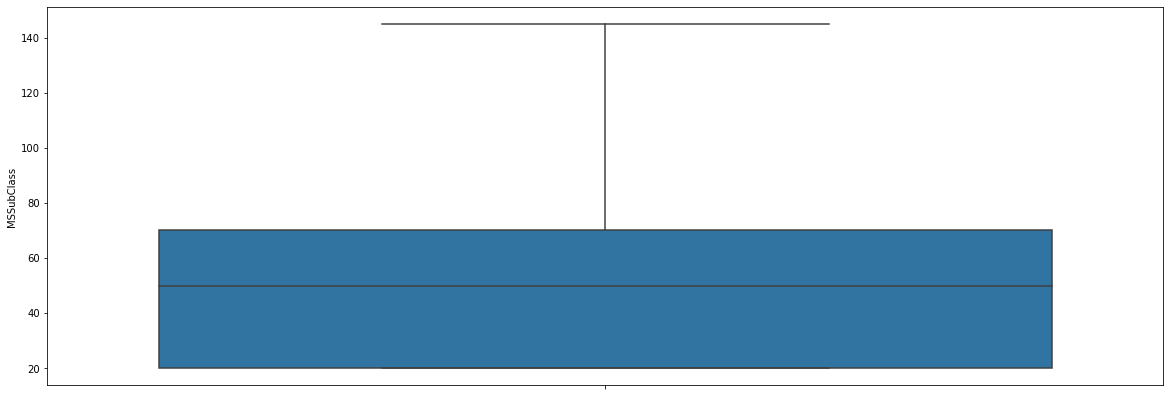

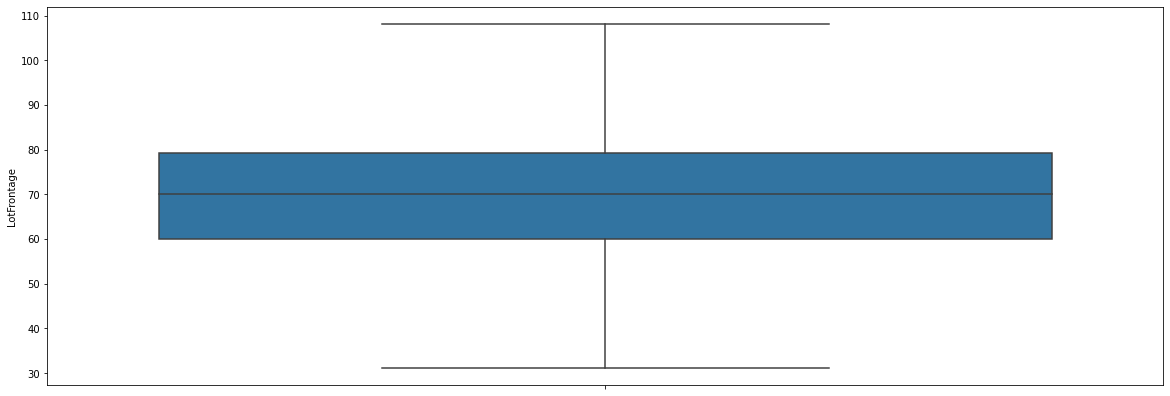

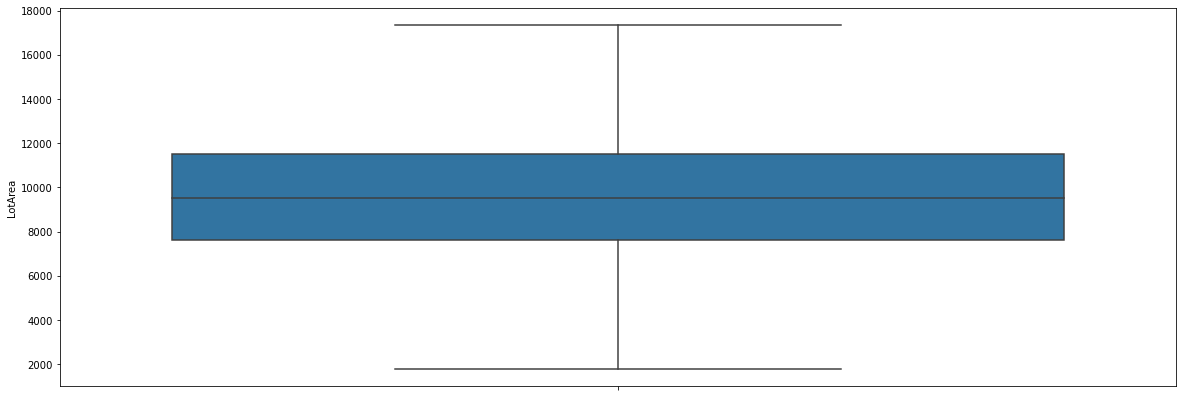

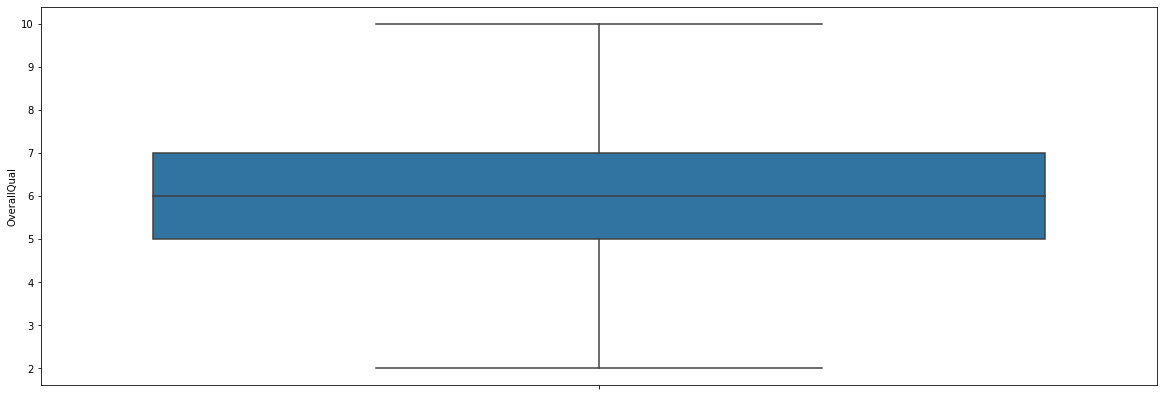

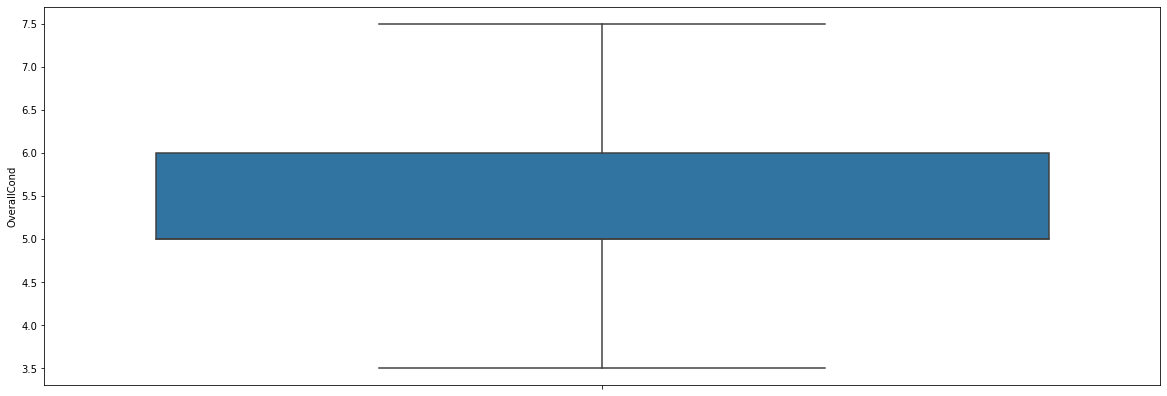

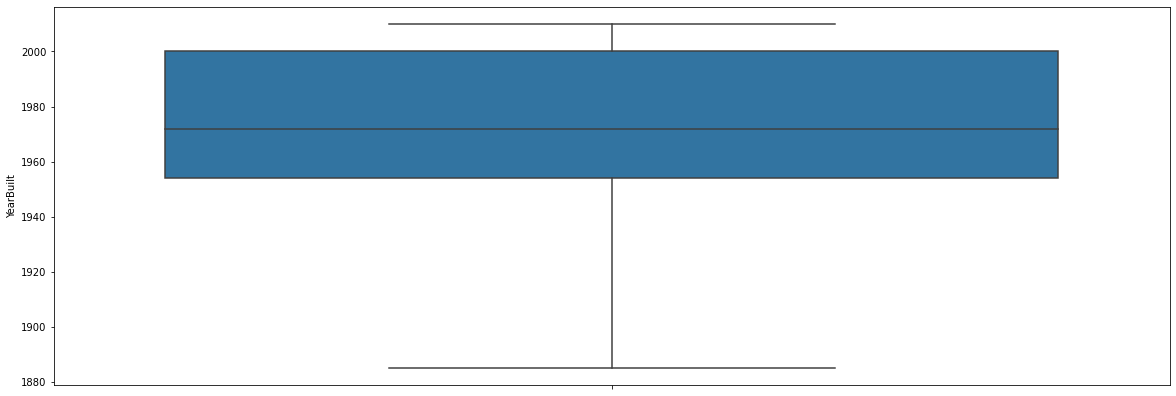

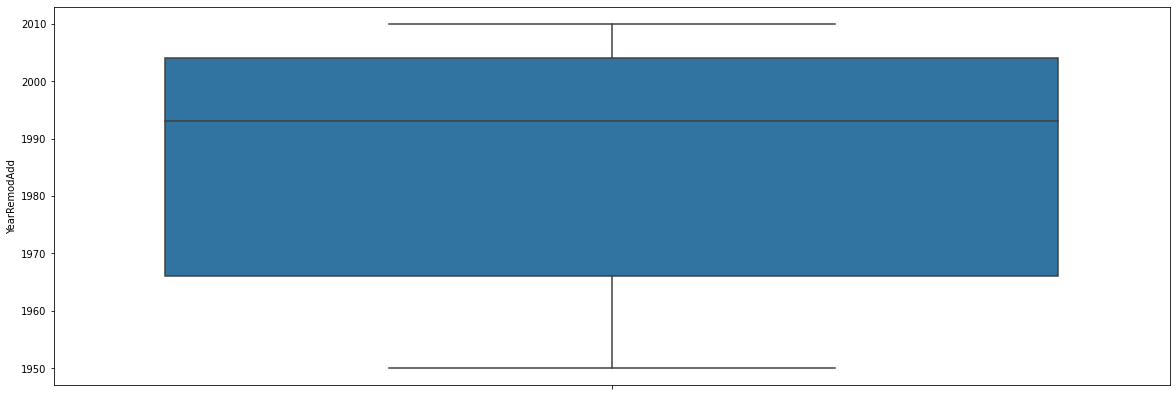

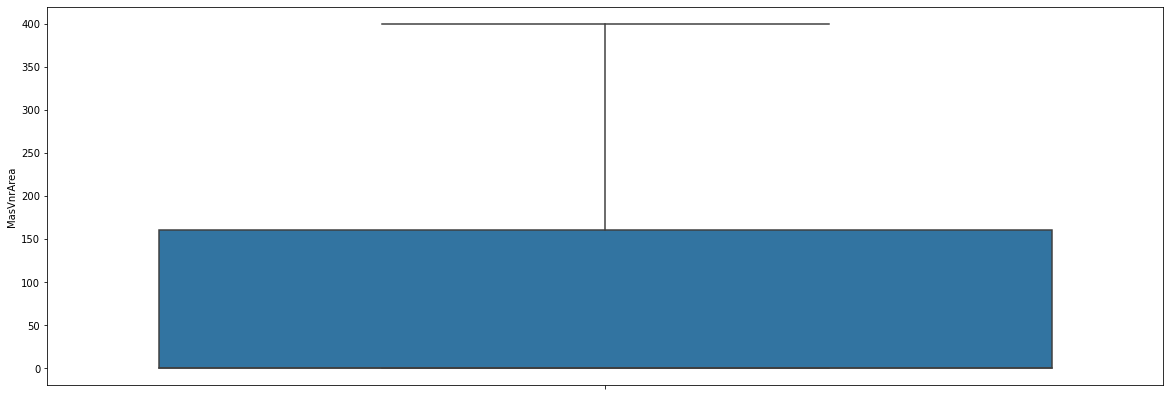

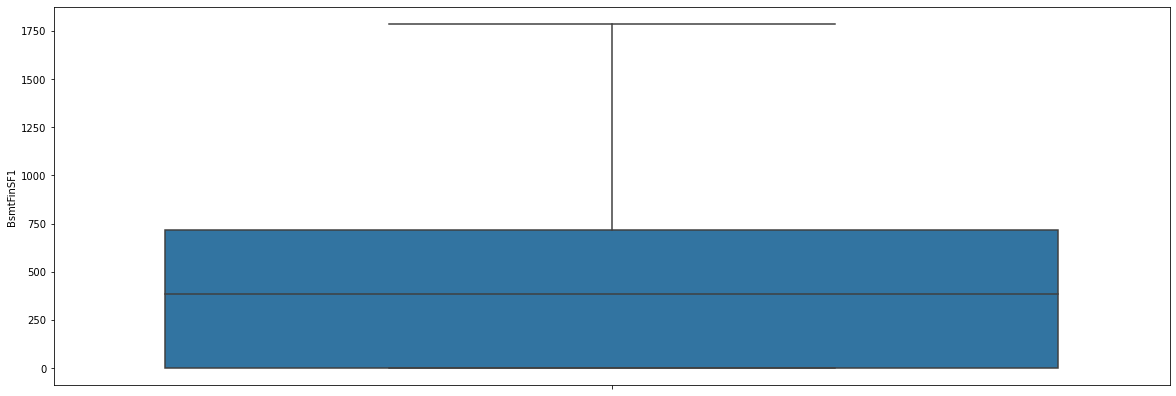

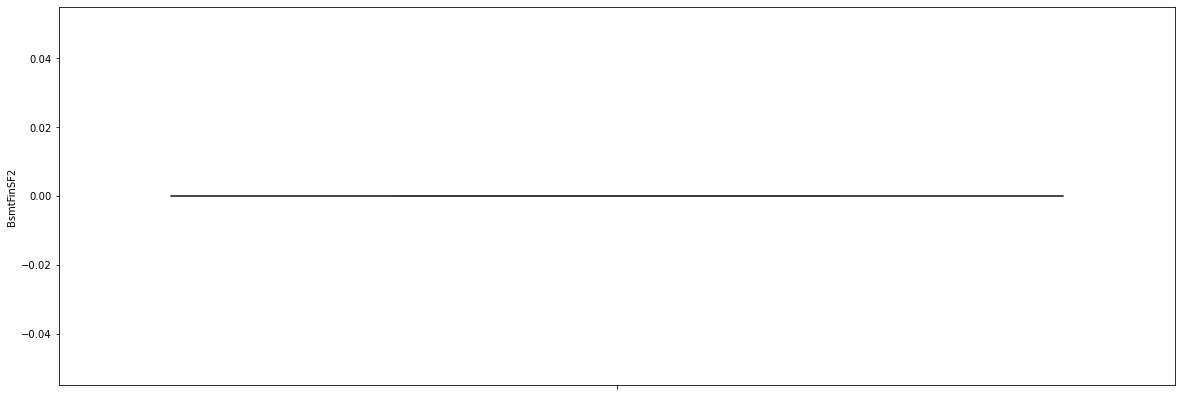

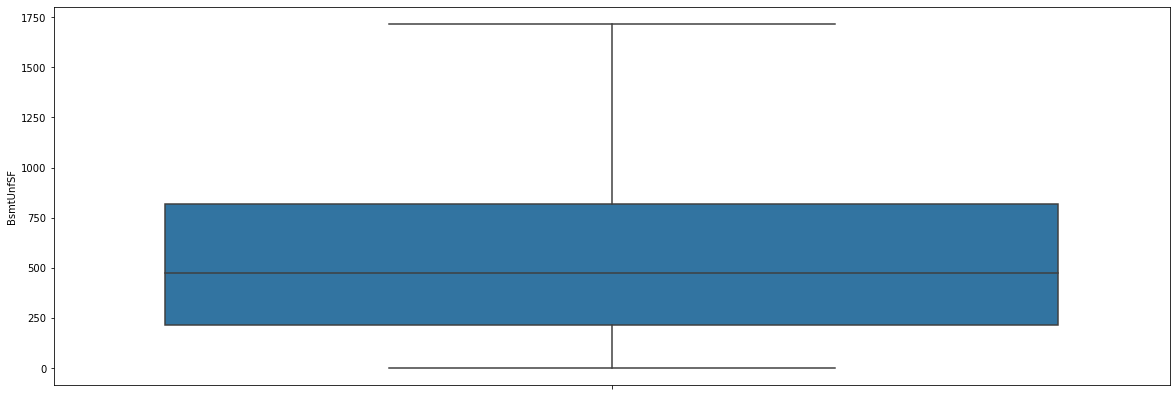

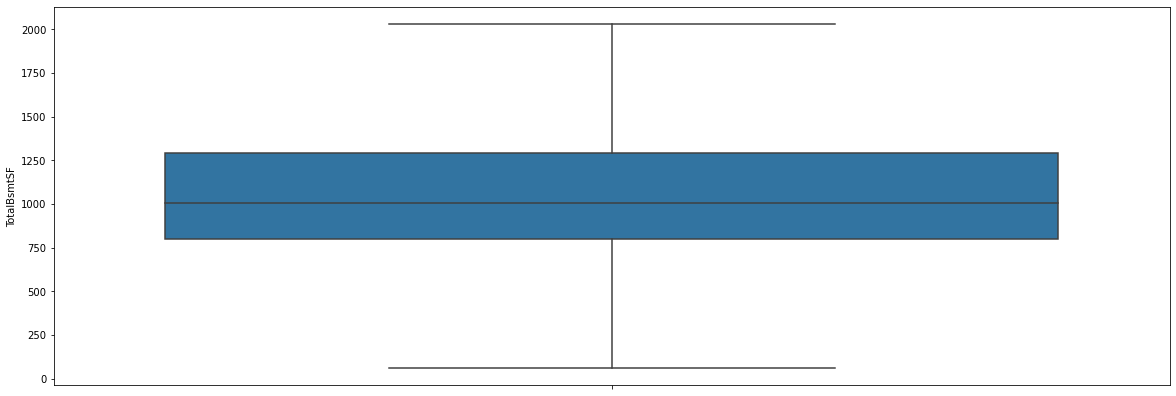

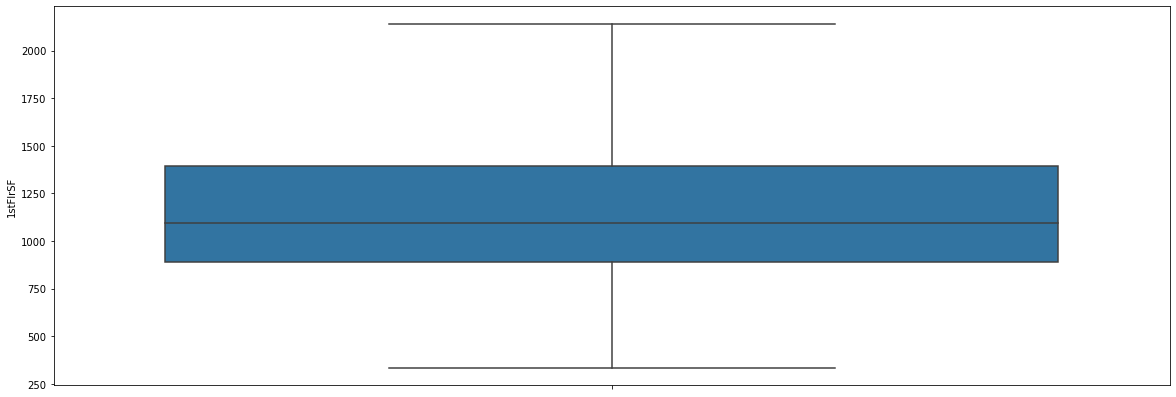

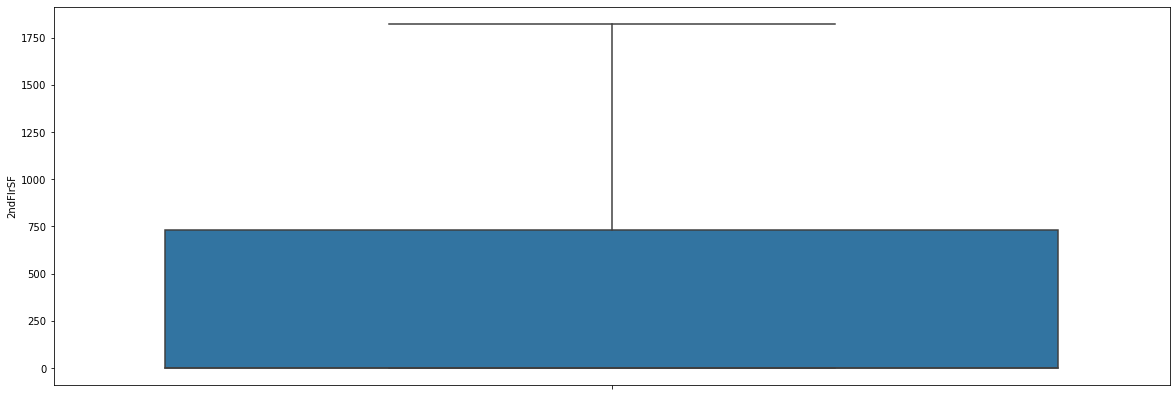

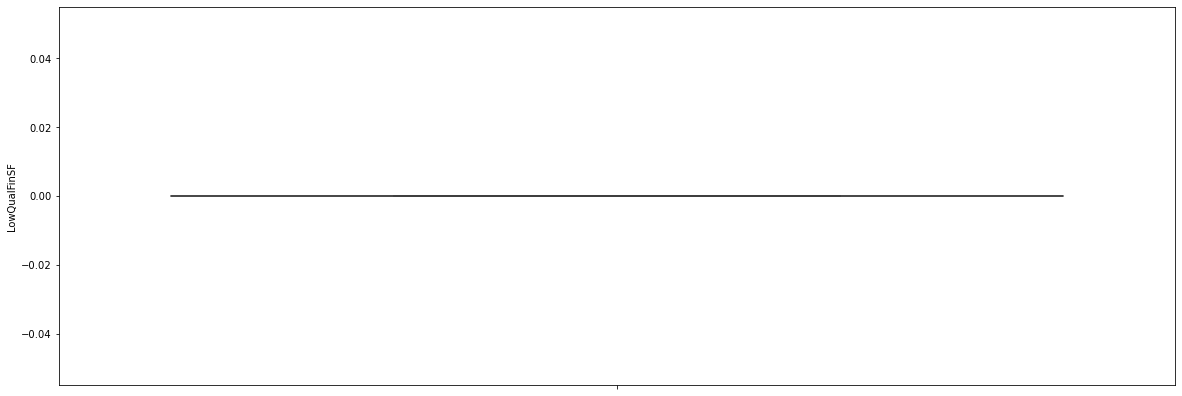

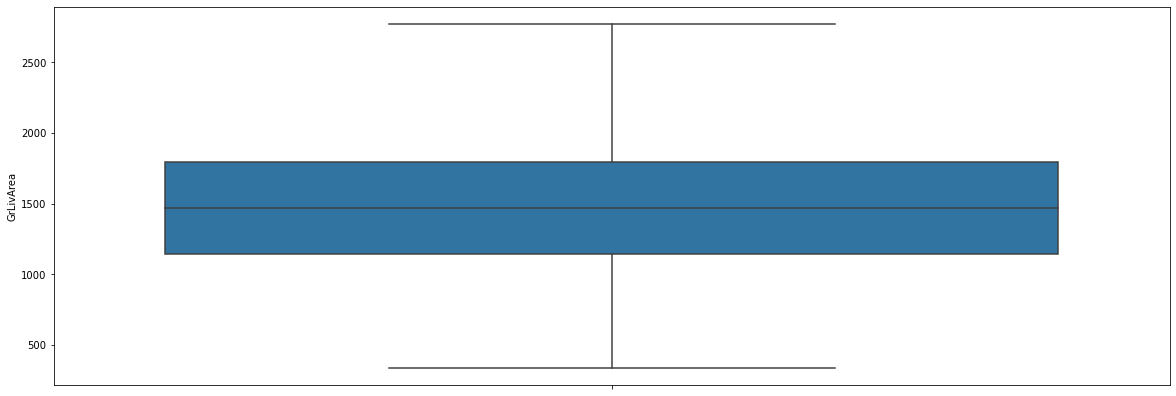

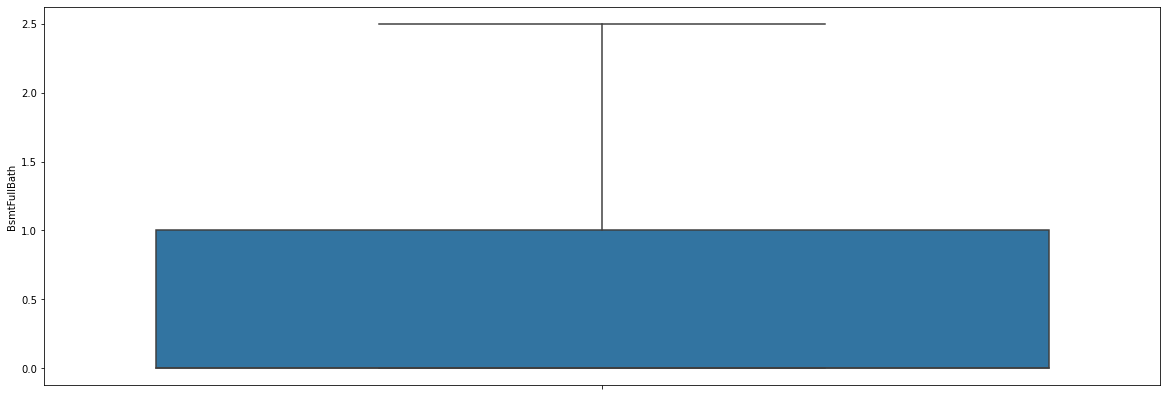

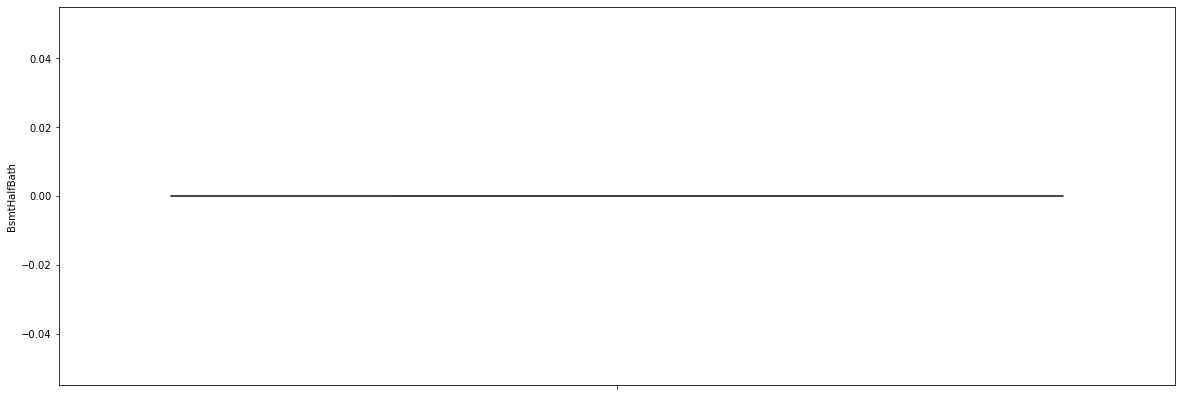

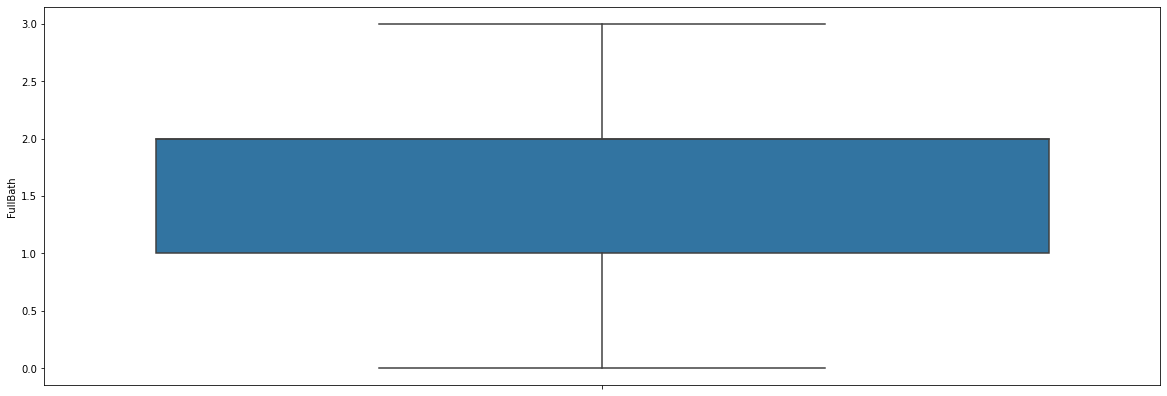

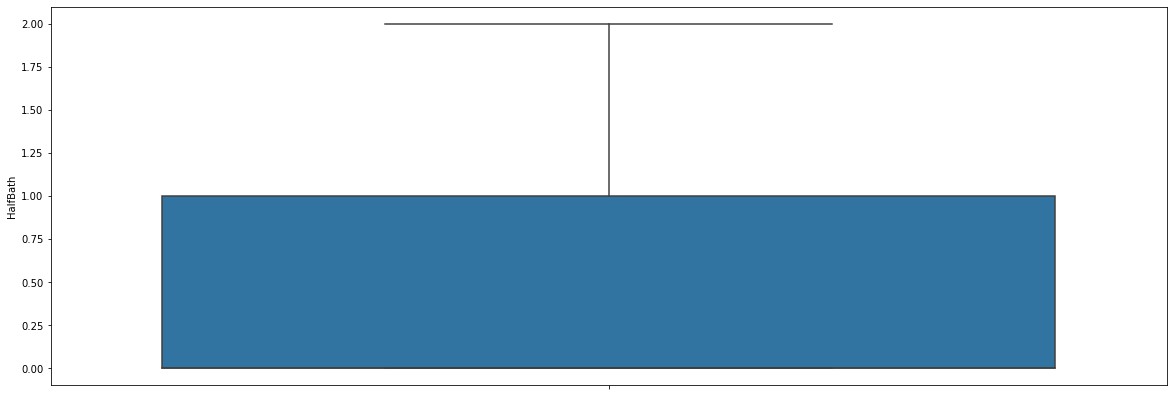

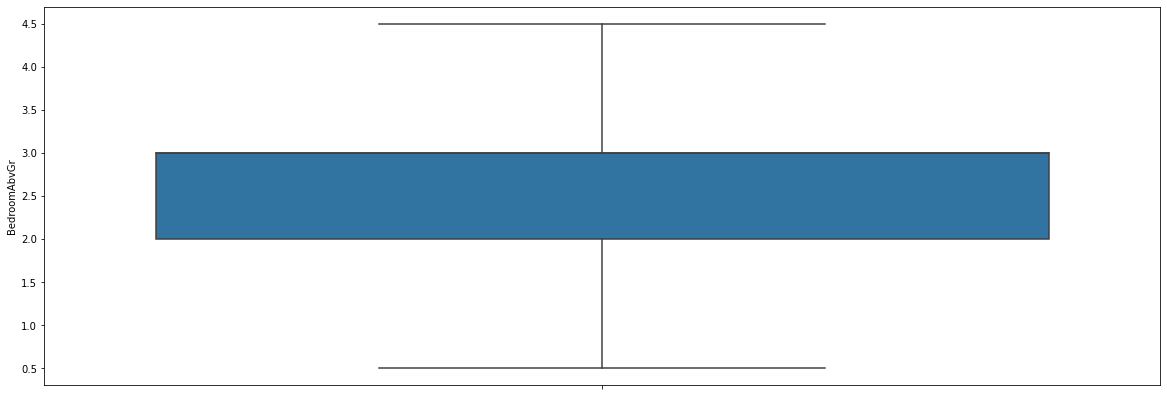

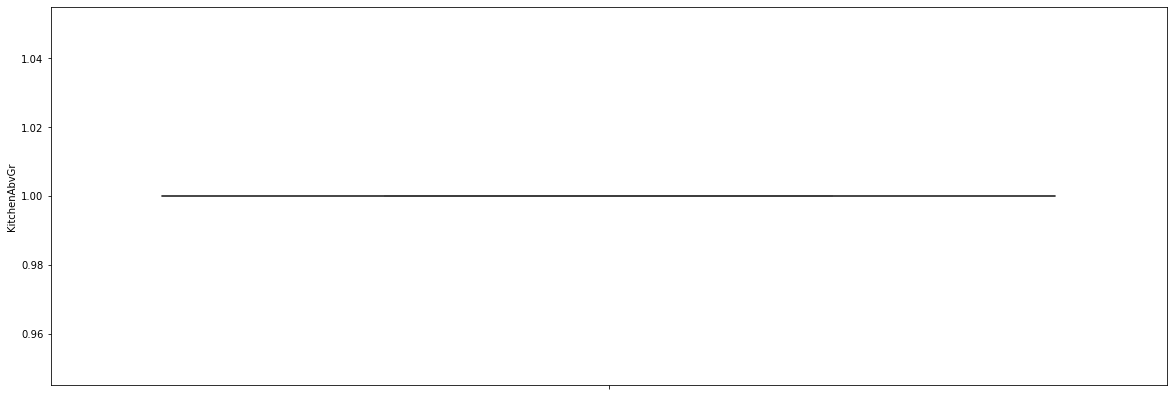

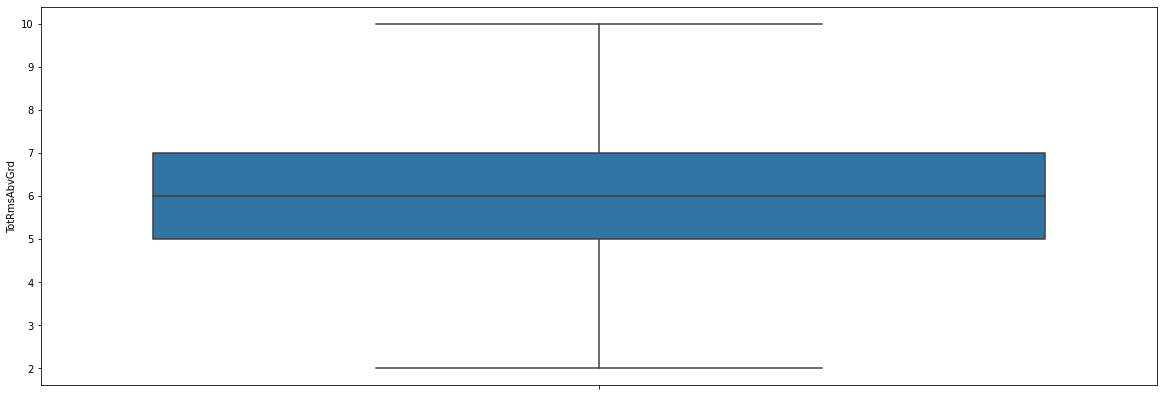

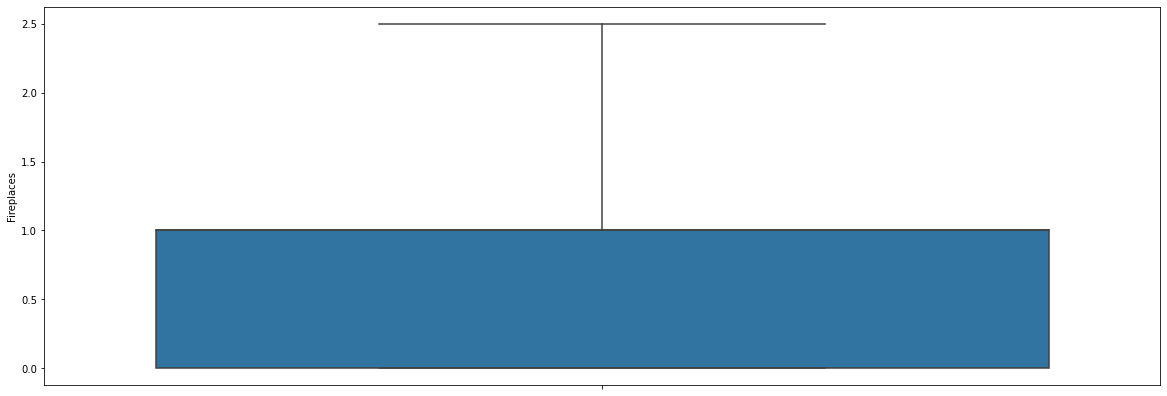

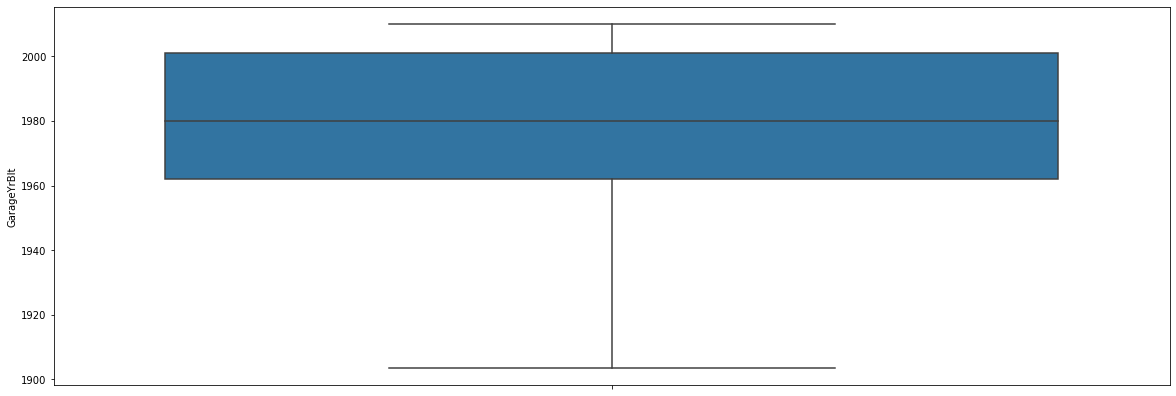

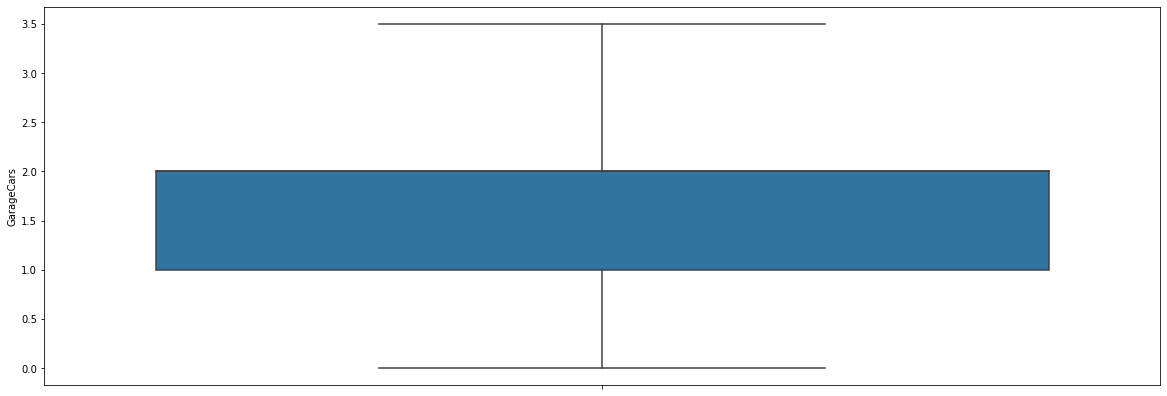

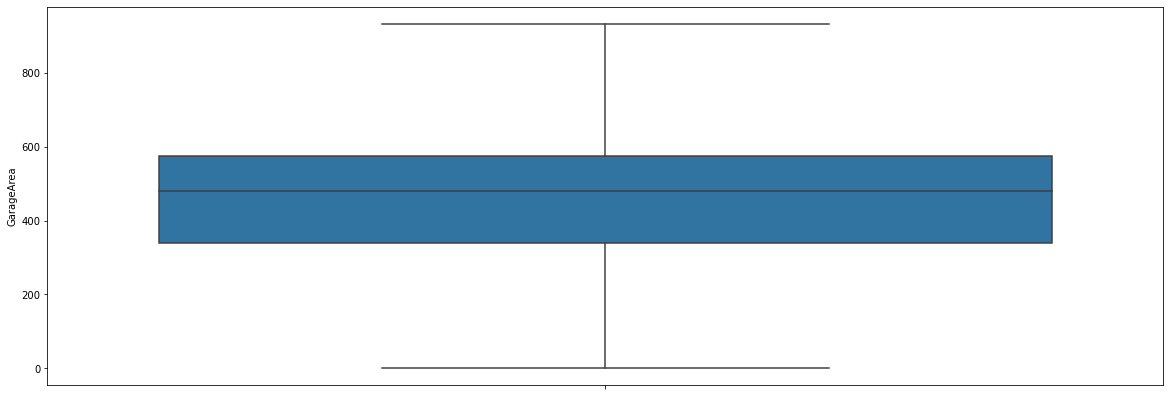

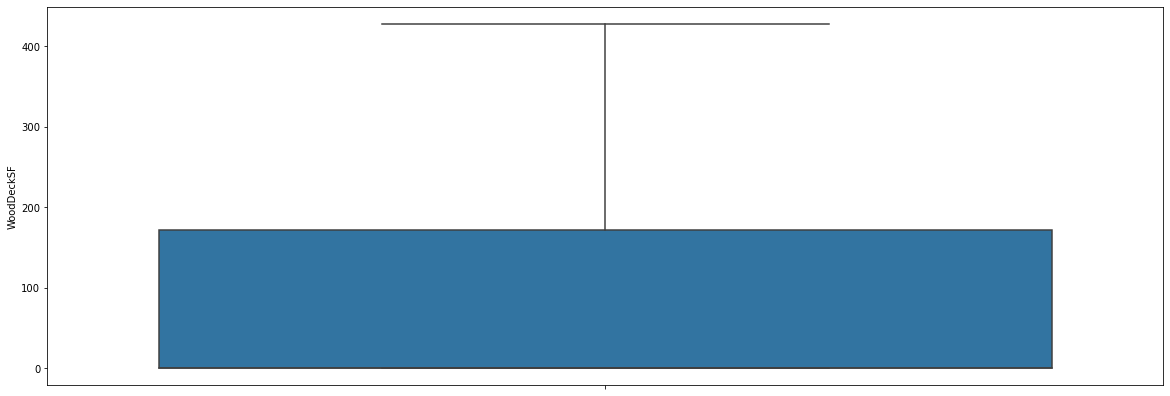

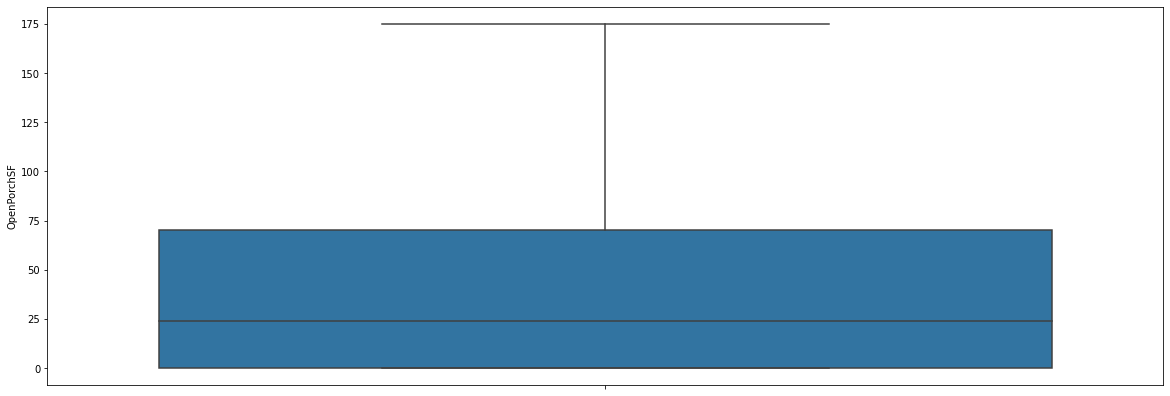

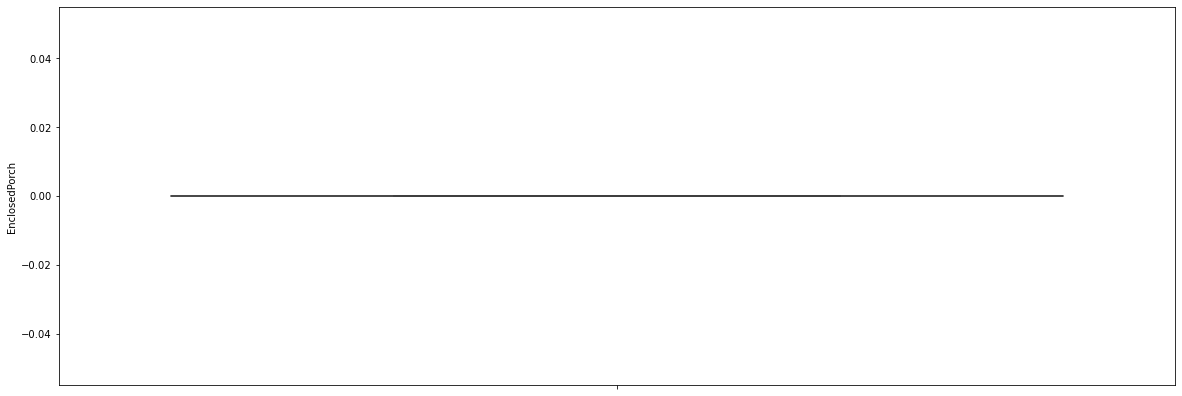

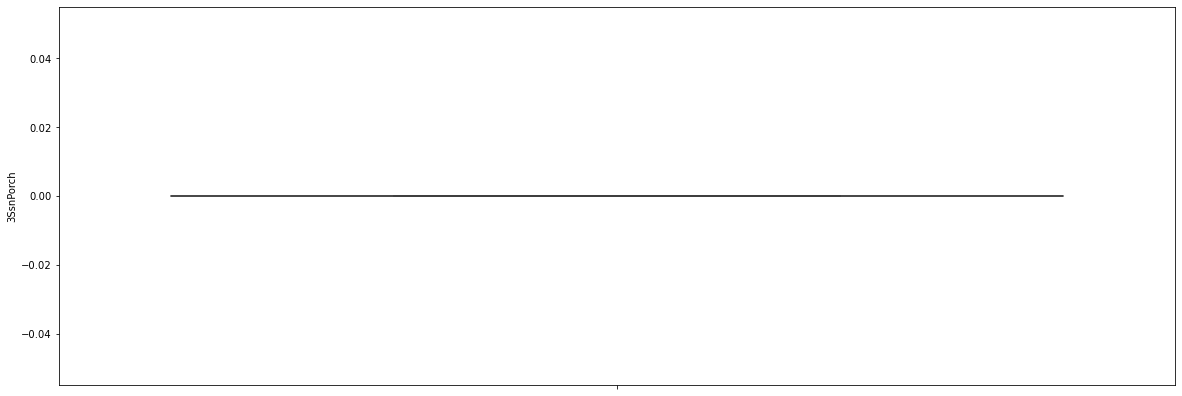

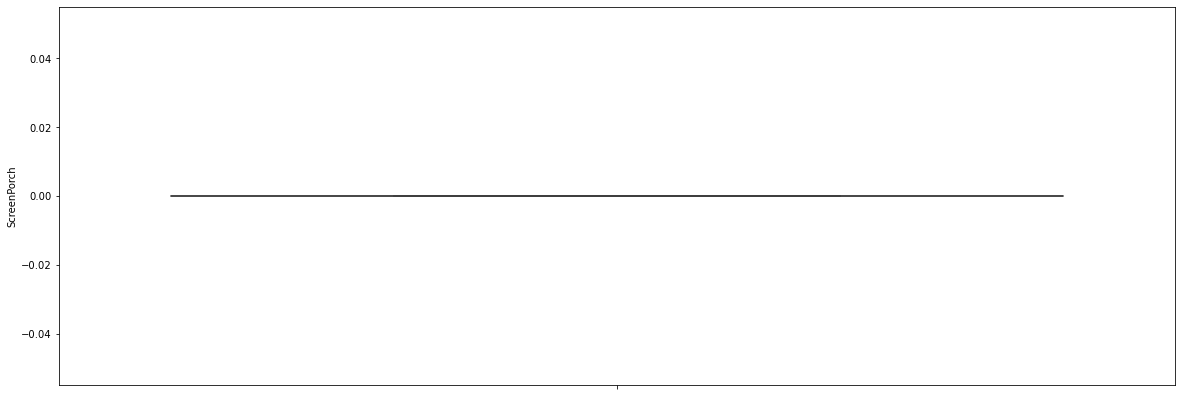

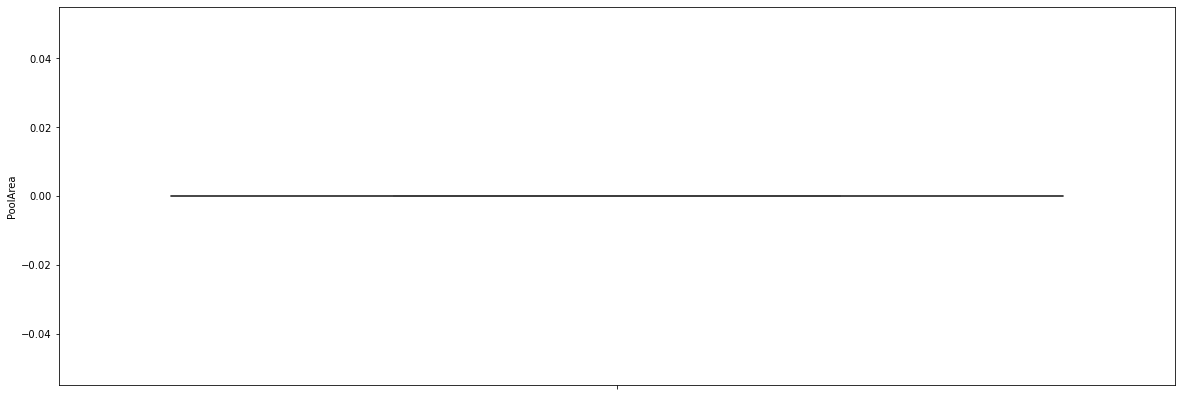

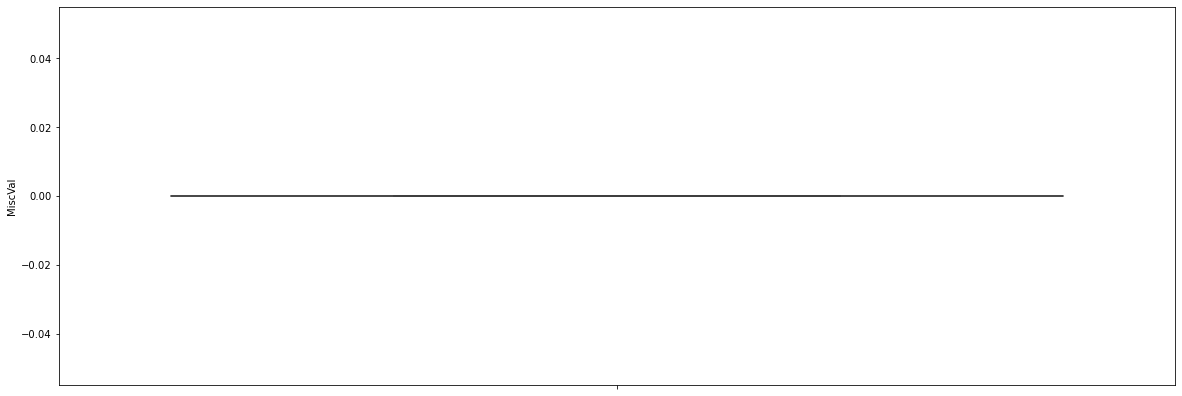

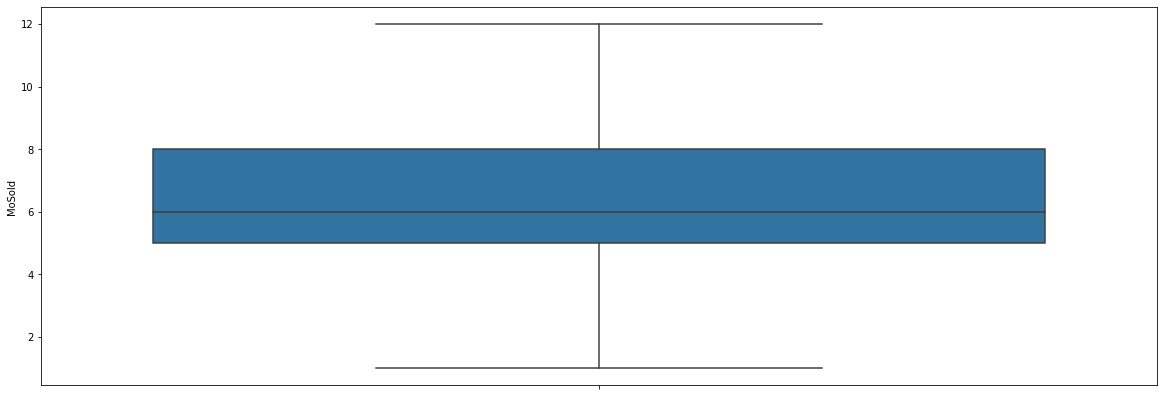

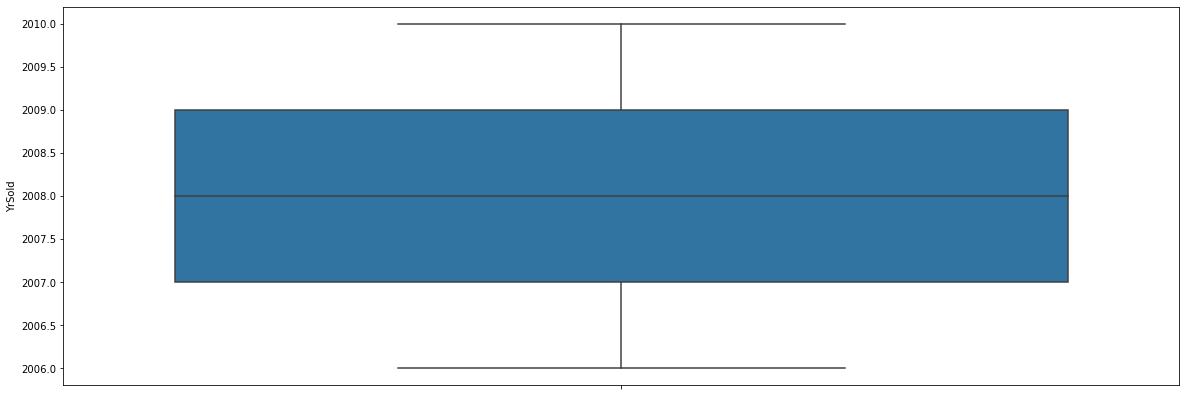

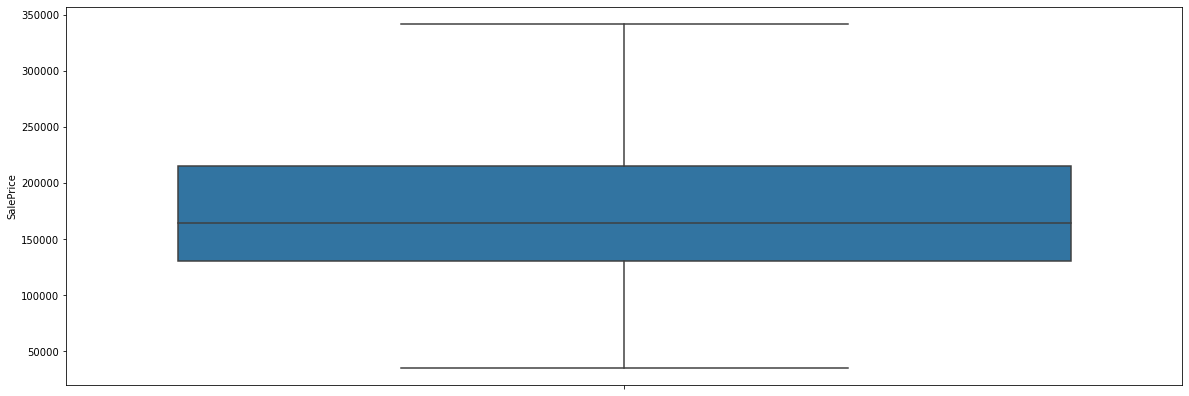

In [28]:
counter=1;
for i in range(0,len(continuous_columns)):
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.boxplot(y=continuous_columns[i],hue = continuous_columns[i],data=df)
        plt.show()

Outliers are removed successfully

In [29]:
fin_df  = df.drop(categorical_columns,axis=1)
fin_df = fin_df.drop('SalePrice',axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

scaling the data

In [30]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

Removing Skewness

In [31]:
fin_df_new.skew()

MSSubClass       0.158112
LotFrontage      0.012692
LotArea          0.002066
OverallQual      0.000728
OverallCond      0.000936
YearBuilt       -0.167651
YearRemodAdd    -0.297070
MasVnrArea       0.633846
BsmtFinSF1       0.127013
BsmtFinSF2       0.000000
BsmtUnfSF        0.070161
TotalBsmtSF      0.011932
1stFlrSF         0.024386
2ndFlrSF         0.391445
LowQualFinSF     0.000000
GrLivArea        0.018678
BsmtFullBath     0.369112
BsmtHalfBath     0.000000
FullBath        -0.022417
HalfBath         0.498982
BedroomAbvGr    -0.002153
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000622
Fireplaces       0.121385
GarageYrBlt     -0.176423
GarageCars      -0.013013
GarageArea       0.006177
WoodDeckSF       0.345480
OpenPorchSF      0.329374
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold          -0.008564
YrSold          -0.041226
dtype: float64

Skewness Removed

In [32]:
fin_df_new= fin_df_new.join(df['SalePrice'])
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [33]:
x = fin_df_new.drop('SalePrice',axis=1)
y = fin_df_new['SalePrice']

# Train Test Split

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    pred=regr.predict(x_test)
    acc = r2_score(y_test, pred)
    if(acc>maxAccu):
        maxAccu=acc
        maxRS=i
print("Best R2 Score is",maxAccu,"on Random State",maxRS)

Best R2 Score is 0.9122633965392055 on Random State 33


In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=33)

# Model Building

In [36]:
from sklearn import metrics
regr = LinearRegression()
regr.fit(x_train, y_train)
pred=regr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9122633965392055
MAE: 14892.203763893922
MSE: 371688719.92576146
RMSE: 19279.230273166027


In [37]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred=rr.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9118234591149651
MAE: 14934.890606094266
MSE: 373552477.71456695
RMSE: 19327.505729259712


In [38]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred=model_lasso.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.9118234658159894
MAE: 14935.104867786695
MSE: 373552449.3262426
RMSE: 19327.504994857525


In [39]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 
pred=model_enet.predict(x_test)
print('R2 score',r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.911996677951742
MAE: 14928.021981156297
MSE: 372818650.7236756
RMSE: 19308.512390230262


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('R2 score', r2_score(y_test, pred))
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2 score 0.7506278394486742
MAE: 24110.52564102564
MSE: 1056444123.4821937
RMSE: 32502.986377903704


In [41]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8876144430558248
MAE: 15959.483319088318
MSE: 476111932.2038774
RMSE: 21819.989280562844


# Cross Validation

In [42]:
print("Cross validation score:",cross_val_score(regr,x,y,cv=5).mean())

Cross validation score: 0.8595058120124038


In [43]:
print("Cross validation score:",cross_val_score(rr,x,y,cv=5).mean())

Cross validation score: 0.8596712295672658


In [44]:
print("Cross validation score:",cross_val_score(model_lasso,x,y,cv=5).mean())

Cross validation score: 0.8595843302432259


In [45]:
print("Cross validation score:",cross_val_score(model_enet,x,y,cv=5).mean())

Cross validation score: 0.8639115938544558


In [46]:
print("Cross validation score:",cross_val_score(dtr,x,y,cv=5).mean())

Cross validation score: 0.7218423643203764


In [47]:
print("Cross validation score:",cross_val_score(rdr,x,y,cv=5).mean())

Cross validation score: 0.884745240877818


# Parameter Hypertuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameter = {
 'max_depth': [100, 400, 800,1200],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [100,200, 400, 800]
}
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [51]:
#GCV.fit(x_train,y_train)

In [53]:
#GCV.best_params_

In [54]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(max_depth= 400,
min_samples_leaf= 1,
min_samples_split= 2,
n_estimators= 100)
rdr.fit(x_train,y_train)
pred1=rdr.predict(x_test)
print('R2 score',r2_score(y_test, pred1))
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred1)))

R2 score 0.8859912722489838
MAE: 15964.613333333335
MSE: 482988358.4116141
RMSE: 21976.99611893341


In [55]:
df1 = pd.read_csv('Housingtest.csv')

In [56]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [57]:
df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0].strip(),inplace=True)
df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0].strip(),inplace=True)
df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0].strip(),inplace=True)
df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0].strip(),inplace=True)
df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0].strip(),inplace=True)
df1['GarageType'].fillna(df1['GarageType'].mode()[0].strip(),inplace=True)
df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0].strip(),inplace=True)
df1['GarageQual'].fillna(df1['GarageQual'].mode()[0].strip(),inplace=True)
df1['GarageCond'].fillna(df1['GarageCond'].mode()[0].strip(),inplace=True)
df1['LotFrontage'].fillna(df1['LotFrontage'].median(),inplace=True)
df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median(),inplace=True)
df1['MasVnrArea'].fillna(df1['MasVnrArea'].median(),inplace=True)

In [58]:
df1.drop(['MiscFeature','PoolQC','Fence','FireplaceQu','Alley','Id'],inplace=True,axis=1)

In [59]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categorical_columns:
    df1[col] =  LE.fit_transform(df1[col])

In [60]:
for i in continuous_columns[:len(continuous_columns)-1]:
    IQR = df1[i].quantile(0.75)-df1[i].quantile(0.25)
    Barmax =  df1[i].quantile(0.75) + 1.5*IQR
    Barmin =  df1[i].quantile(0.25) - 1.5*IQR
    df1.loc[df1[i]>Barmax,i] = Barmax
    df1.loc[df1[i]<Barmin,i] = Barmin

In [61]:
fin_df  = df1.drop(categorical_columns,axis=1)
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(fin_df)
final_df = pd.DataFrame(minmax_df, columns = fin_df.columns)

In [62]:
fin_df_new=power_transform(final_df)
fin_df_new = pd.DataFrame(fin_df_new,columns=final_df.columns)

In [63]:
for i in categorical_columns:
    fin_df_new=fin_df_new.join(df[i])

In [64]:
pred=rdr.predict(fin_df_new)

In [65]:
predictions = pd.DataFrame({'SalePrice': pred})

In [66]:
predictions

SalePrice
0    314548.870
1    219099.000
2    271350.410
3    163983.450
4    198597.720
5     90068.500
6    133800.010
7    284197.510
8    247895.105
9    154482.270
10    87579.000
11   164601.960
12   126647.070
13   157885.050
14   297205.495
15   127890.420
16   125533.500
17   133894.500
18   172414.760
19   183152.000
20   168102.500
21   142139.090
22   155129.820
23    95217.530
24    98533.330
25   131533.710
26   160349.160
27   158728.200
28   154027.450
29   119602.170
30   178884.150
31   179266.215
32   250272.800
33   149774.710
34   106124.800
35   169471.760
36   184729.350
37   119776.380
38   172189.150
39   153861.240
40   107685.740
41   317365.280
42   201963.750
43   166383.300
44   130831.200
45   141716.930
46   128056.410
47   101240.540
48   202342.925
49   291136.410
50   174951.660
51   169064.370
52    99850.200
53   100702.500
54   271285.565
55   122741.000
56   161657.950
57   187196.990
58   117197.710
59   253882.170
60   100558.630
61   184979.400
62   147697.400
63   141492.260
64   185369.970
65   117445.260
66   152490.050
67   204710.890
68   135603.320
69   153921.100
70   309075.320
71   163875.320
72   163184.210
73   175230.680
74   148921.610
75   237521.280
76   319741.155
77   185642.090
78   299614.770
79   158092.090
80   200225.305
81   151414.890
82   165604.790
83   167975.500
84   186266.420
85   249475.820
86   106899.460
87   306314.420
88   152407.550
89   160295.710
90   248620.445
91   132013.260
92   135127.230
93   128148.130
94   187924.900
95   180062.110
96   228397.420
97   170153.650
98   307258.455
99   124489.990
100  285927.125
101  106008.750
102  121901.550
103  140713.280
104  215614.330
105  148136.850
106  255558.850
107  136053.800
108  190326.630
109  215659.350
110  173223.690
111  182768.990
112  250829.555
113  210165.700
114  135156.150
115  113453.560
116  133511.300
117  194926.520
118  137563.830
119  116927.500
120  106245.080
121  183277.050
122  258482.045
123  139441.660
124  145776.210
125  202056.590
126  119791.160
127  165002.870
128  102852.470
129  130349.250
130  142390.870
131  216205.625
132  142187.330
133  154679.320
134  181472.650
135  292345.445
136  193607.050
137  128894.720
138  289573.435
139  114502.160
140  160710.280
141  325835.555
142  113112.360
143  293149.270
144  174873.570
145  234934.950
146  190549.575
147  138925.460
148  110244.920
149  194083.100
150  156968.910
151  143576.000
152  182207.470
153  116240.160
154   97990.000
155  162109.950
156  177144.740
157  180141.920
158  129316.500
159  165740.750
160  199872.980
161  142452.300
162  194778.300
163  123726.370
164  127197.950
165  224156.220
166  199194.530
167  194366.390
168  136451.100
169  236819.520
170  150964.780
171  121852.120
172  130097.080
173  237142.855
174  135205.000
175  330785.310
176  133637.750
177   98789.880
178  166973.820
179  159279.920
180  205027.500
181  156560.720
182  269462.815
183  169438.400
184  297649.060
185  319311.590
186  224895.970
187  102509.210
188  166483.840
189  152517.750
190  137208.040
191  225534.200
192  164398.630
193   94935.930
194  161845.570
195  102422.500
196  162868.410
197  198736.625
198  130296.990
199  192295.610
200  139398.660
201  108124.040
202  246171.755
203  278342.000
204  140117.000
205  124327.380
206  255731.740
207  167268.280
208  157274.670
209  177644.930
210  100263.970
211  181275.170
212  152245.530
213  187924.470
214  111571.300
215  252045.185
216  144860.700
217  152662.650
218  130896.500
219  163466.550
220  208765.990
221  203810.550
222  263830.890
223  135211.400
224  187574.500
225  298094.160
226  211156.000
227  103443.910
228  302276.630
229  157163.430
230  119855.540
231  141278.870
232   93084.000
233  142811.500
234  107088.000
235  169753.050
236  172765.990
237  158631.090
238  263097.995
239  151222.160
240  219352.500
241  145385.000
242  313333.905
243  114237.530
244  140481.990
245  219846.550
246  194868.500
247  264300.990
248  159500.560
249  1

In [67]:
predictions.to_excel("Price prediction.xlsx")

In [68]:
import joblib
joblib.dump(rdr,"Housing Project.pkl")

['Housing Project.pkl']